In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import re 
warnings.filterwarnings("ignore")

In [2]:
cric_data=pd.read_excel('Sports Data.xlsx',sheet_name='Sports data for DSBA')

In [3]:
cric_data.head()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...                 12.0                       1   
2         Bowling  Zimbabwe  ...                 14.0                       4   
3         Bowling     Kenya  ...                 15.0                       4   
4         Bowling  Srilanka  ...                 12.0                       4   

  Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                0.0                    2                   3.0   
1                0.0                    0                   3.0   
2                0.0                    0                   3.0   
3                0.0                    2                   3.0   
4                0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                     0                54.0   
1                  6.0                     0                69.0   
2                  6.0                     0                69.0   
3                  6.0                     0                73.0   
4                  6.0                     0                80.0   

   Players_scored_zero  player_highest_wicket  
0                    3                      1  
1                    2                      1  
2                    3                      1  
3                    3                      1  
4                    3                      1  

[5 rows x 23 columns]

In [4]:
cric_data.shape

(2930, 23)

In [5]:
cric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
cric_data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [7]:
cric_data.duplicated().sum()

0

In [8]:
cric_data.describe().T

count          mean           std     min      25%  \
Avg_team_Age            2833.0     29.242852      2.264230    12.0     30.0   
Bowlers_in_team         2848.0      2.913624      1.023907     1.0      2.0   
Wicket_keeper_in_team   2930.0      1.000000      0.000000     1.0      1.0   
All_rounder_in_team     2890.0      2.722491      1.092699     1.0      2.0   
Audience_number         2849.0  46267.960688  48599.581459  7063.0  20363.0   
Max_run_scored_1over    2902.0     15.199862      3.661010    11.0     12.0   
Max_wicket_taken_1over  2930.0      2.713993      1.080623     1.0      2.0   
Extra_bowls_bowled      2901.0     11.252671      7.780829     0.0      6.0   
Min_run_given_1over     2930.0      1.952560      1.678332     0.0      0.0   
Min_run_scored_1over    2903.0      2.762659      0.705759     1.0      2.0   
Max_run_given_1over     2896.0      8.669199      5.003525     6.0      6.0   
extra_bowls_opponent    2930.0      4.229693      3.626108     0.0      2.0   
player_highest_run      2902.0     65.889387     20.331614    30.0     48.0   

                            50%       75%        max  
Avg_team_Age               30.0     30.00       70.0  
Bowlers_in_team             3.0      4.00        5.0  
Wicket_keeper_in_team       1.0      1.00        1.0  
All_rounder_in_team         3.0      4.00        4.0  
Audience_number         34349.0  57876.00  1399930.0  
Max_run_scored_1over       14.0     18.00       25.0  
Max_wicket_taken_1over      3.0      4.00        4.0  
Extra_bowls_bowled         10.0     15.00       40.0  
Min_run_given_1over         2.0      3.00        6.0  
Min_run_scored_1over        3.0      3.00        4.0  
Max_run_given_1over         6.0      9.25       40.0  
extra_bowls_opponent        3.0      7.00       18.0  
player_highest_run         66.0     84.00      100.0

In [9]:
cric_data.reset_index(drop=True, inplace=True)
cric_data.set_index('Game_number', inplace=True)

In [10]:
cric_data.head()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              NaN          ODI   
Game_5        Loss          24.0            Night          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   

            First_selection  Opponent  Season  ...  Max_run_scored_1over  \
Game_number                                    ...                         
Game_1              Bowling  Srilanka  Summer  ...                  13.0   
Game_2              Batting  Zimbabwe  Summer  ...                  12.0   
Game_3              Bowling  Zimbabwe     NaN  ...                  14.0   
Game_4              Bowling     Kenya  Summer  ...                  15.0   
Game_5              Bowling  Srilanka  Summer  ...                  12.0   

            Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                   
Game_1                           3                 0.0                    2   
Game_2                           1                 0.0                    0   
Game_3                           4                 0.0                    0   
Game_4                           4                 0.0                    2   
Game_5                           4                 0.0                    0   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                        3.0                  6.0                     0   
Game_2                        3.0                  6.0                     0   
Game_3                        3.0                  6.0                     0   
Game_4                        3.0                  6.0                     0   
Game_5                        3.0                  6.0                     0   

             player_highest_run  Players_scored_zero  player_highest_wicket  
Game_number                                                                  
Game_1                     54.0                    3                      1  
Game_2                     69.0                    2                      1  
Game_3                     69.0                    3                      1  
Game_4                     73.0                    3                      1  
Game_5                     80.0                    3                      1  

[5 rows x 22 columns]

In [11]:
cric_data.isnull().sum()

Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [12]:
cric_data['Match_format'].replace("20-20", "T20", inplace=True)

In [13]:
cric_data['Players_scored_zero'].replace("Three", "5", inplace=True)

In [14]:
cric_data['Players_scored_zero'].value_counts()

Players_scored_zero
3    1730
2     744
4     285
1     166
5       5
Name: count, dtype: int64

In [15]:
cric_data.isnull().sum()

Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [16]:
cric_data.head(27)

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              NaN          ODI   
Game_5        Loss          24.0            Night          ODI   
Game_6         Win          24.0            Night          ODI   
Game_7        Loss          24.0    Day and Night          T20   
Game_8         Win          24.0            Night          ODI   
Game_9        Loss          24.0              Day          ODI   
Game_10        Win          24.0              Day          T20   
Game_11       Loss          24.0    Day and Night          T20   
Game_12        Win          24.0            Night          ODI   
Game_13       Loss          24.0            Night          ODI   
Game_14        Win          24.0            Night          ODI   
Game_15       Loss          24.0    Day and Night          T20   
Game_16        Win          24.0            Night          ODI   
Game_17       Loss          24.0              Day          T20   
Game_18        Win          24.0              Day          ODI   
Game_19       Loss          24.0    Day and Night          T20   
Game_20       Loss          24.0              Day          ODI   
Game_21       Loss          24.0              Day         Test   
Game_22       Loss          24.0              Day          T20   
Game_23        Win          24.0              Day          ODI   
Game_24       Loss          24.0            Night          ODI   
Game_25        Win          24.0              Day          ODI   
Game_26       Loss           NaN              Day          T20   
Game_27        Win          24.0              Day          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   
Game_6                   3.0                      1                  4.0   
Game_7                   2.0                      1                  2.0   
Game_8                   3.0                      1                  2.0   
Game_9                   3.0                      1                  3.0   
Game_10                  3.0                      1                  4.0   
Game_11                  3.0                      1                  2.0   
Game_12                  2.0                      1                  2.0   
Game_13                  1.0                      1                  3.0   
Game_14                  3.0                      1                  4.0   
Game_15                  2.0                      1                  2.0   
Game_16                  3.0                      1                  2.0   
Game_17                  1.0                      1                  4.0   
Game_18                  1.0                      1                  2.0   
Game_19                  1.0                      1                  3.0   
Game_20                  3.0                      1                  2.0   
Game_21                  2.0                      1                  1.0   
Game_22                  3.0                      1                  4.0   
Game_23                  2.0                      1                  3.0   
Game_24                  3.0                      1                  1.0   
Game_25                  3.0                      1                  2.0   
Game_26                  1.0                 

In [17]:
cric_data['player_highest_wicket'].value_counts()

player_highest_wicket
1        1084
2        1063
3         427
4         211
5         138
Three       7
Name: count, dtype: int64

In [18]:
cric_data['player_highest_wicket'] = cric_data['player_highest_wicket'].replace('Three', 3)

In [19]:
cric_data['player_highest_wicket'].value_counts()

player_highest_wicket
1    1084
2    1063
3     434
4     211
5     138
Name: count, dtype: int64

In [20]:
cric_data['Players_scored_zero'] = cric_data['Players_scored_zero'].astype(float)
cric_data['player_highest_wicket'] = cric_data['player_highest_wicket'].astype(float)

In [21]:
numeric_columns=cric_data.select_dtypes(include=['float64','int64']).columns
for col in numeric_columns:
    cric_data[col] = cric_data[col].fillna(cric_data[col].median())

In [22]:
numeric_columns

Index(['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [23]:
categorical_columns=cric_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    cric_data[col] = cric_data[col].fillna(cric_data[col].mode()[0])

In [24]:
categorical_columns

Index(['Result', 'Match_light_type', 'Match_format', 'First_selection',
       'Opponent', 'Season', 'Offshore'],
      dtype='object')

In [25]:
cric_data.isnull().sum()

Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [26]:
cric_data.head()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              Day          ODI   
Game_5        Loss          24.0            Night          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   

            First_selection  Opponent  Season  ...  Max_run_scored_1over  \
Game_number                                    ...                         
Game_1              Bowling  Srilanka  Summer  ...                  13.0   
Game_2              Batting  Zimbabwe  Summer  ...                  12.0   
Game_3              Bowling  Zimbabwe   Rainy  ...                  14.0   
Game_4              Bowling     Kenya  Summer  ...                  15.0   
Game_5              Bowling  Srilanka  Summer  ...                  12.0   

            Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                   
Game_1                           3                 0.0                    2   
Game_2                           1                 0.0                    0   
Game_3                           4                 0.0                    0   
Game_4                           4                 0.0                    2   
Game_5                           4                 0.0                    0   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                        3.0                  6.0                     0   
Game_2                        3.0                  6.0                     0   
Game_3                        3.0                  6.0                     0   
Game_4                        3.0                  6.0                     0   
Game_5                        3.0                  6.0                     0   

             player_highest_run  Players_scored_zero  player_highest_wicket  
Game_number                                                                  
Game_1                     54.0                  3.0                    1.0  
Game_2                     69.0                  2.0                    1.0  
Game_3                     69.0                  3.0                    1.0  
Game_4                     73.0                  3.0                    1.0  
Game_5                     80.0                  3.0                    1.0  

[5 rows x 22 columns]

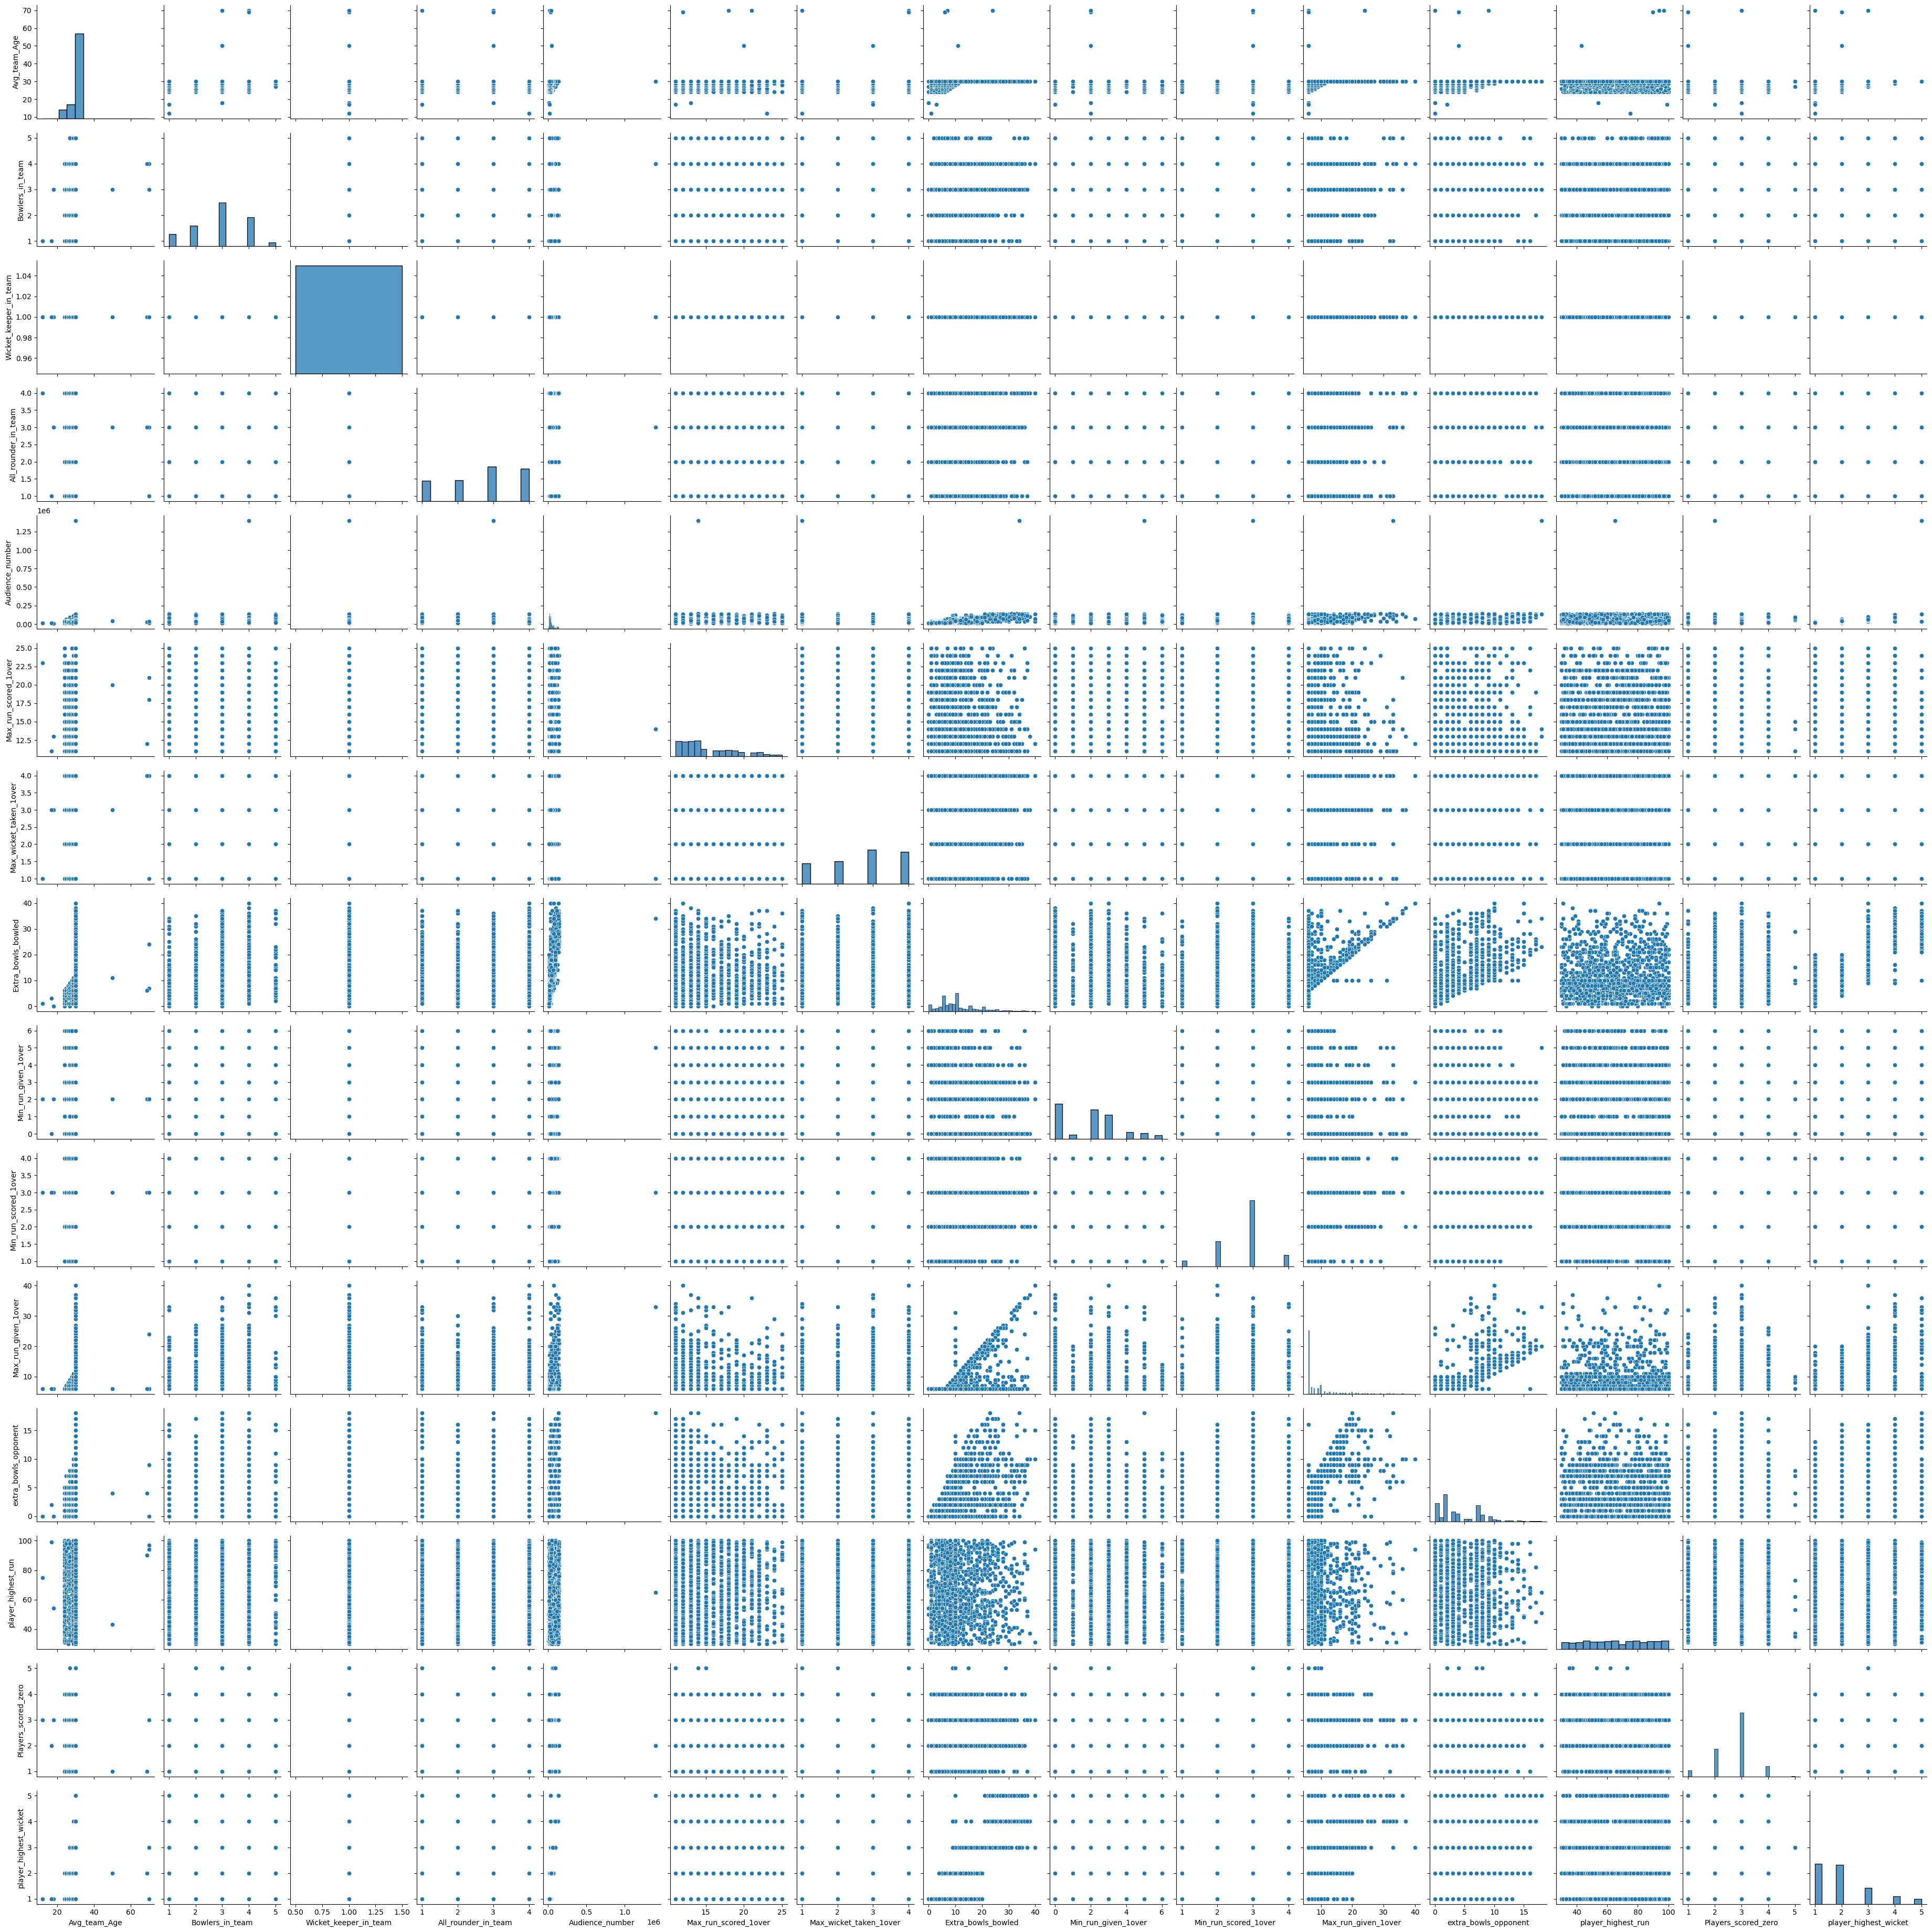

In [27]:
sns.pairplot(cric_data[numeric_columns])
plt.show()

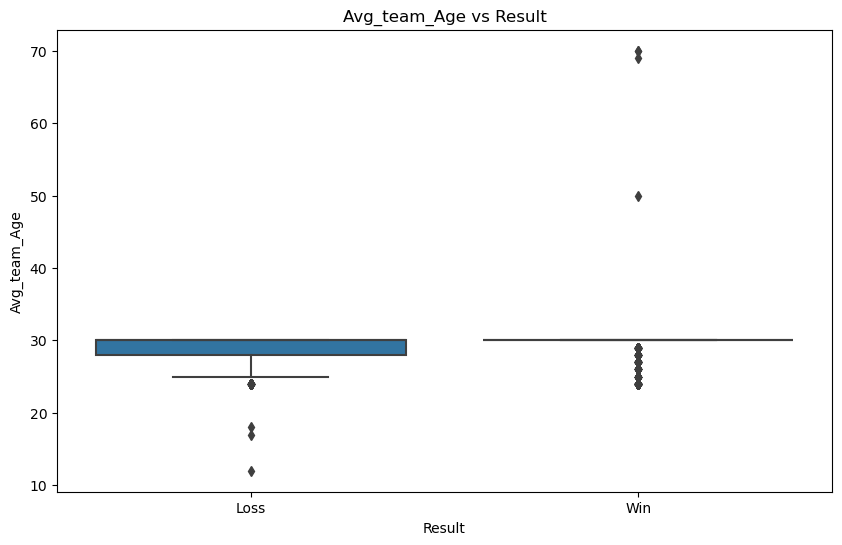

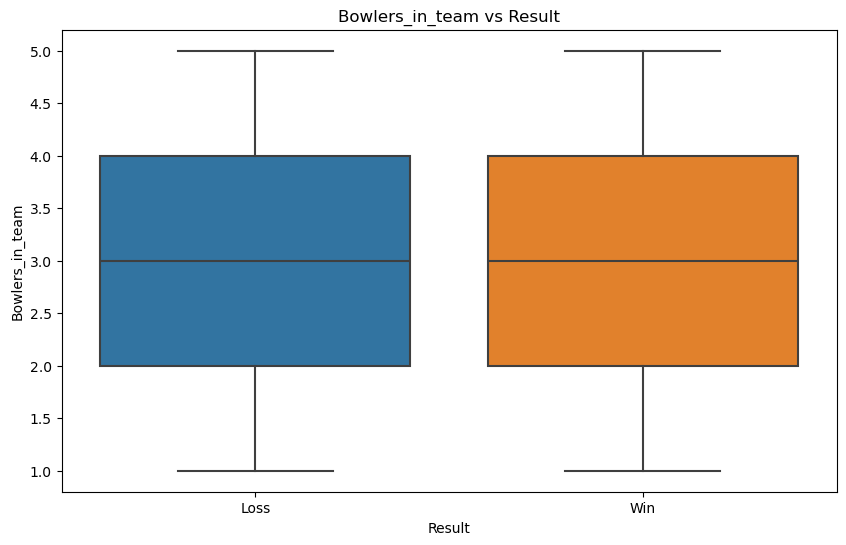

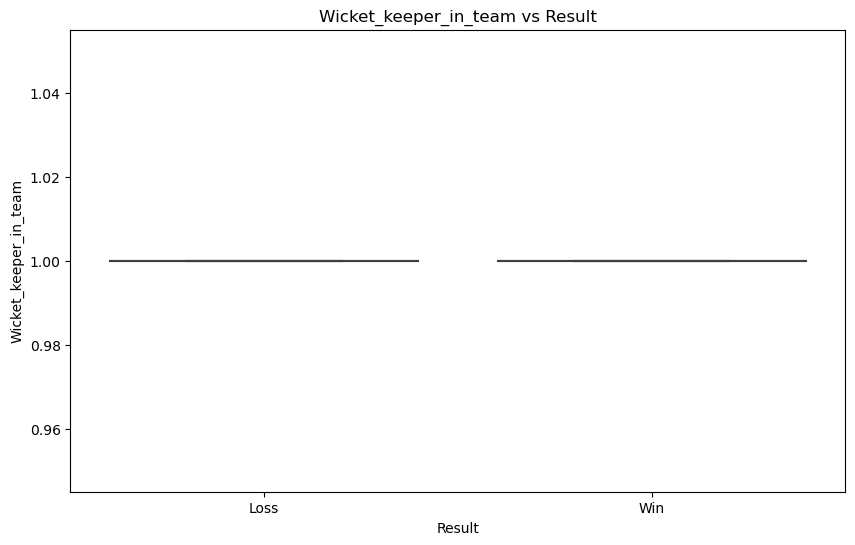

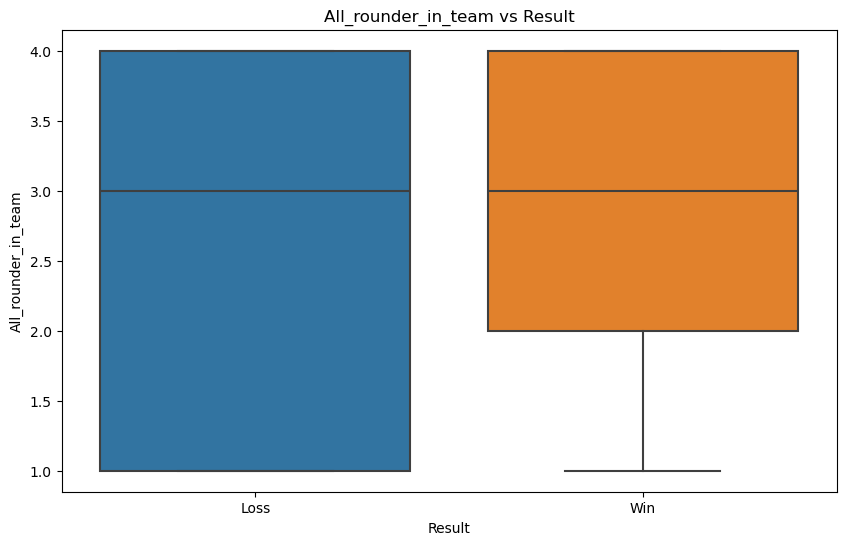

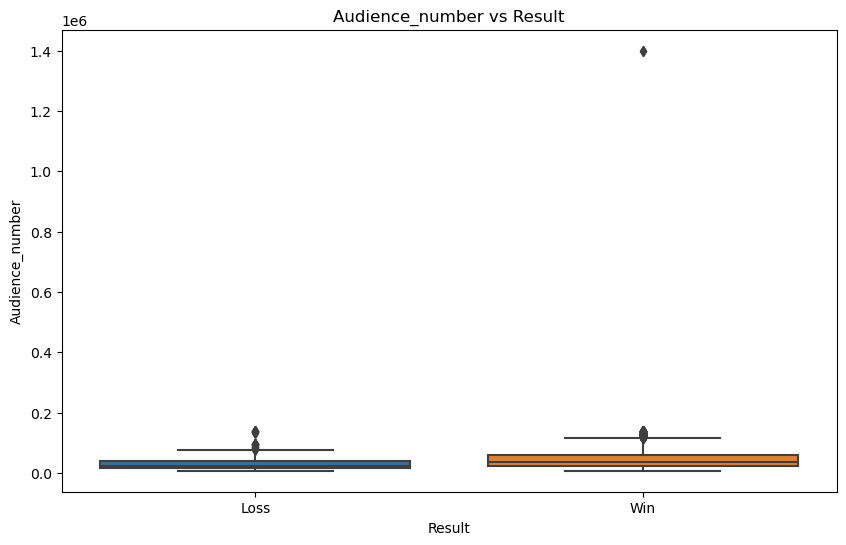

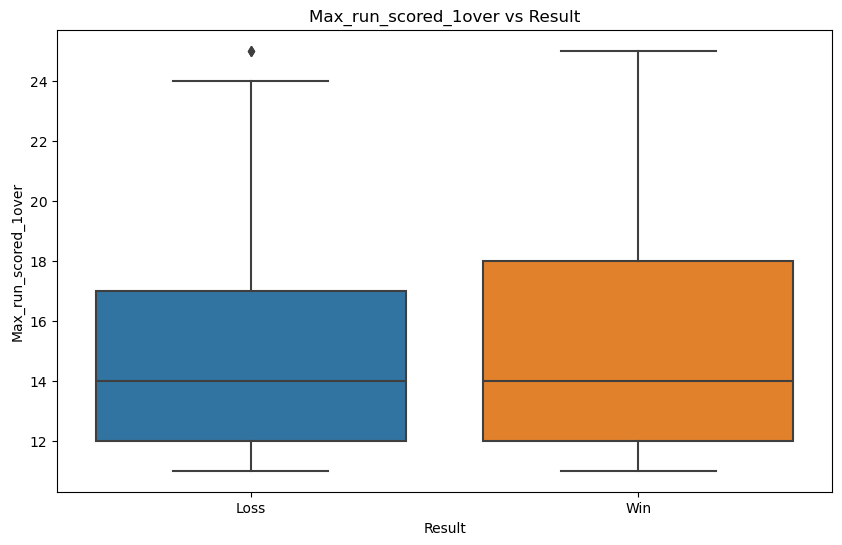

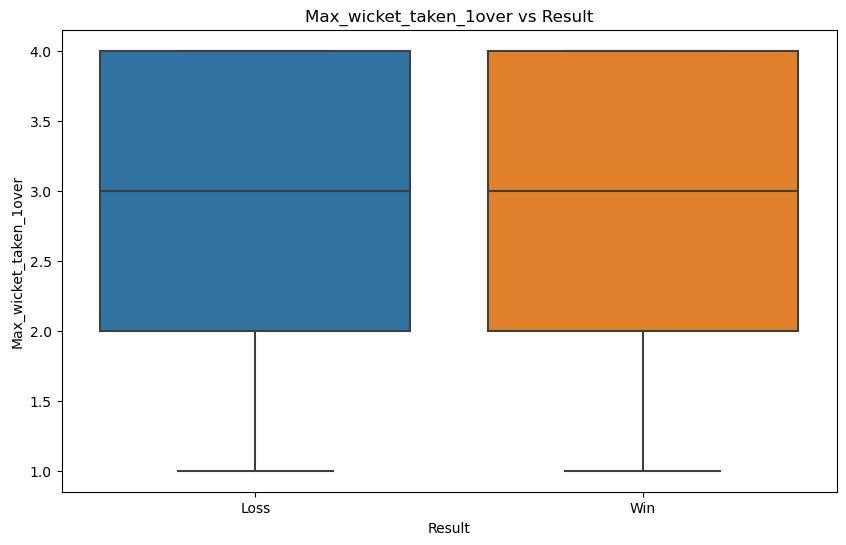

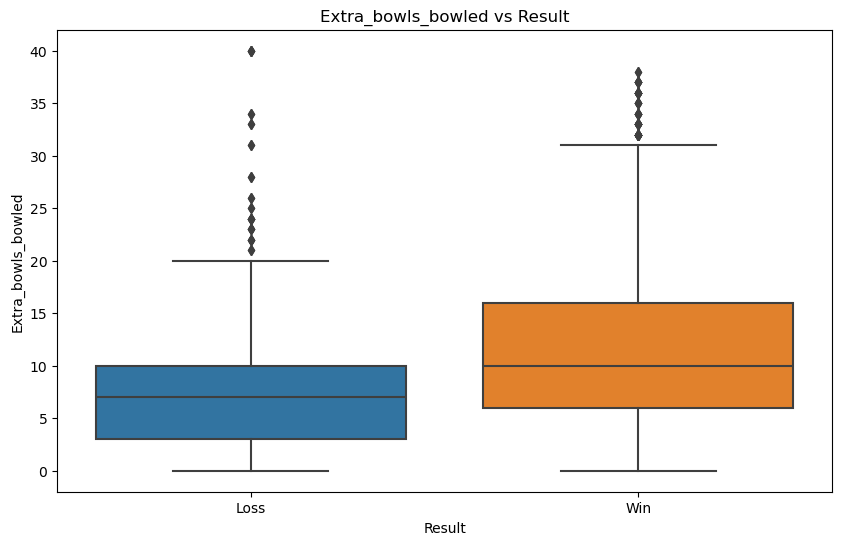

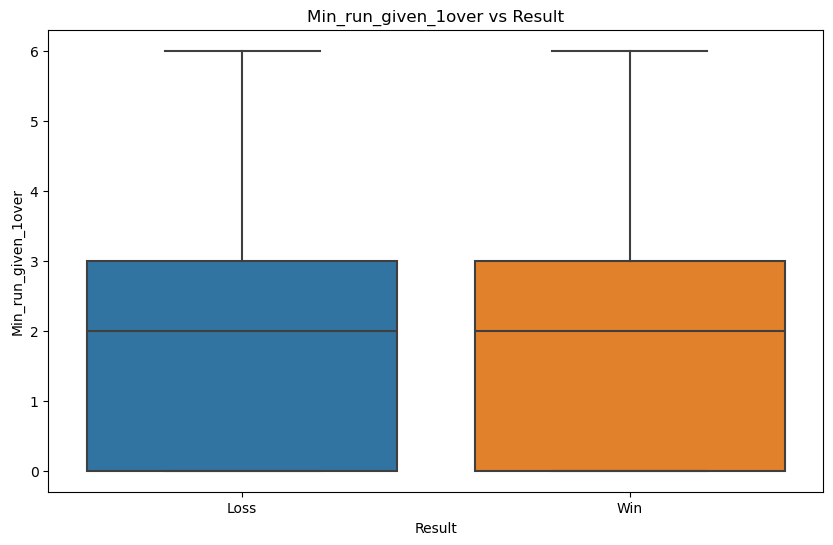

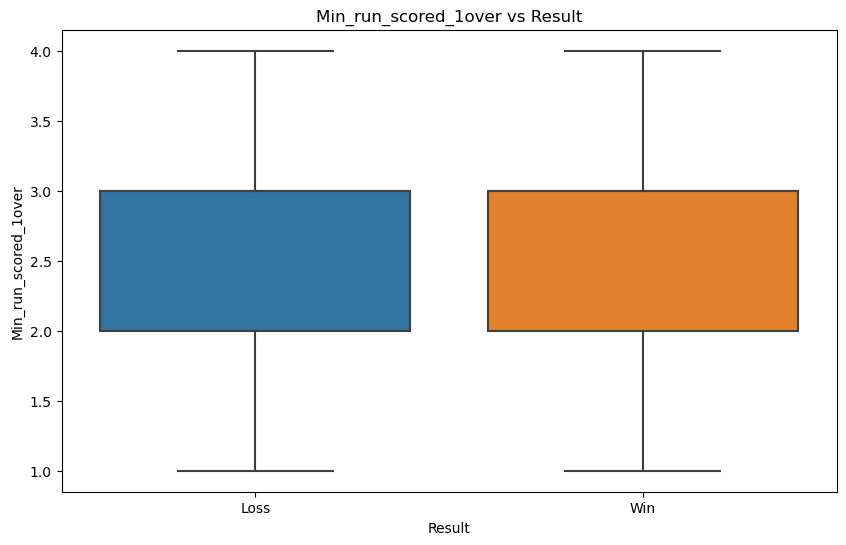

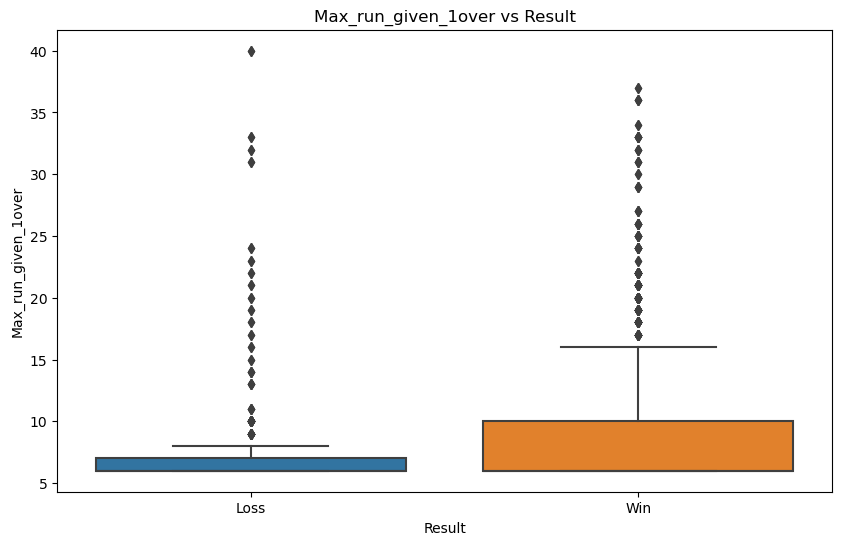

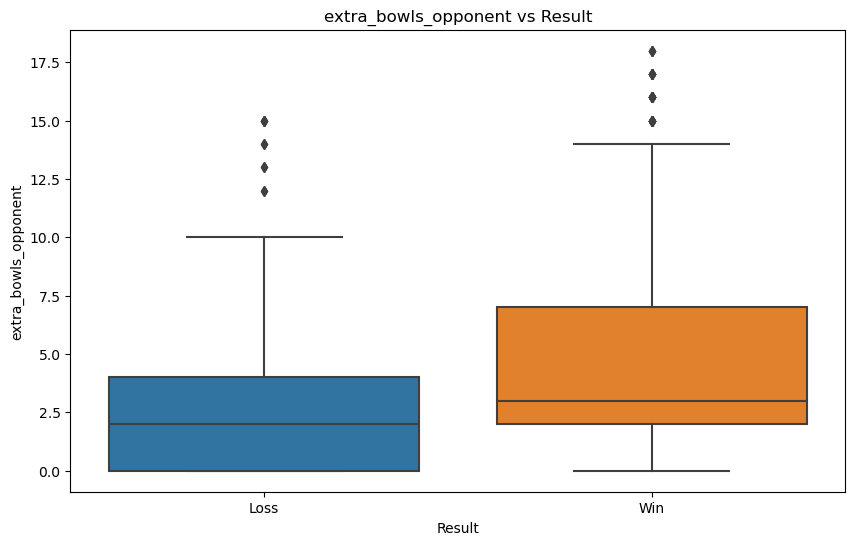

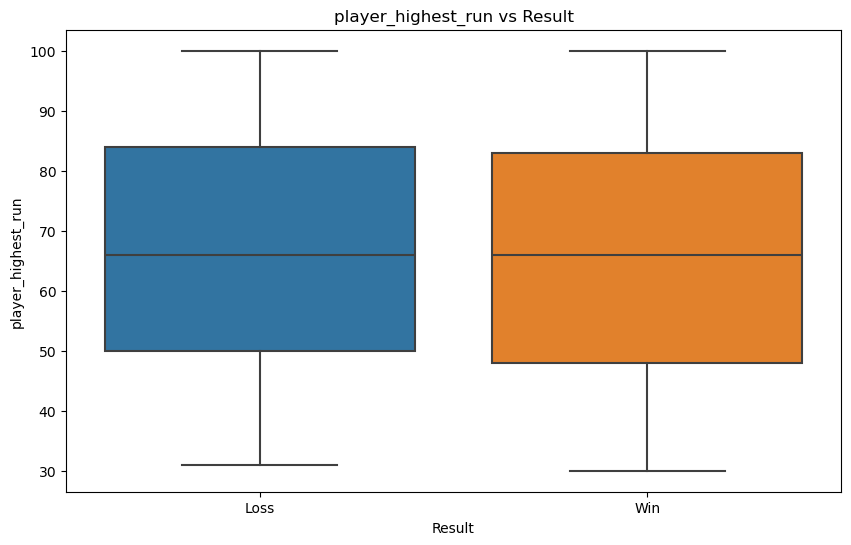

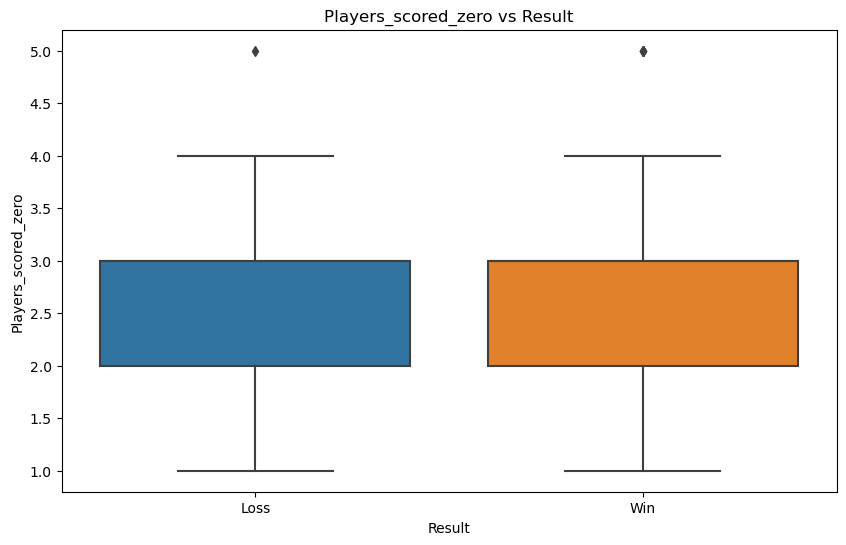

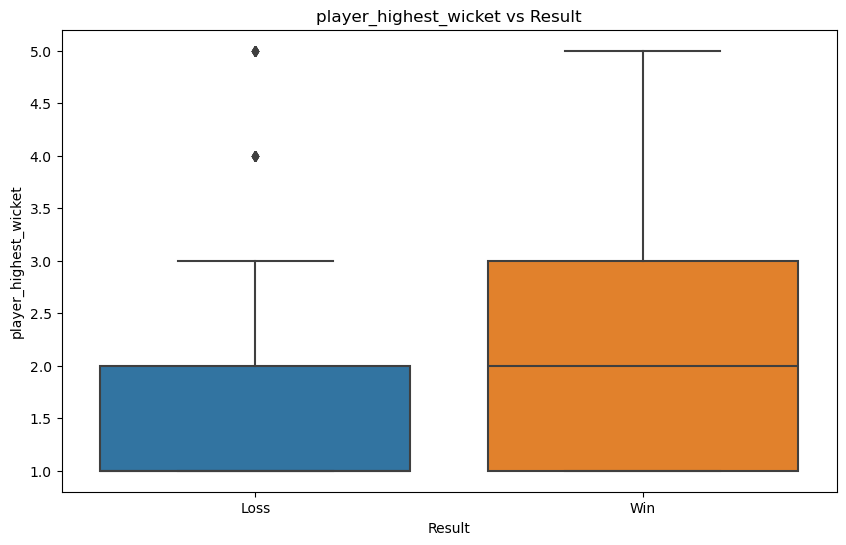

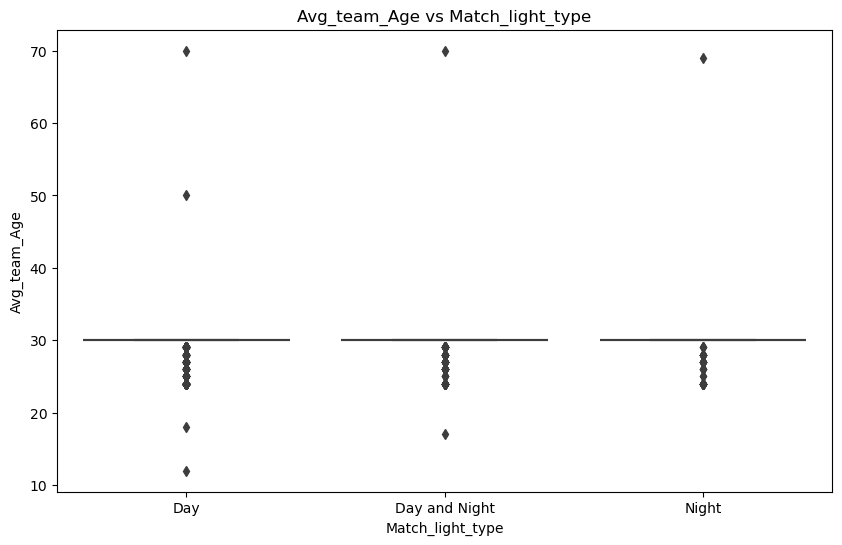

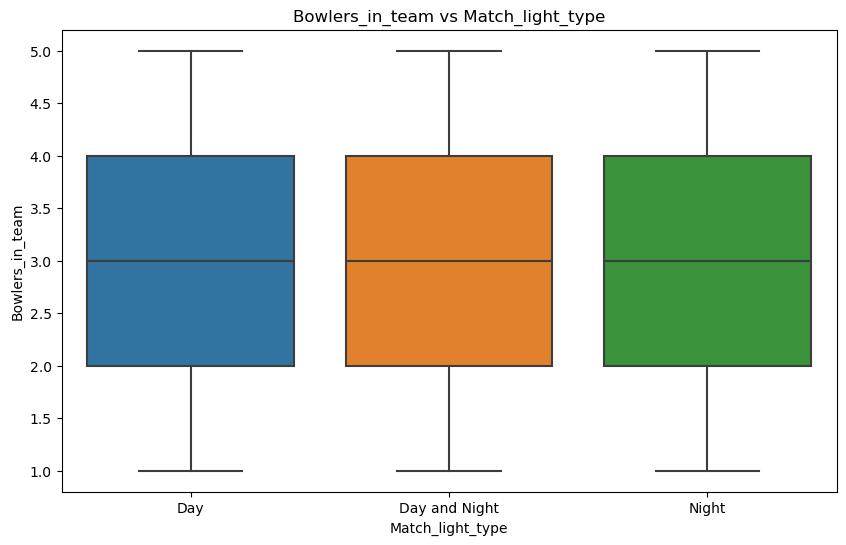

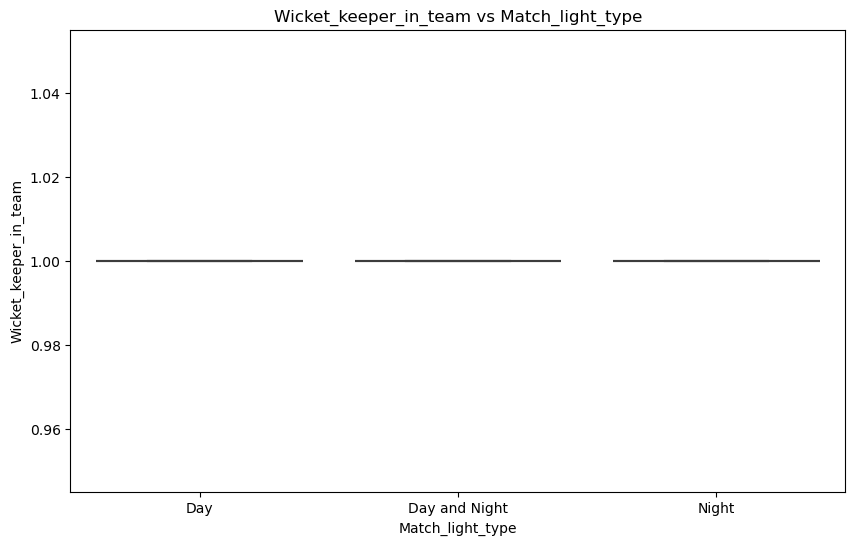

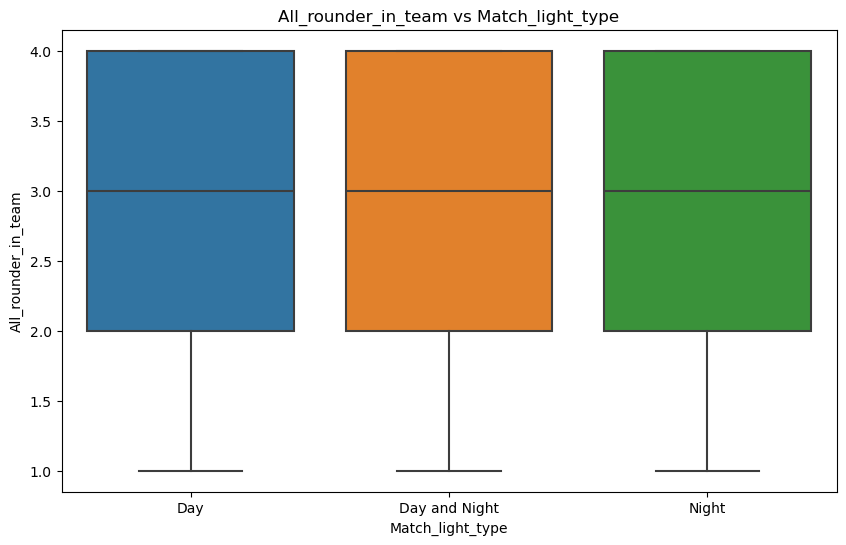

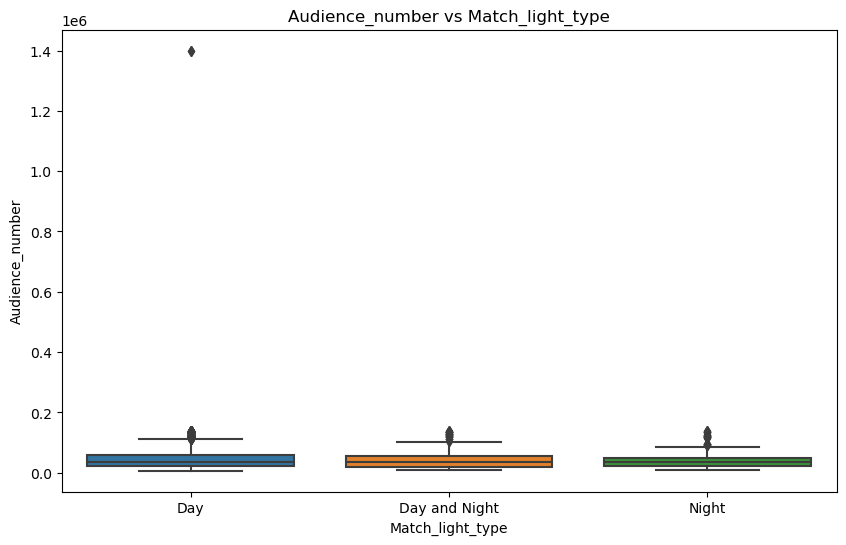

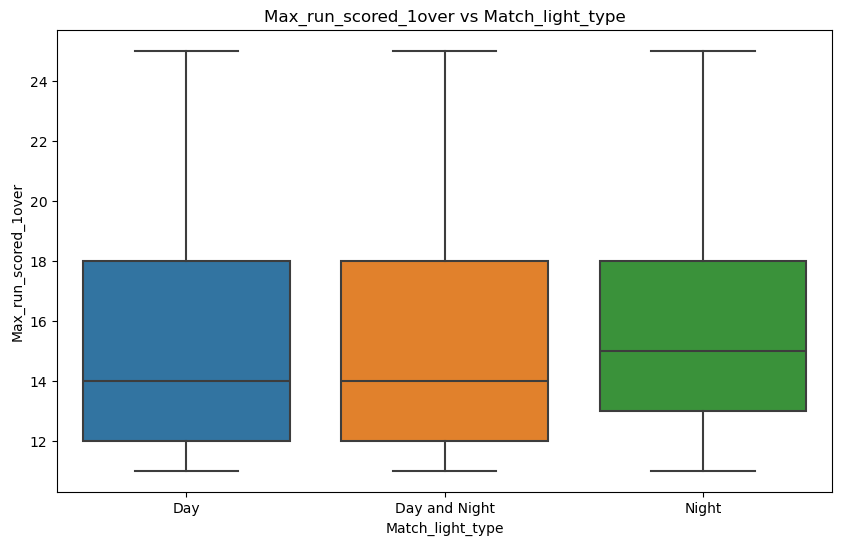

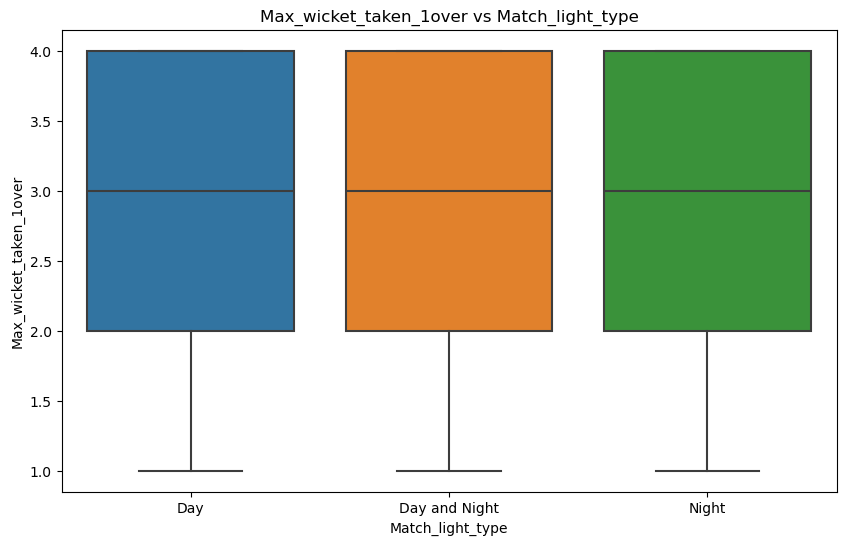

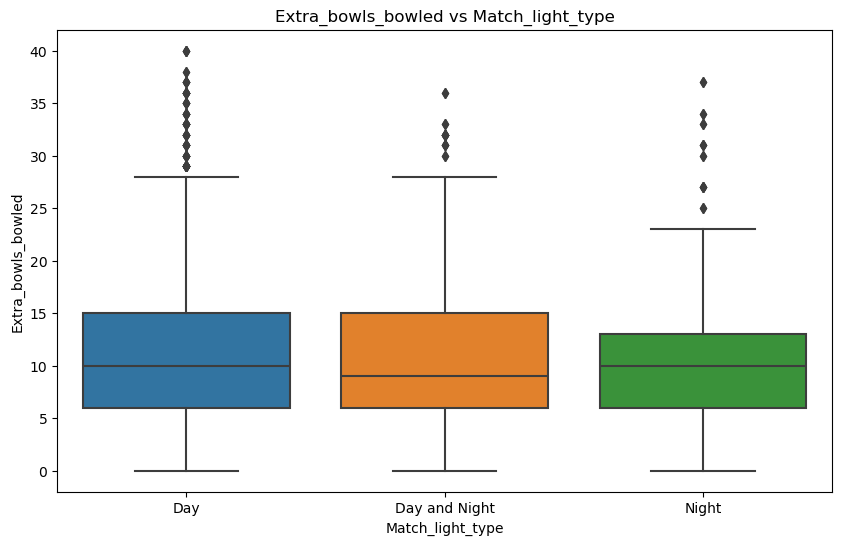

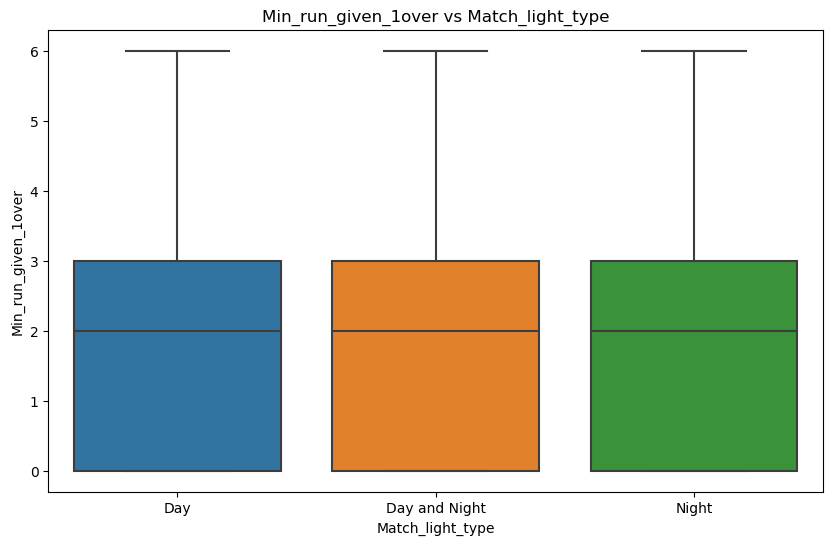

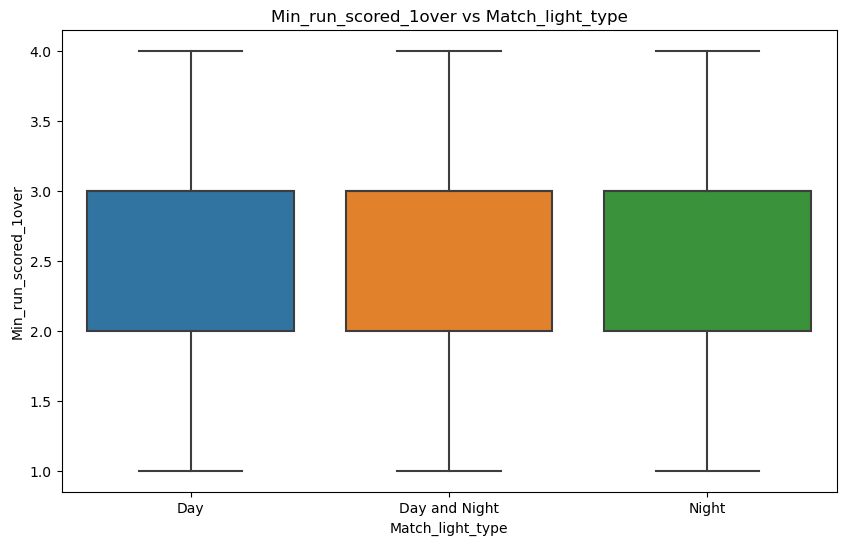

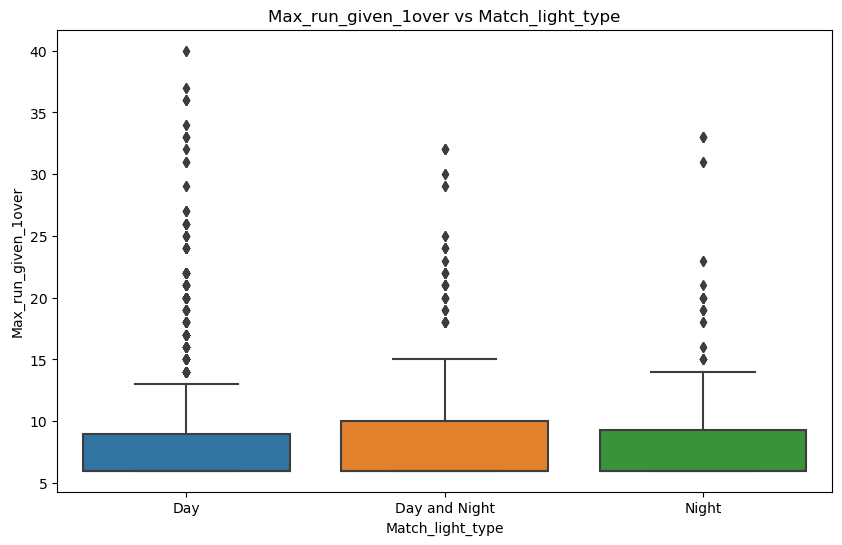

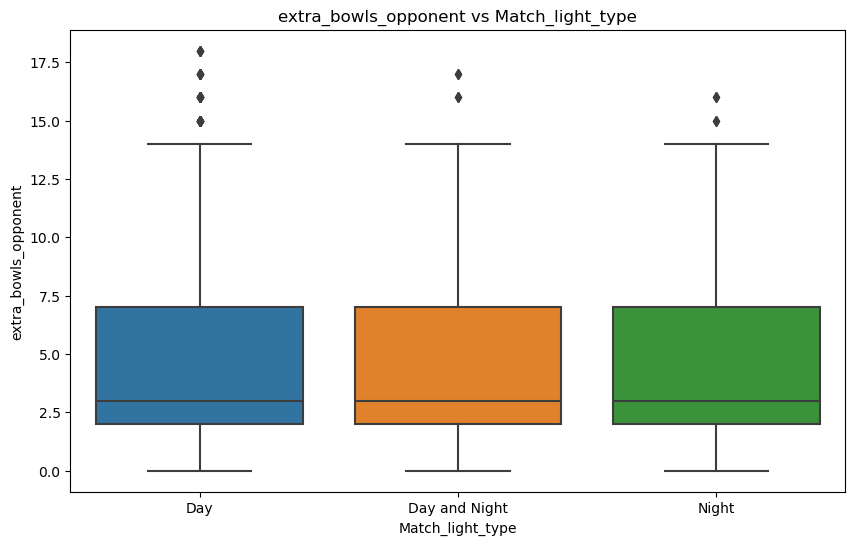

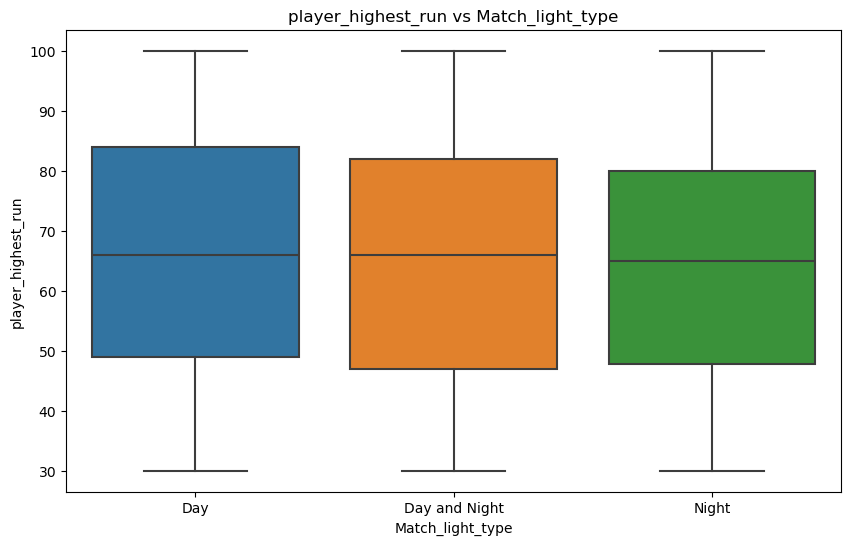

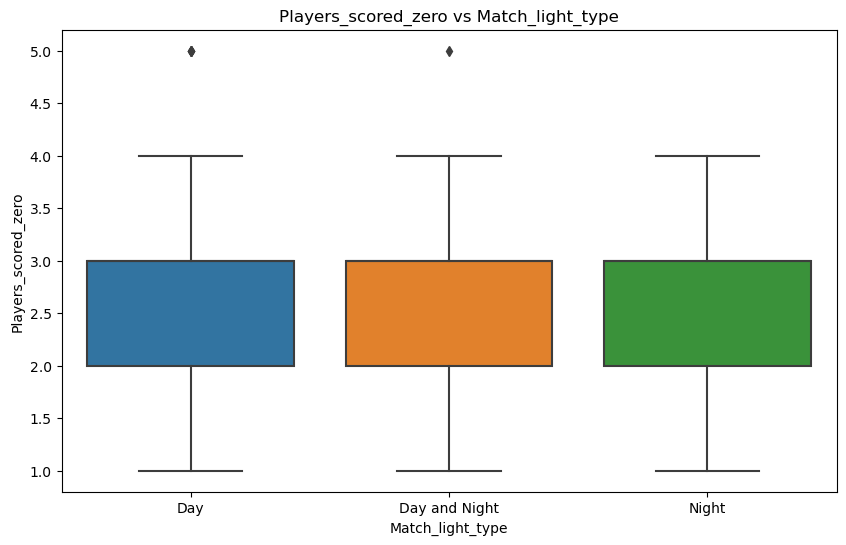

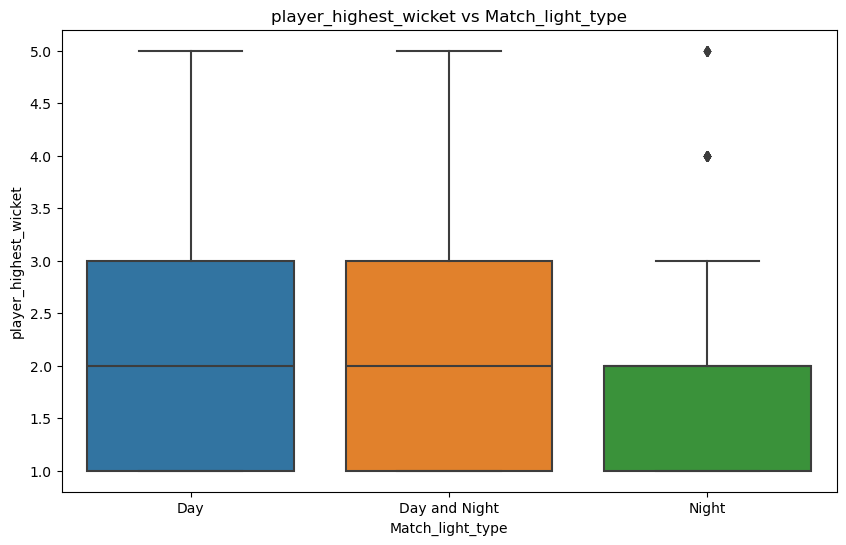

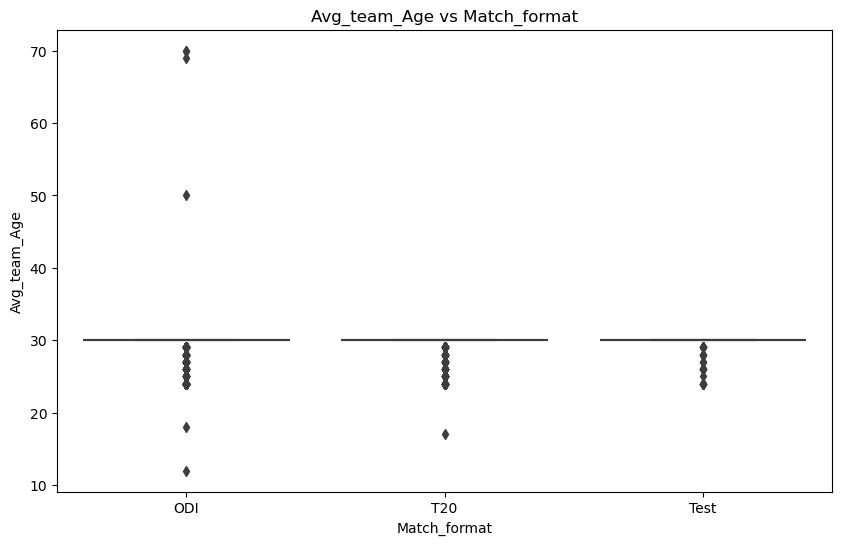

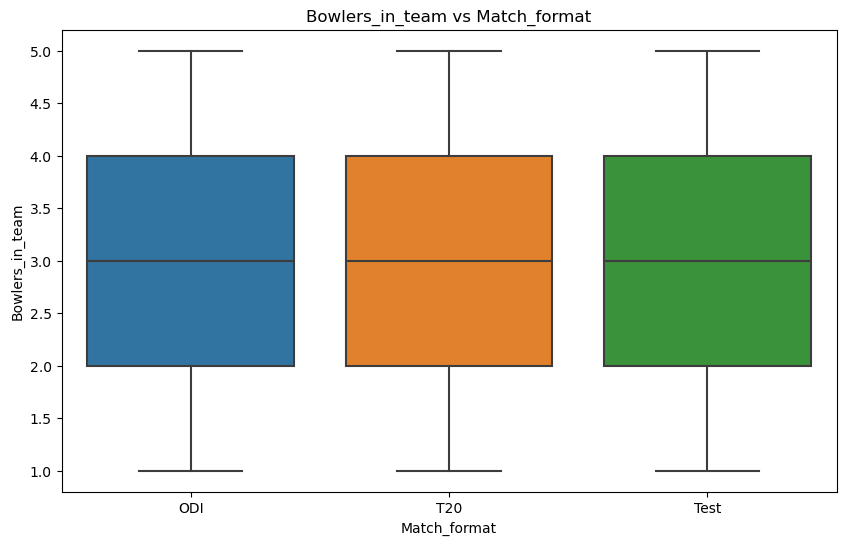

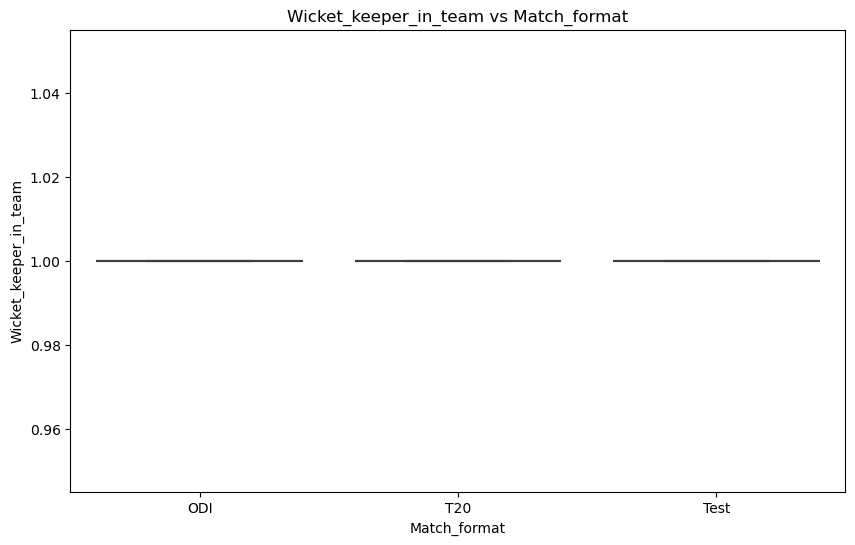

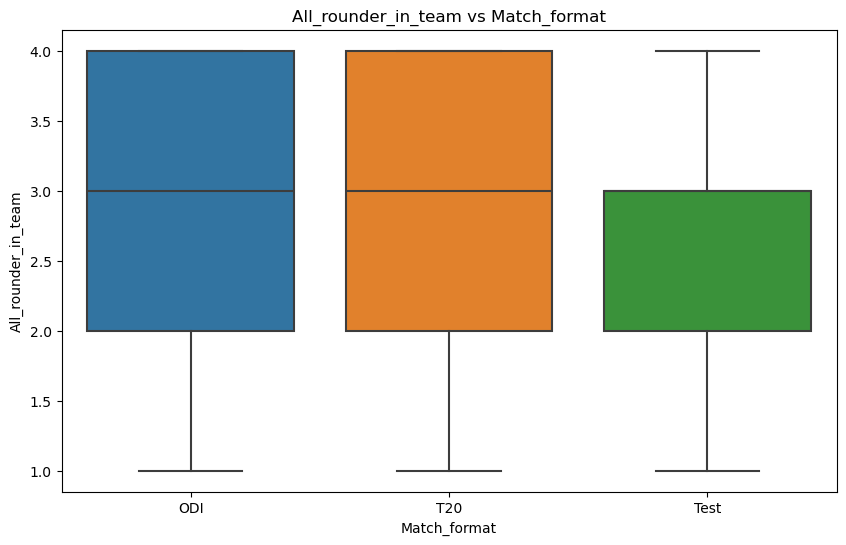

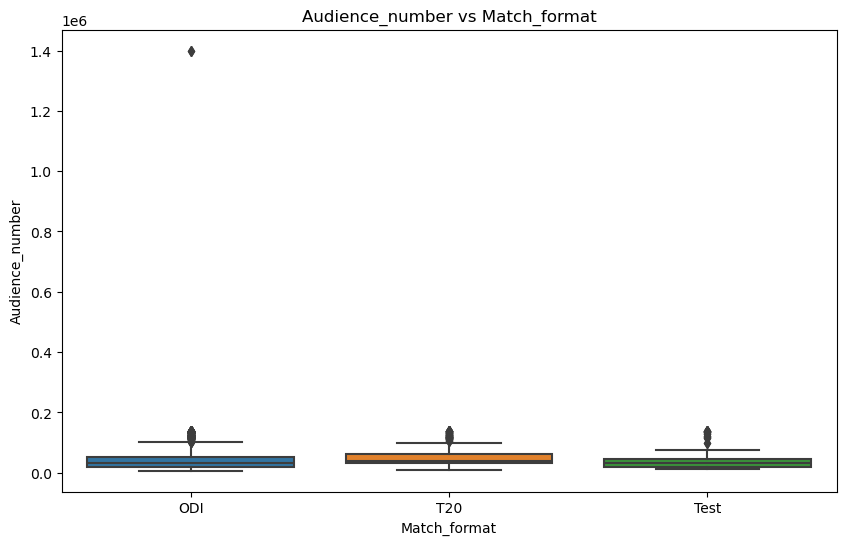

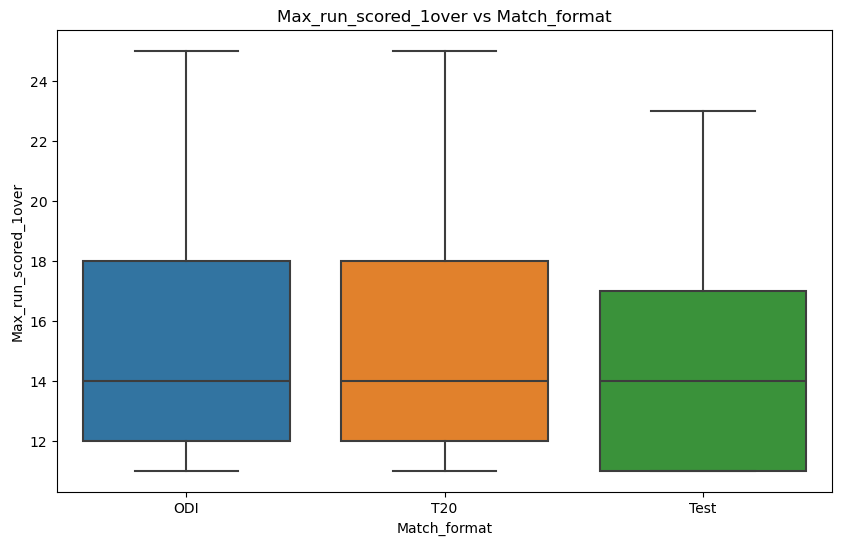

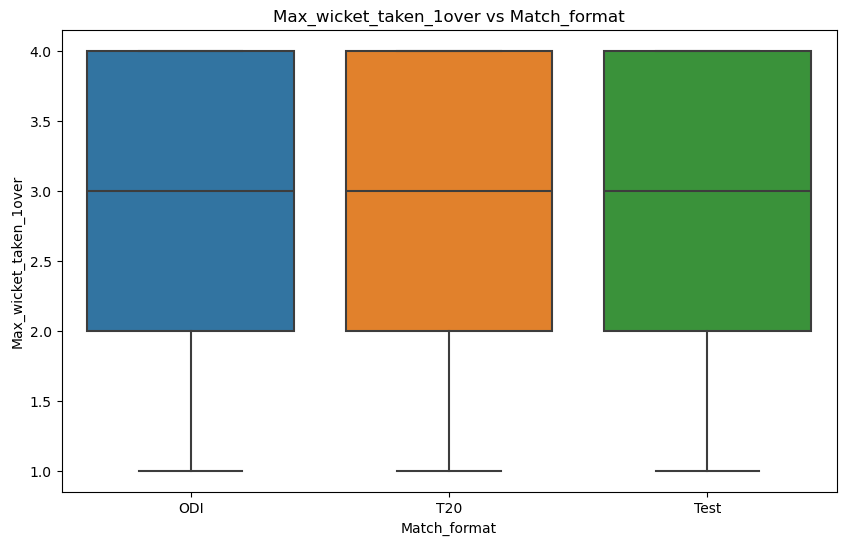

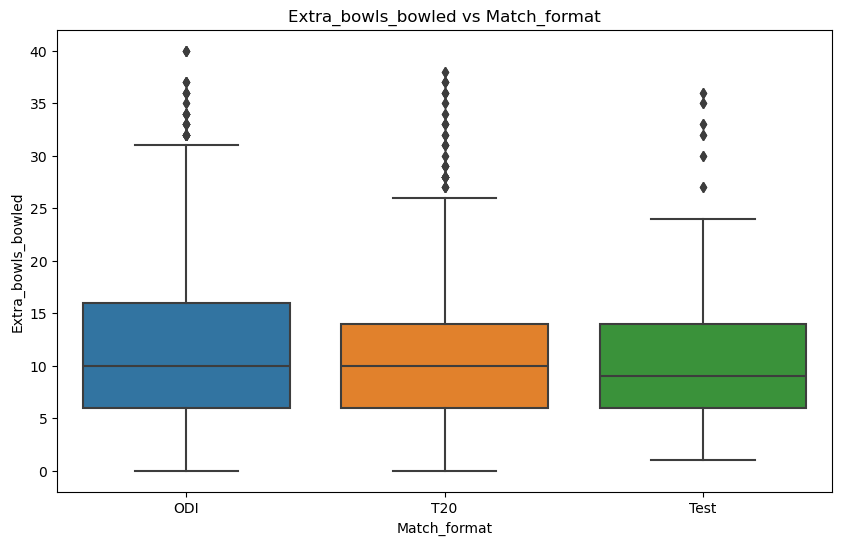

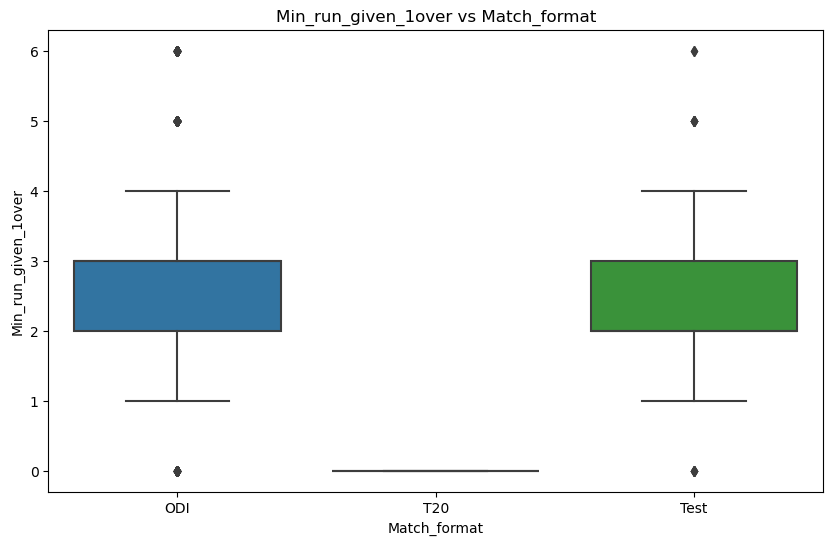

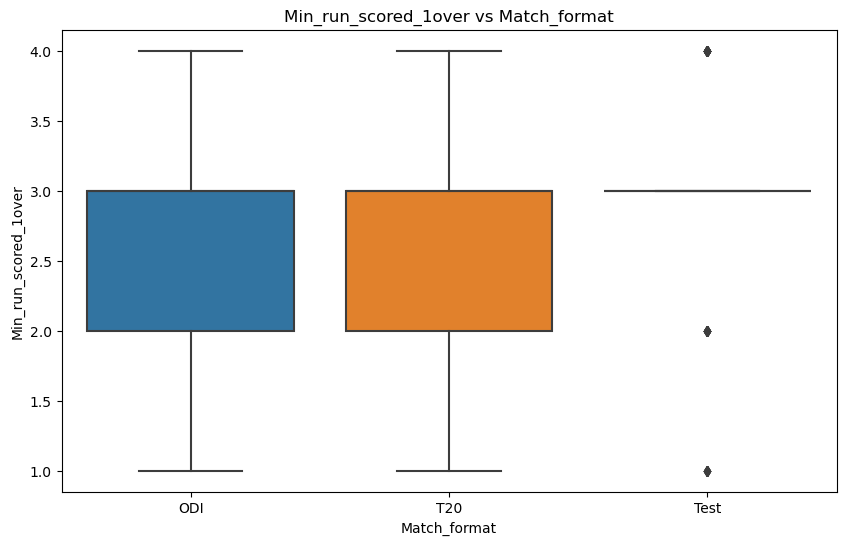

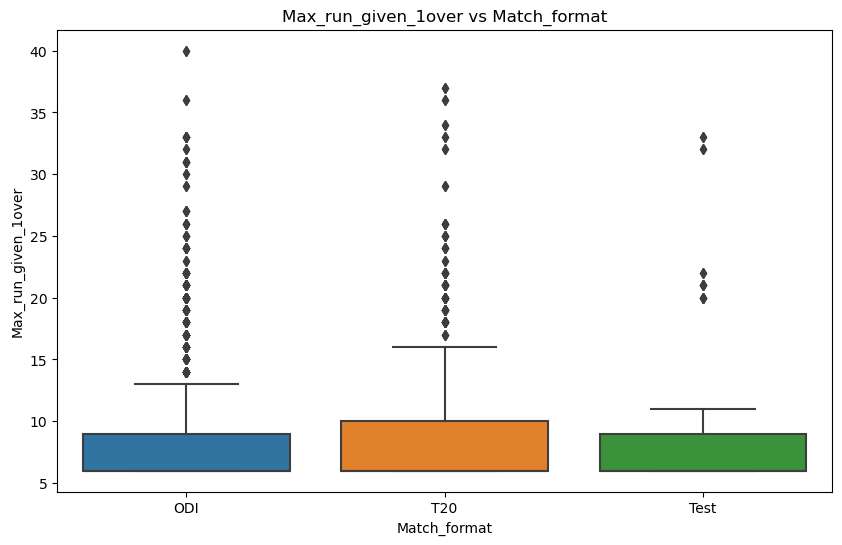

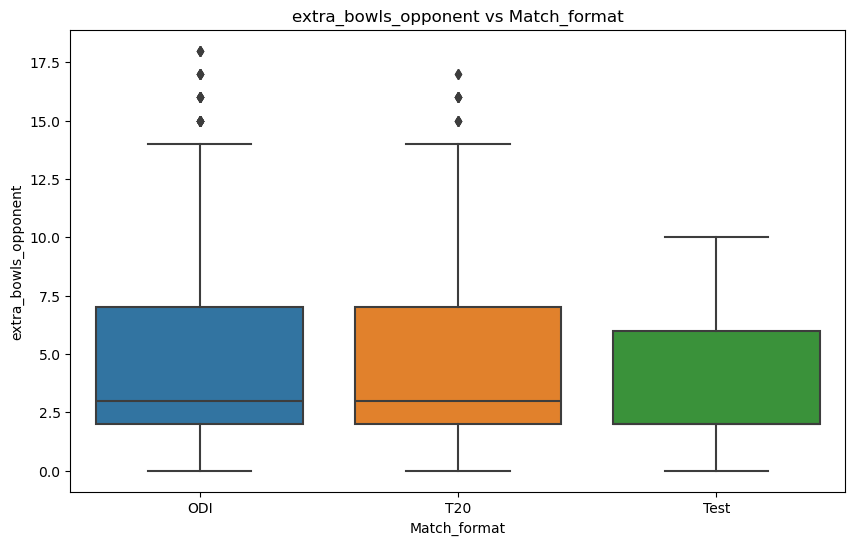

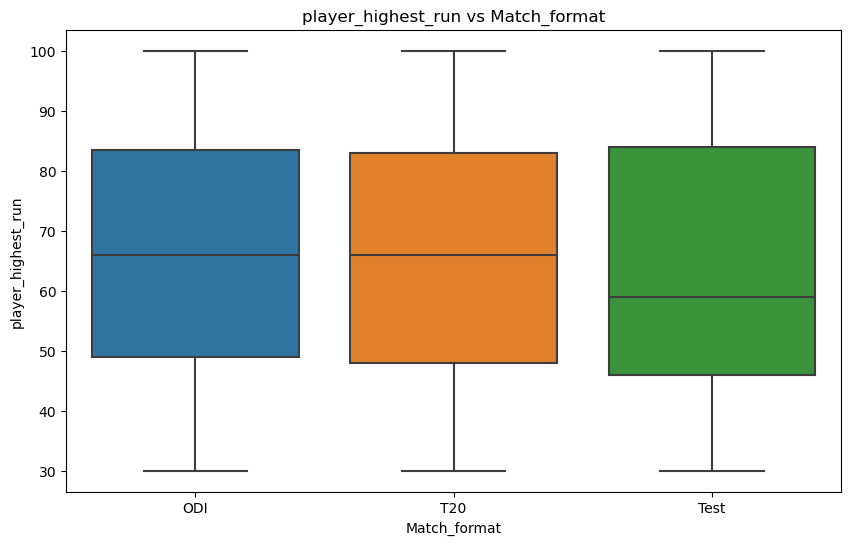

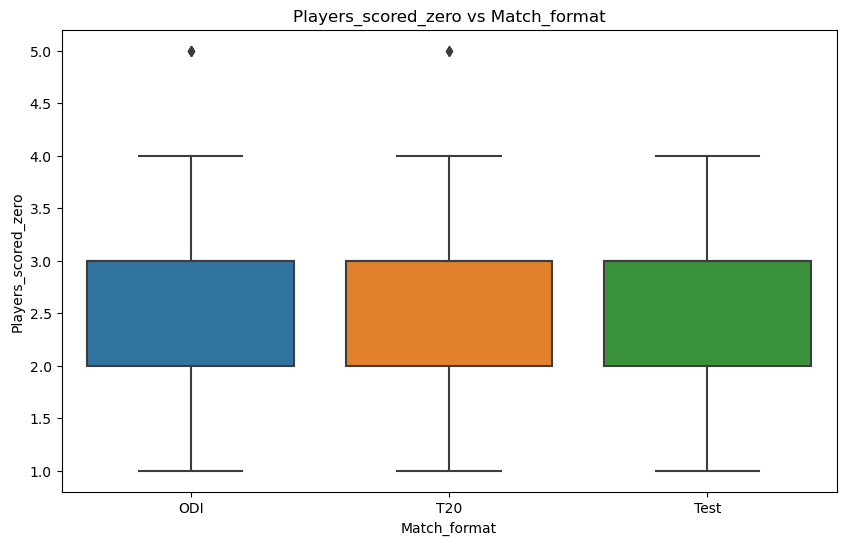

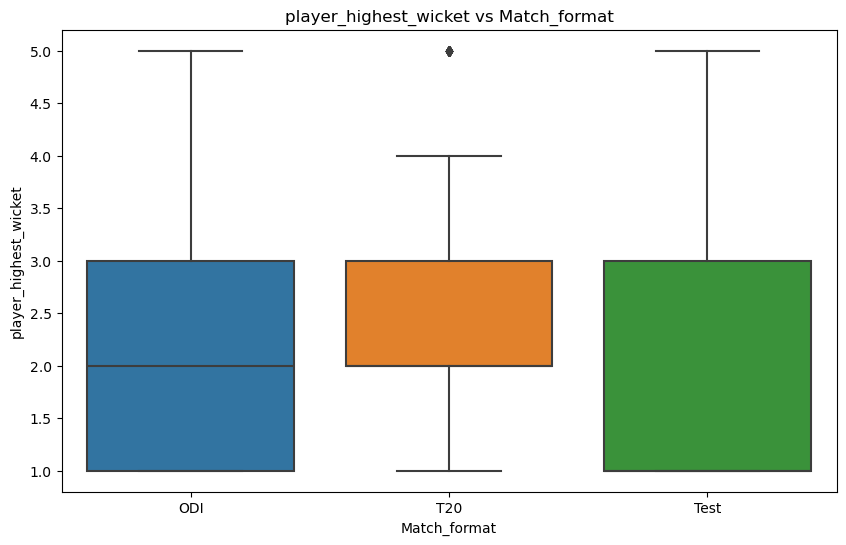

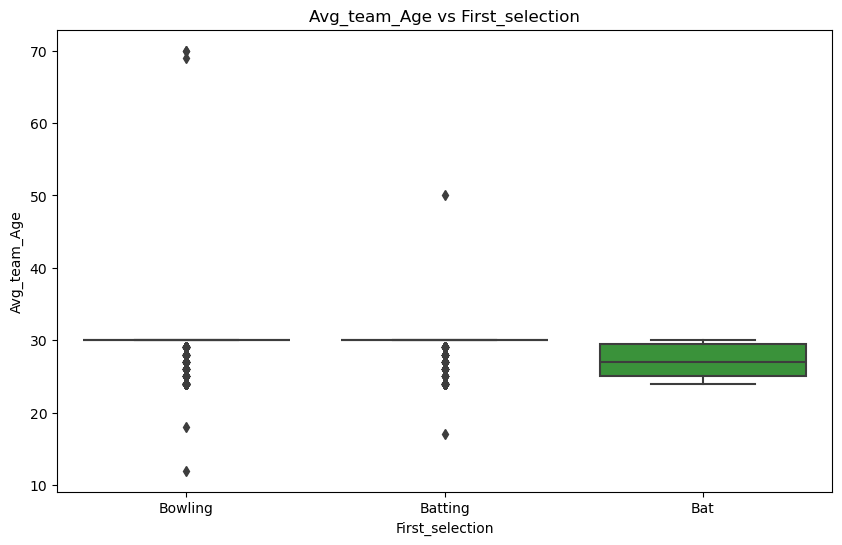

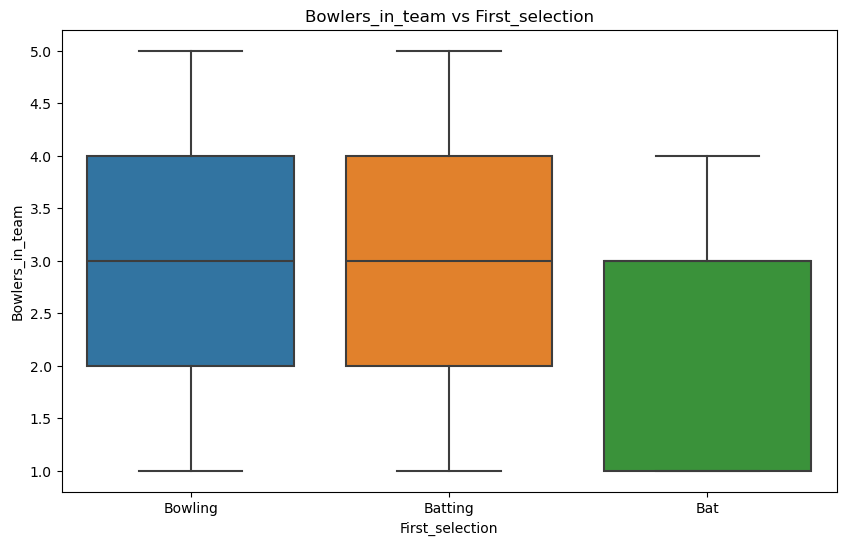

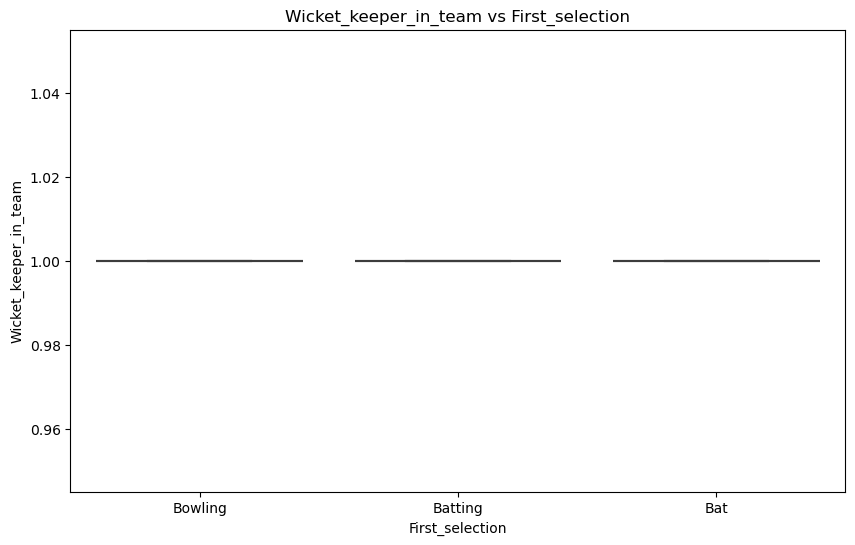

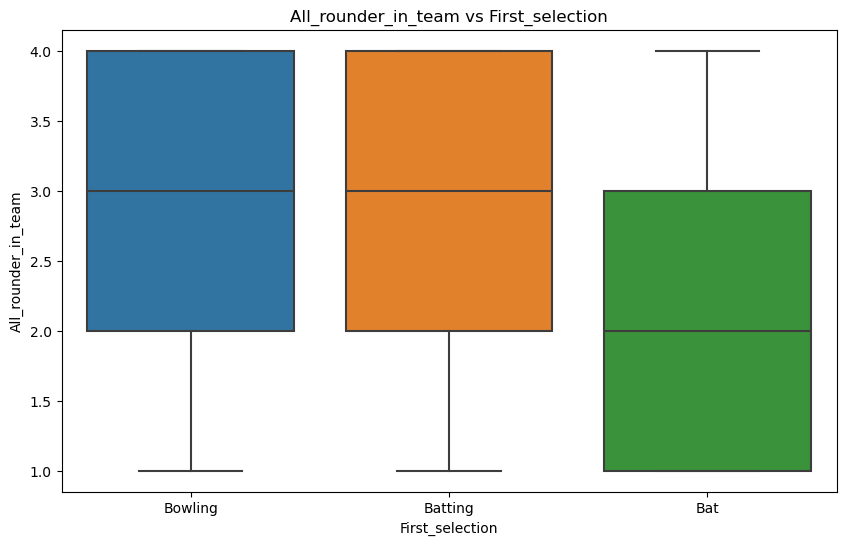

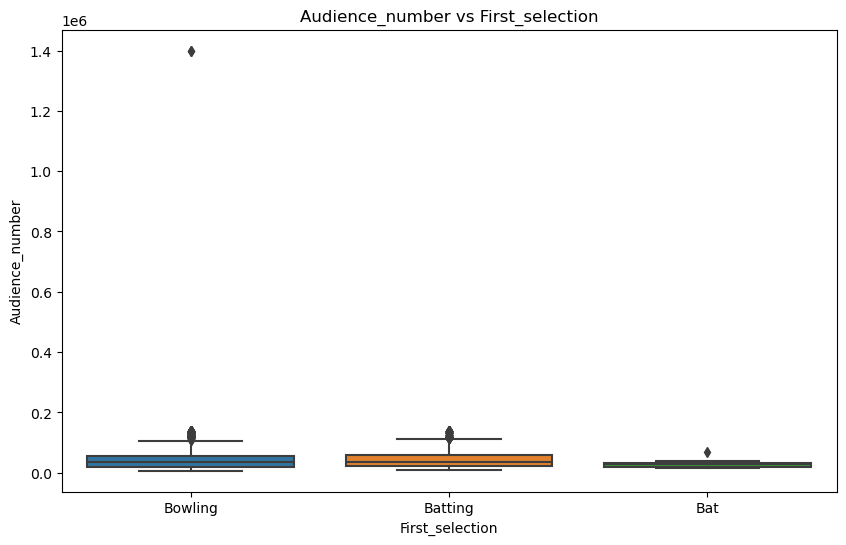

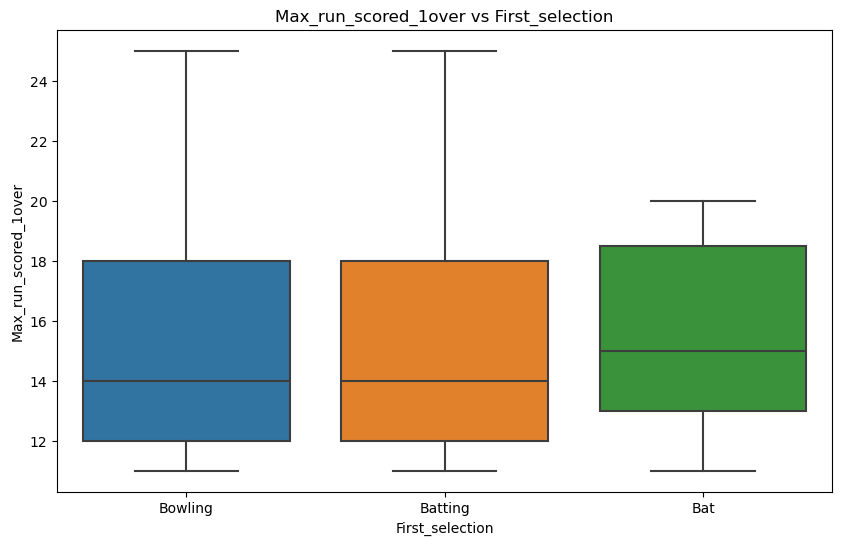

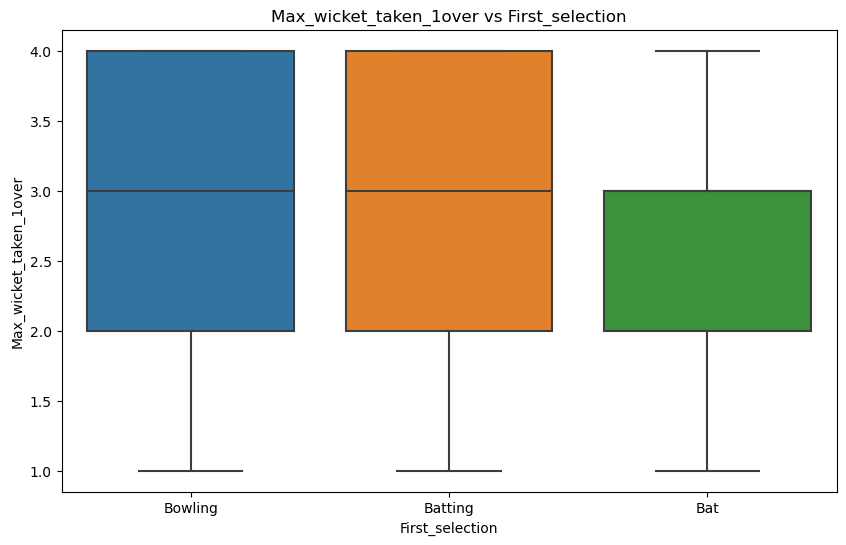

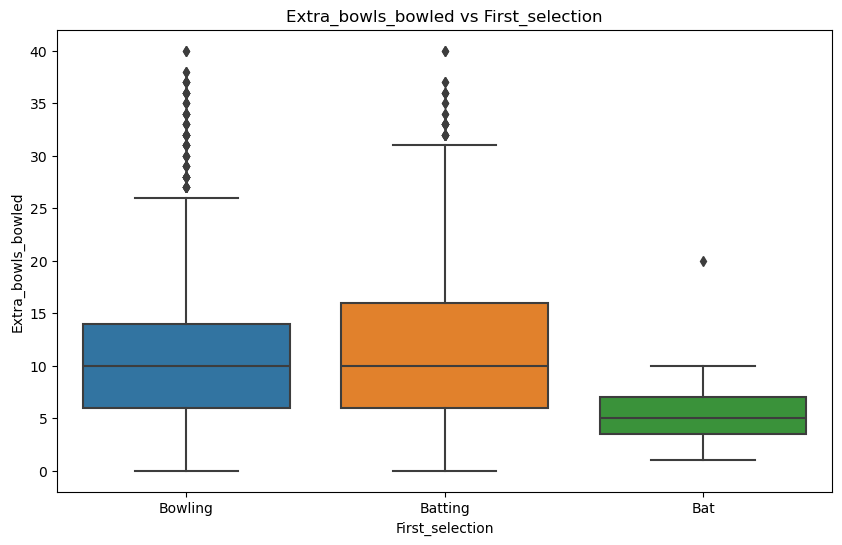

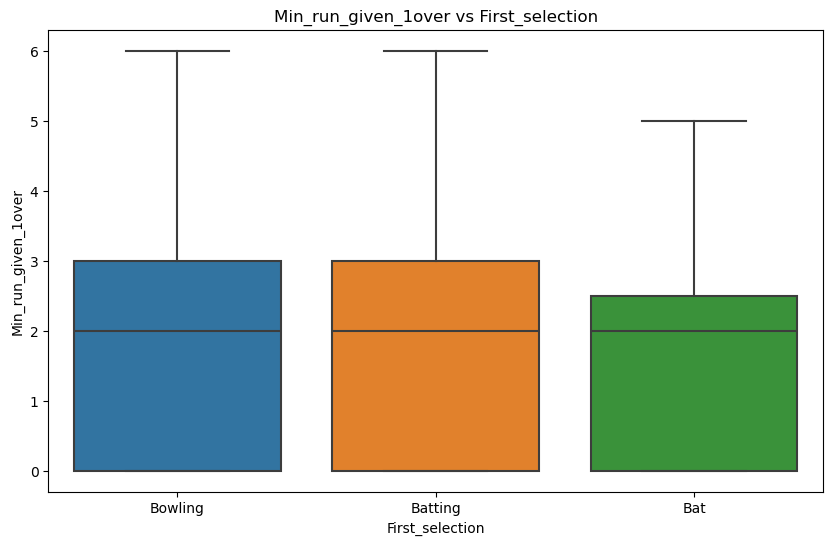

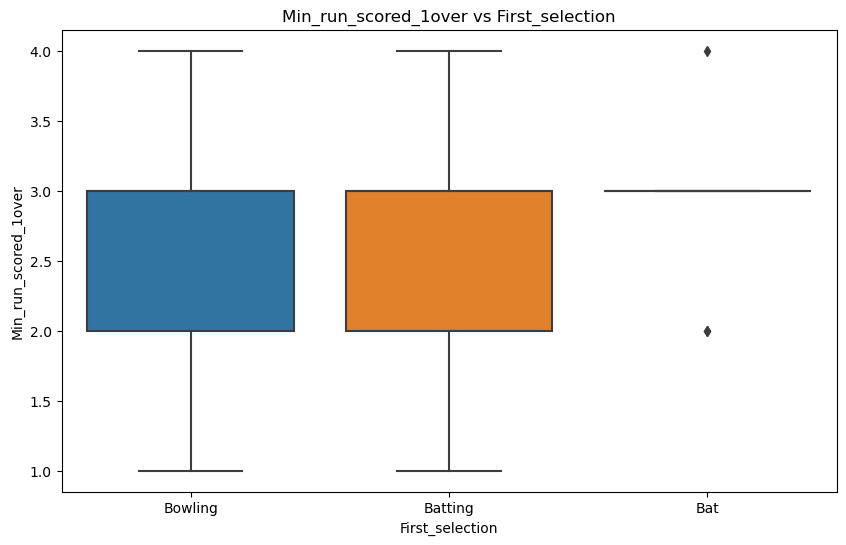

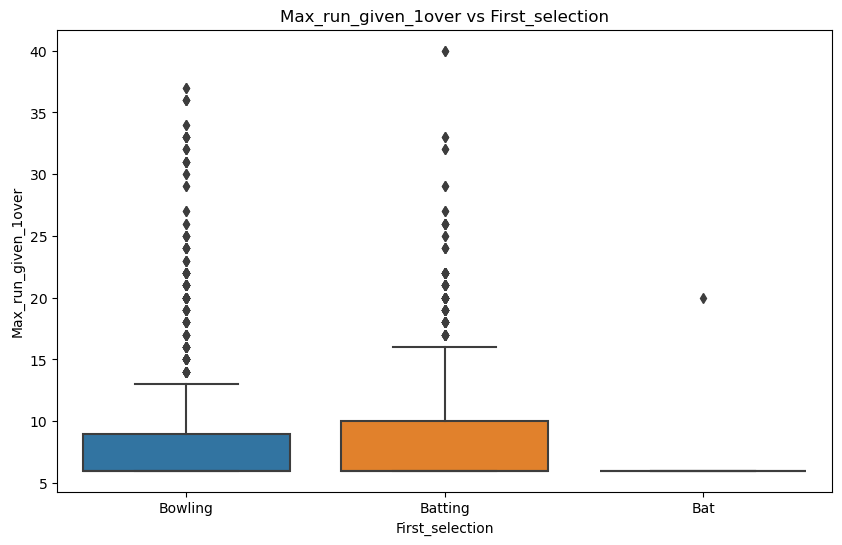

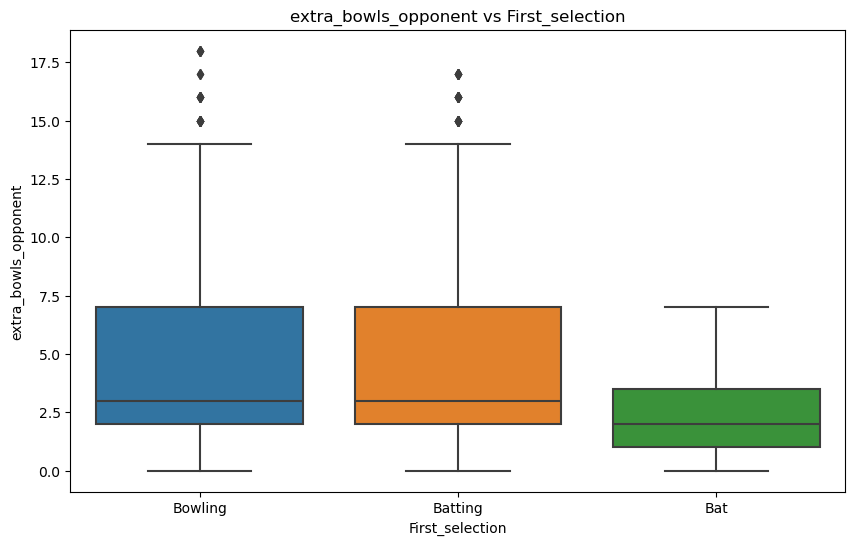

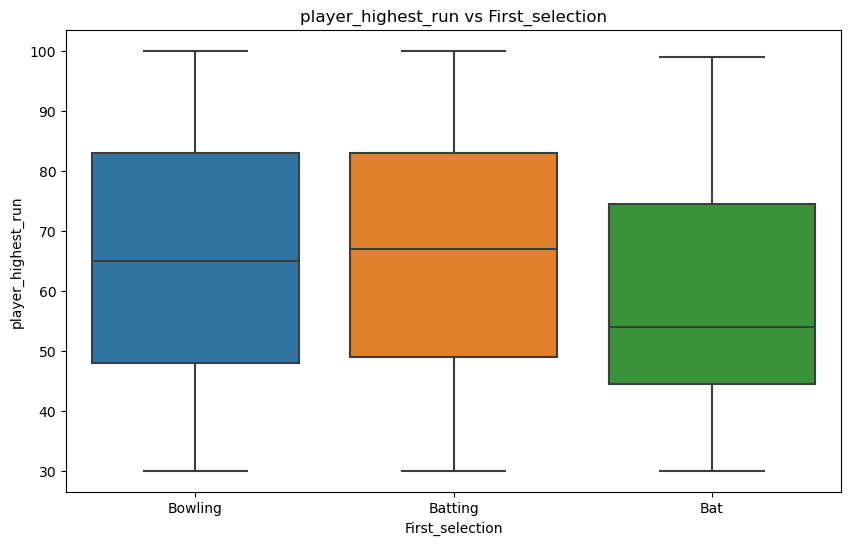

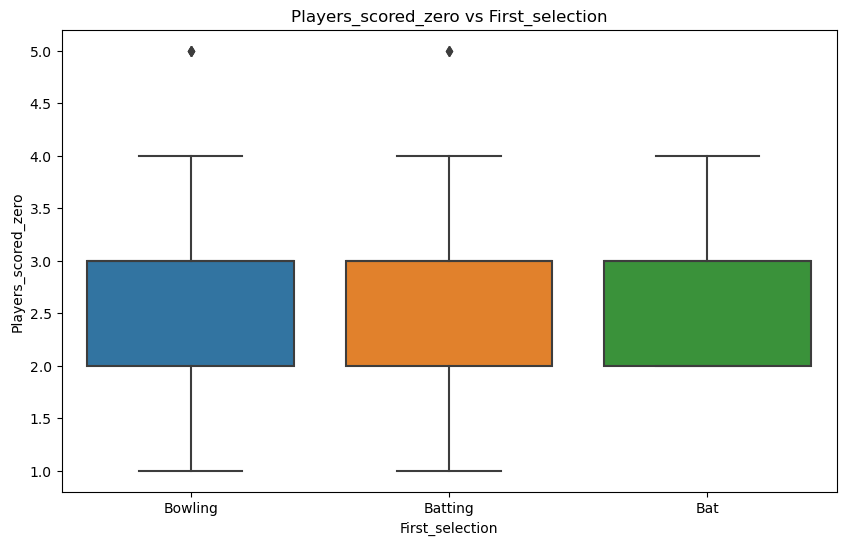

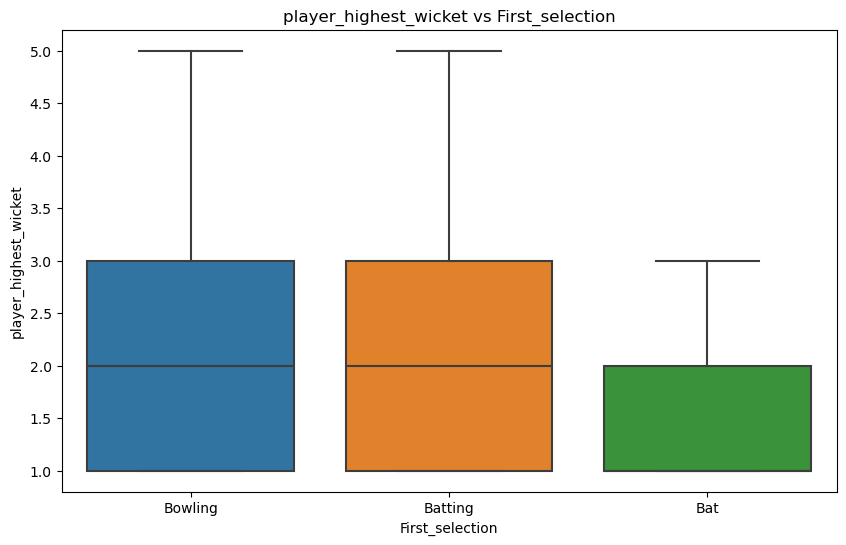

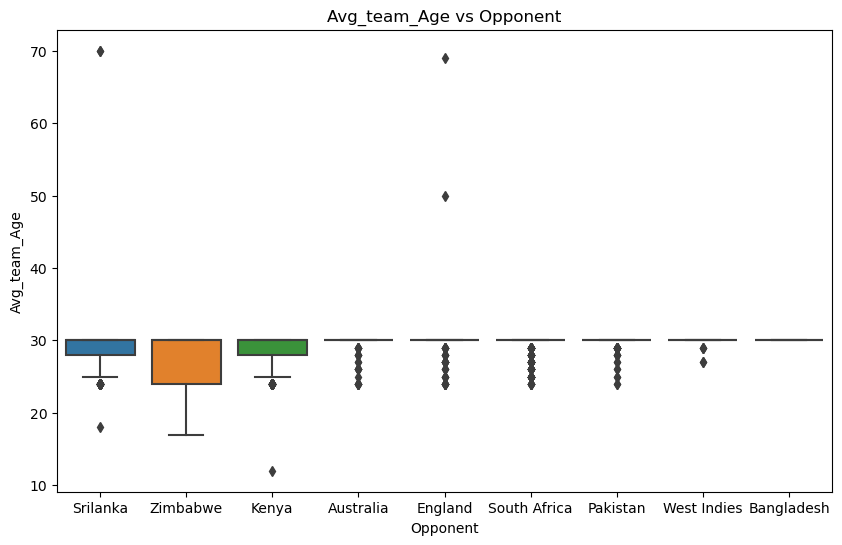

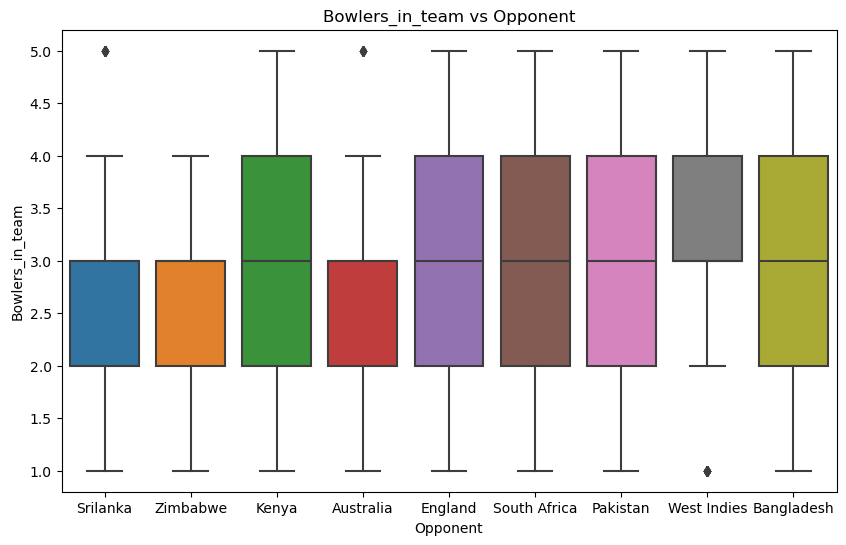

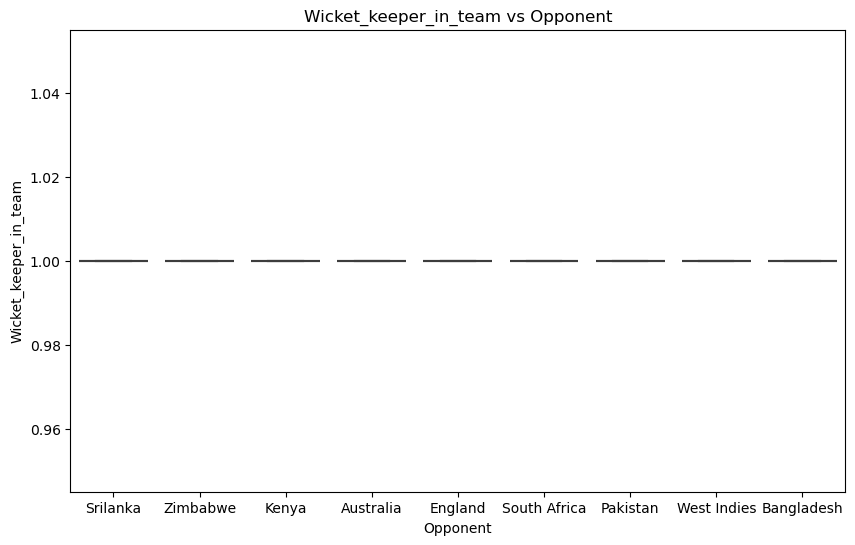

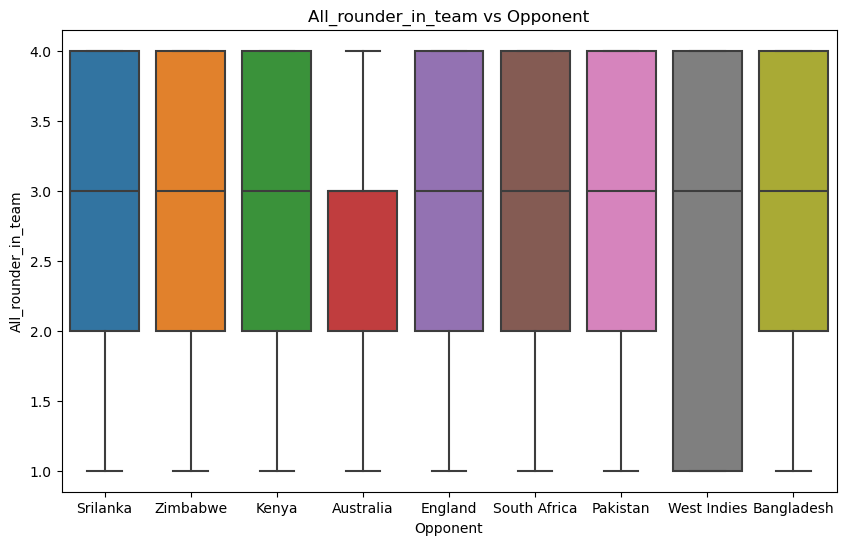

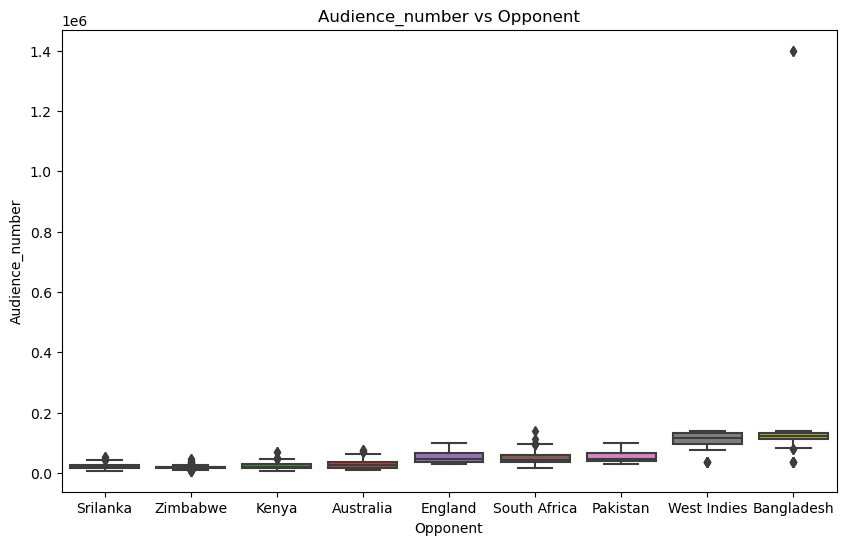

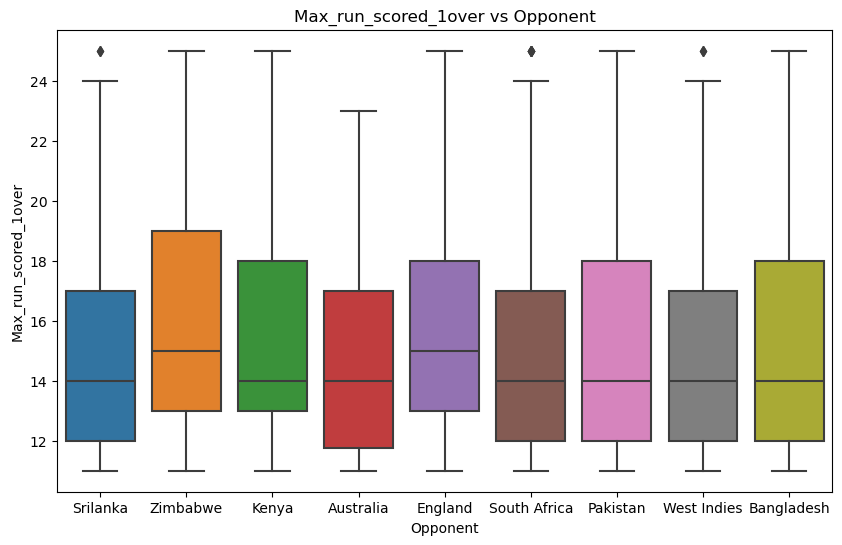

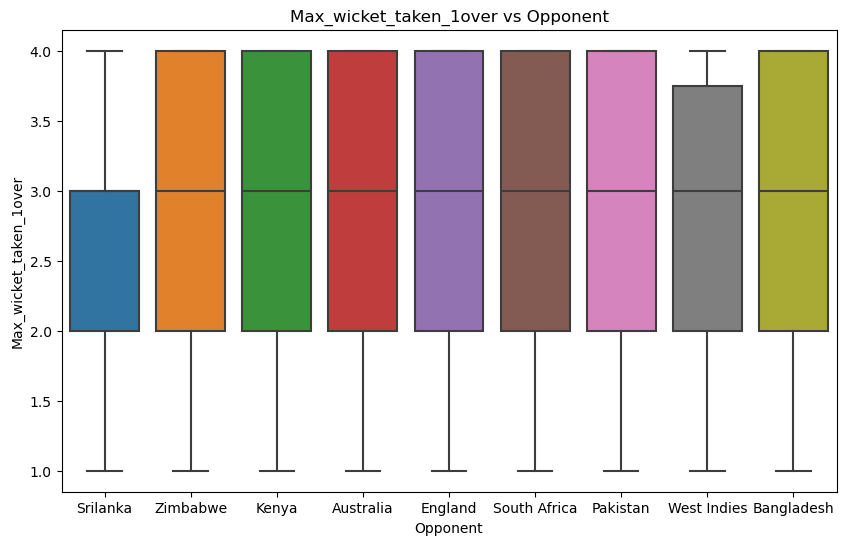

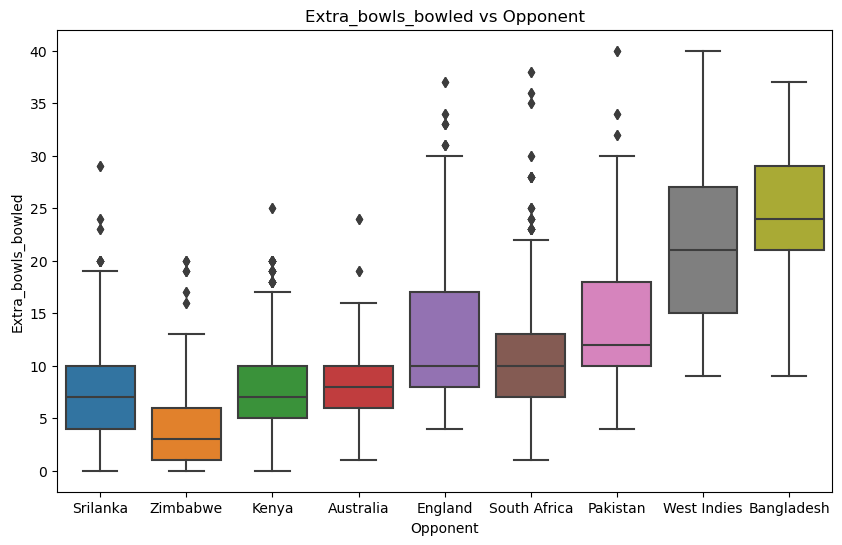

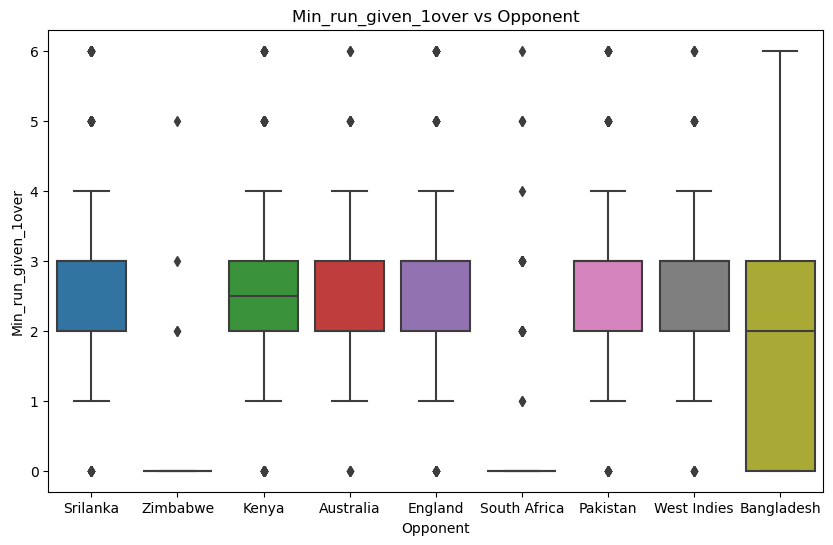

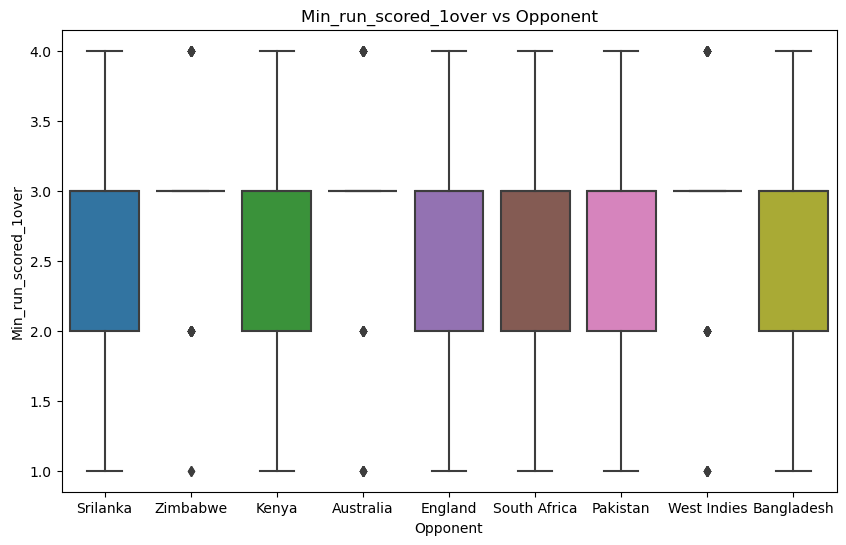

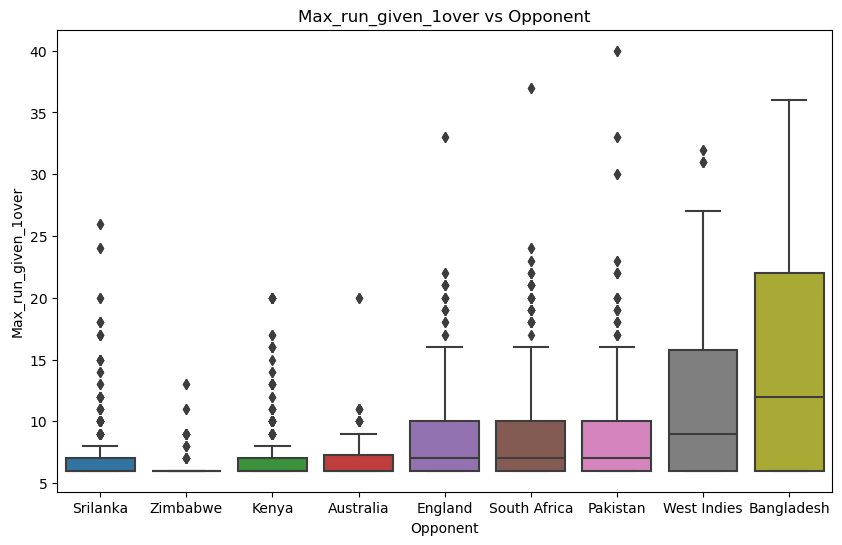

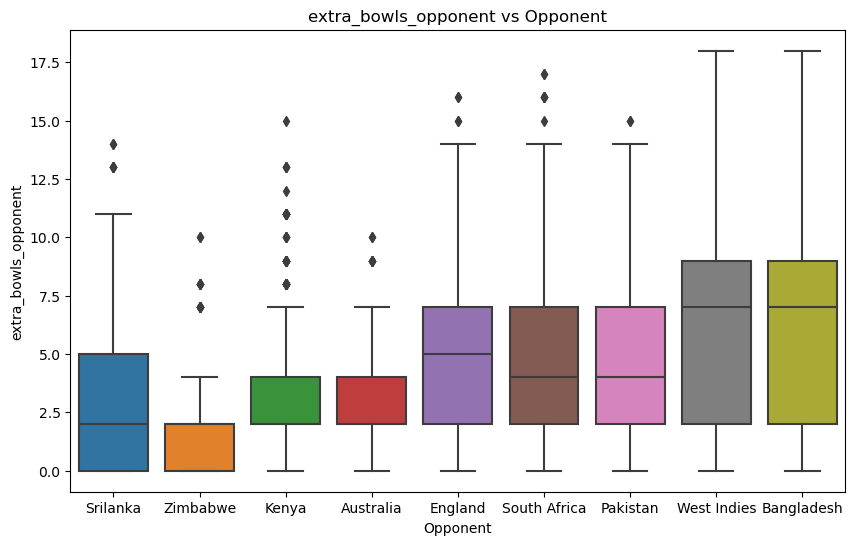

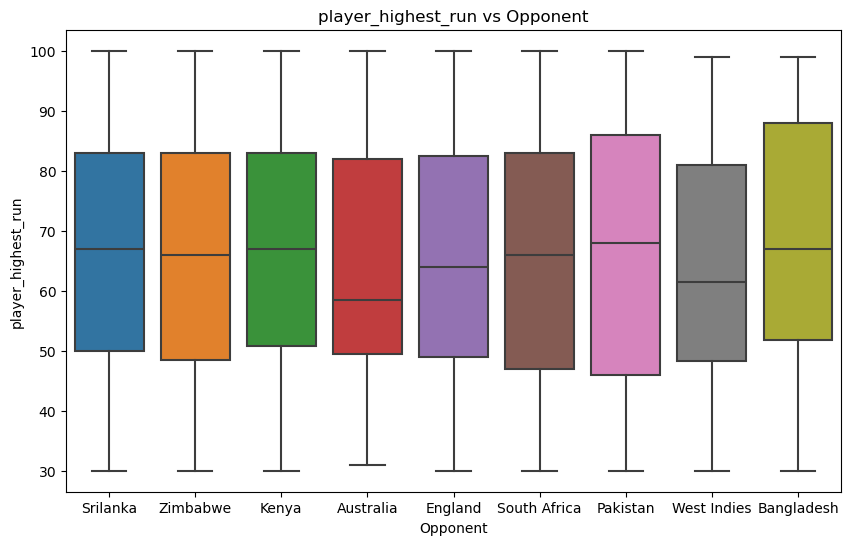

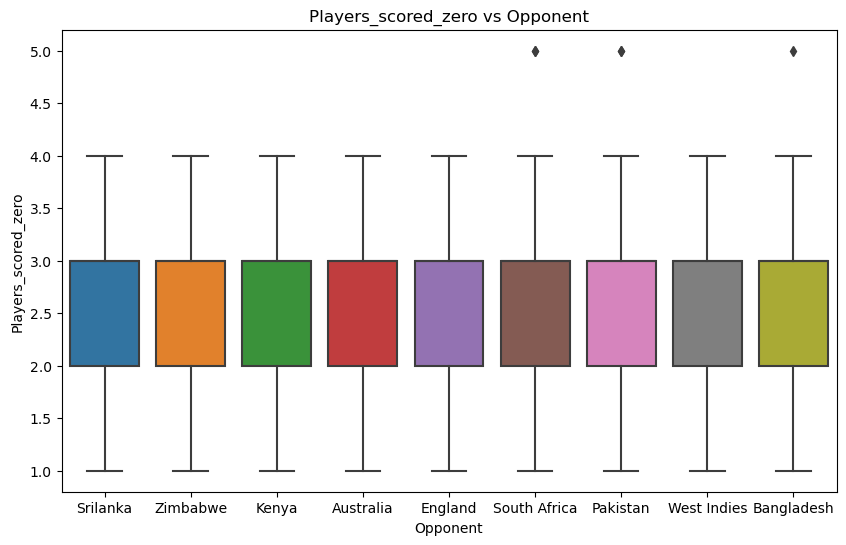

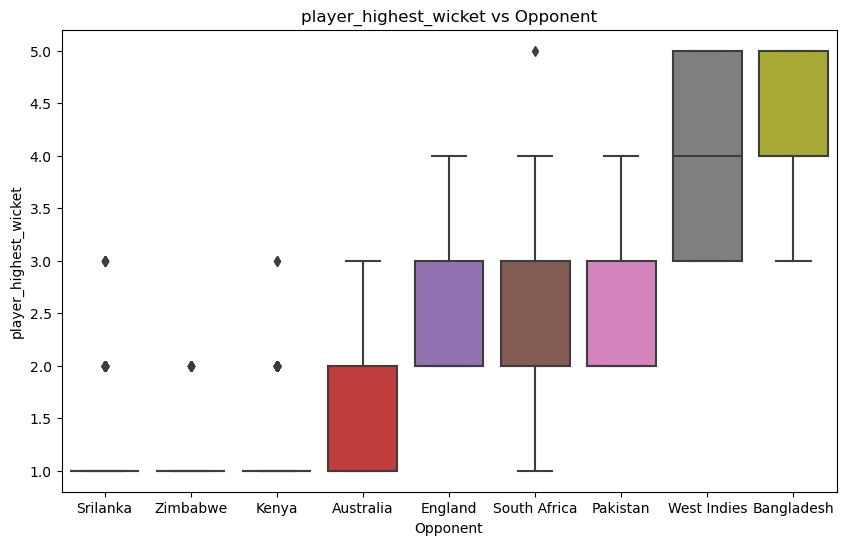

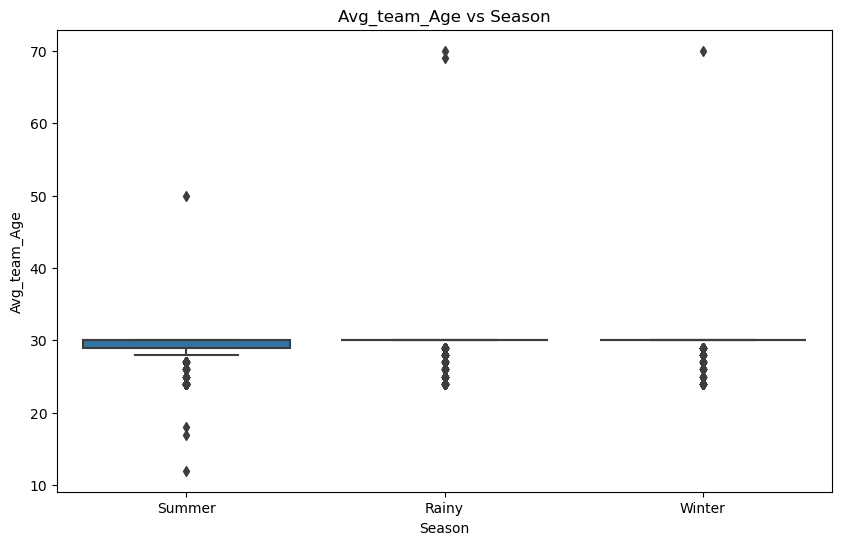

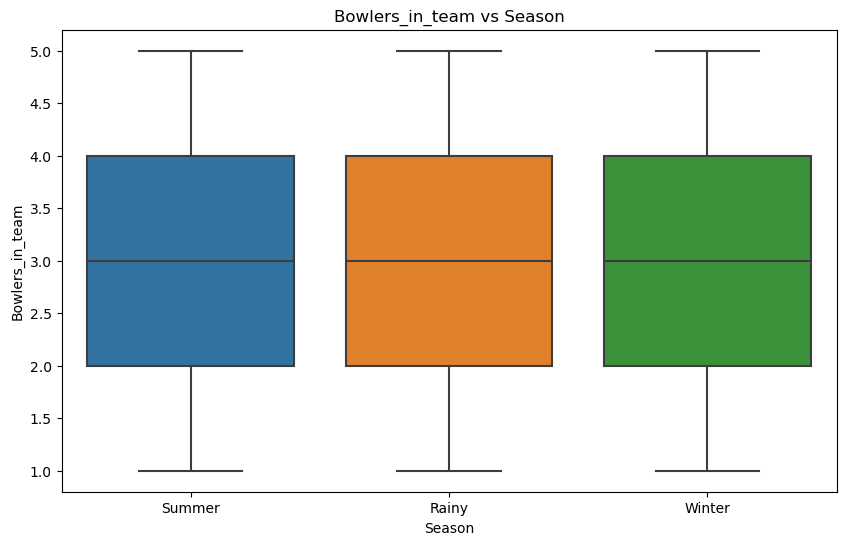

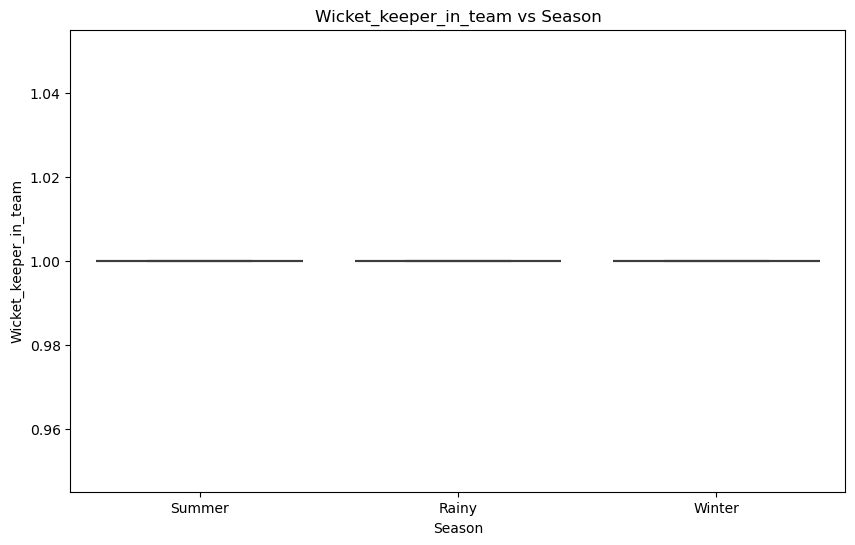

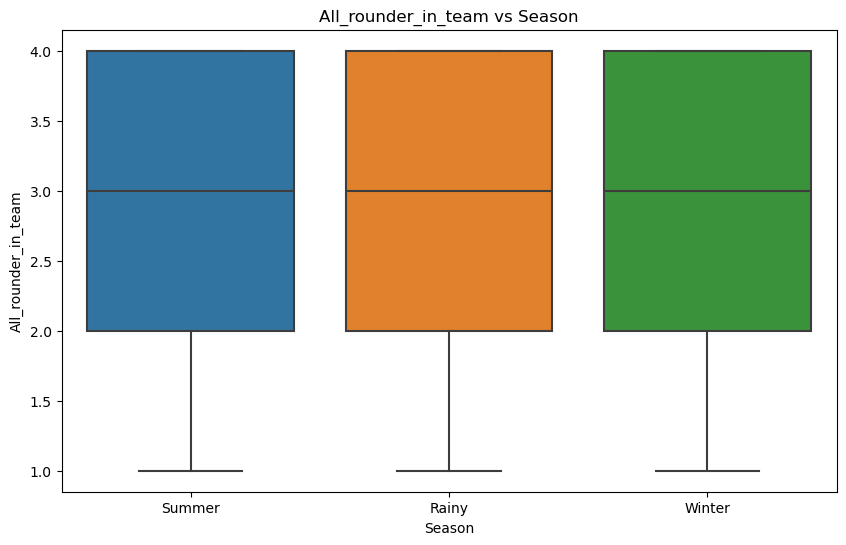

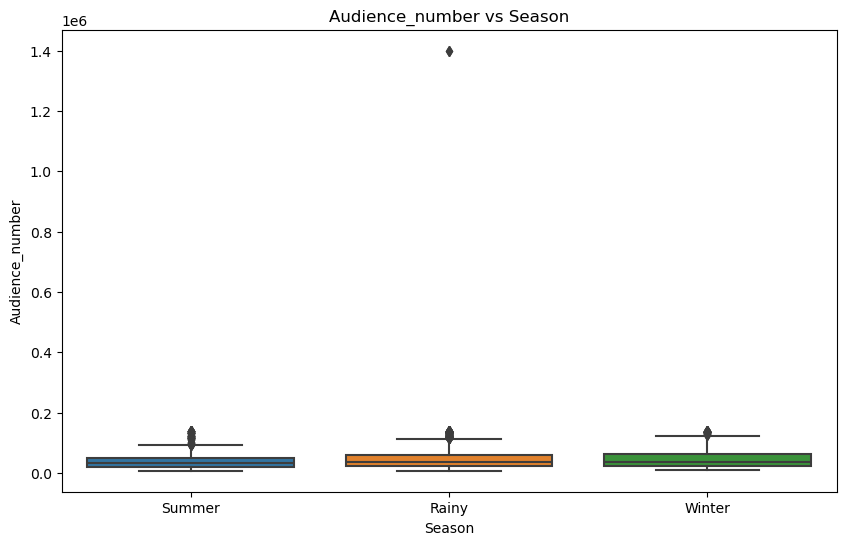

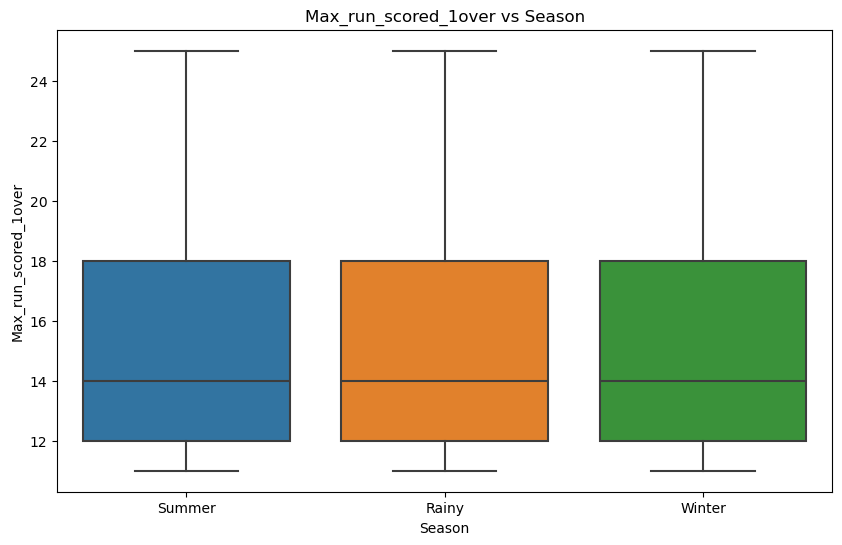

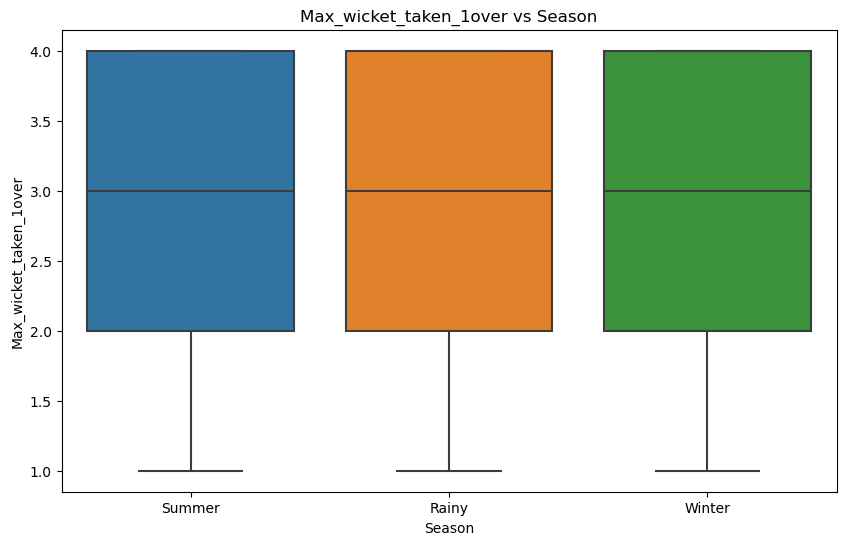

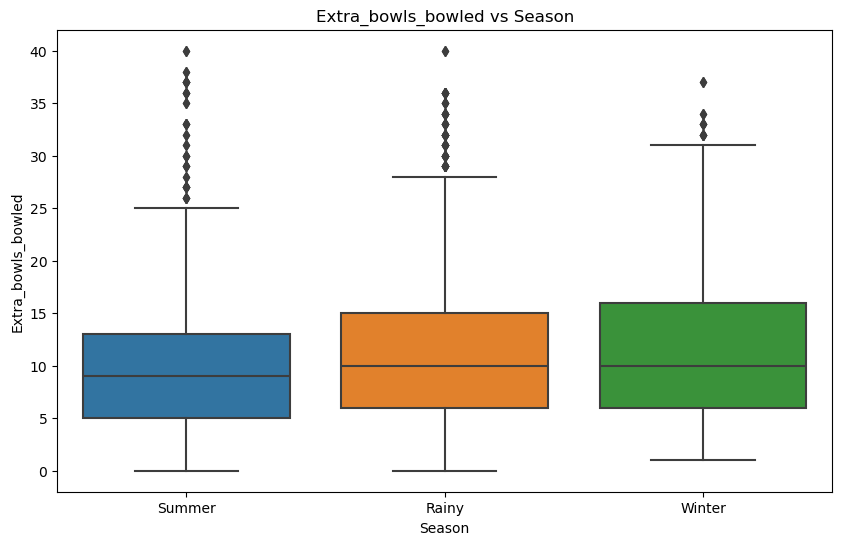

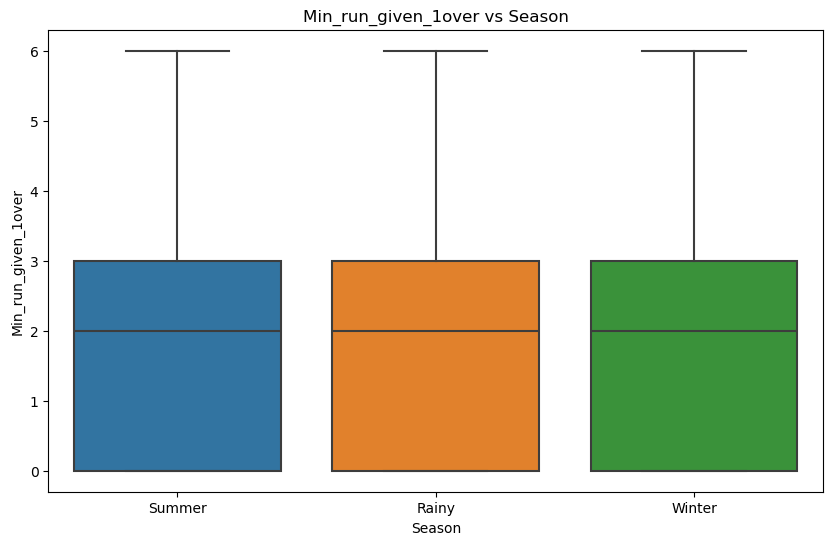

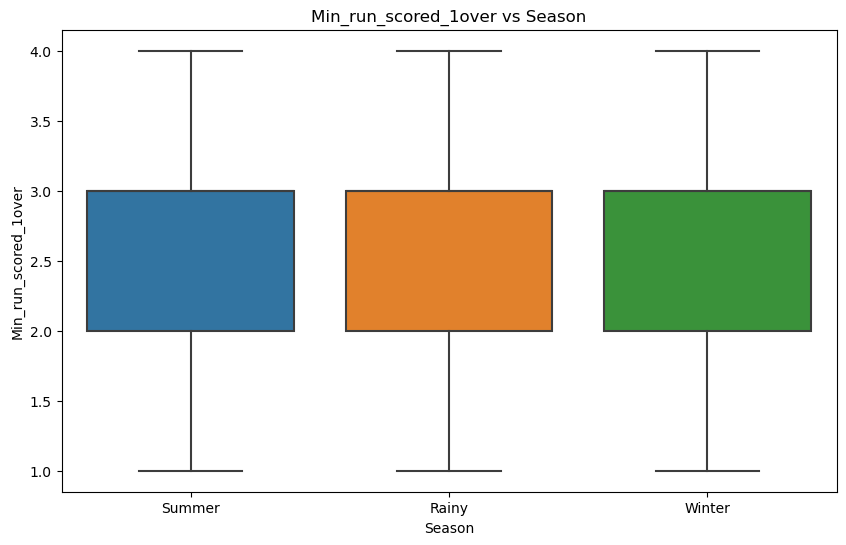

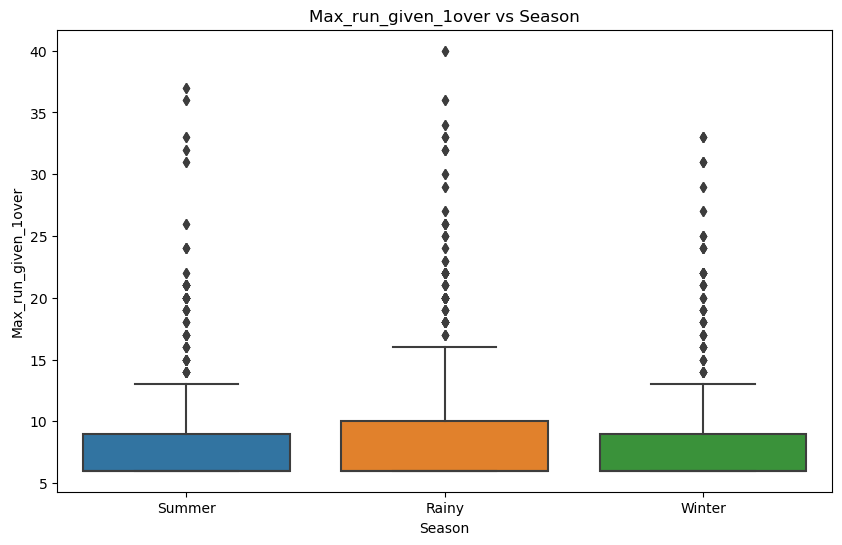

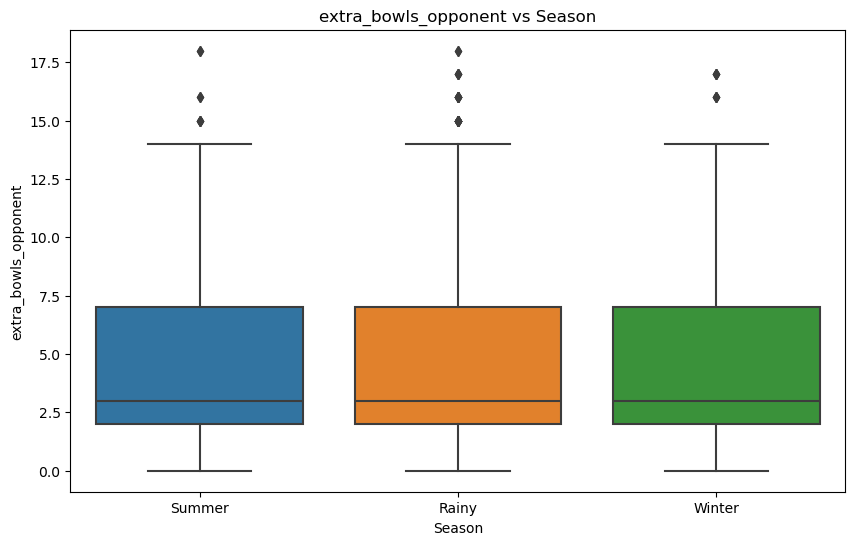

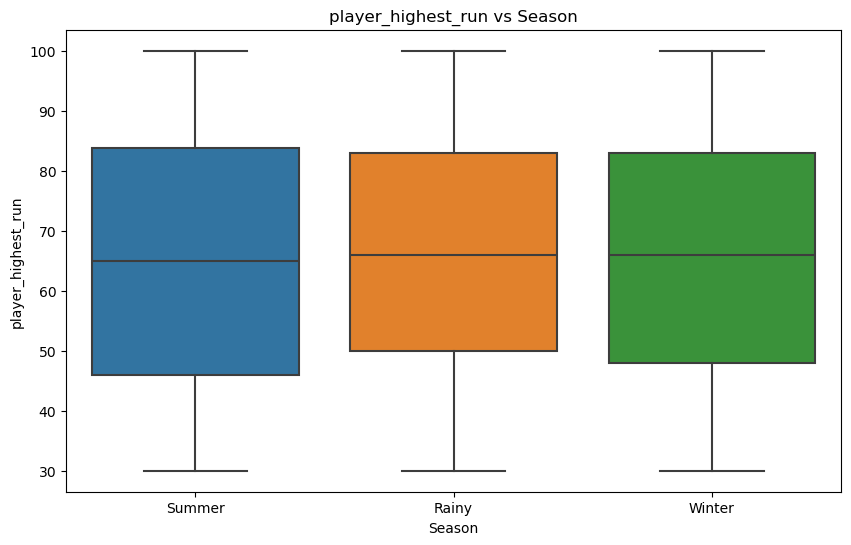

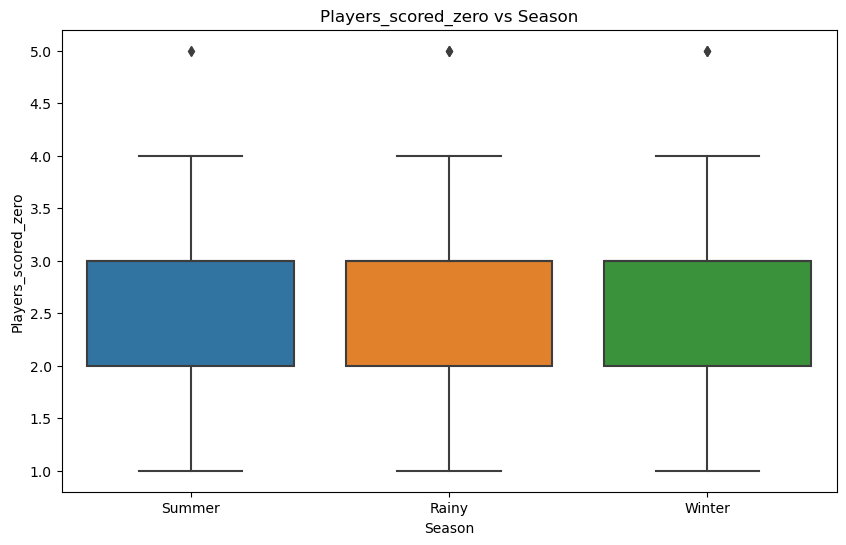

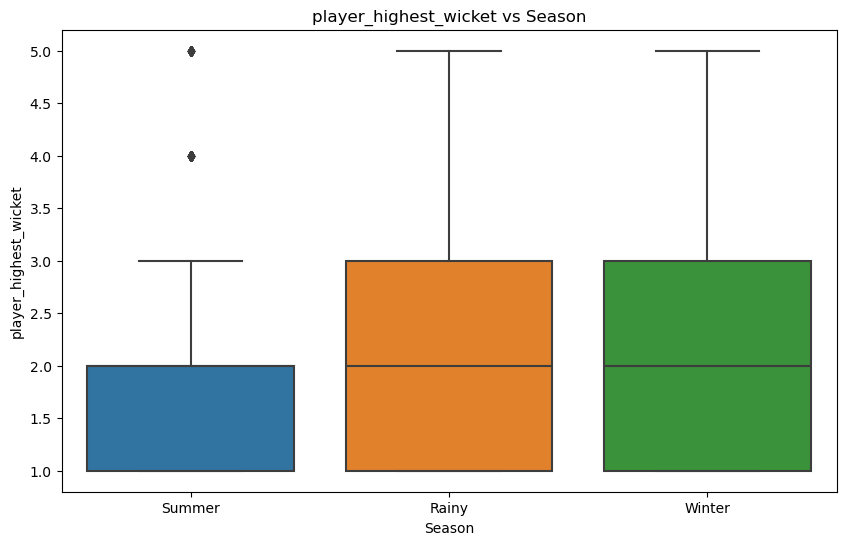

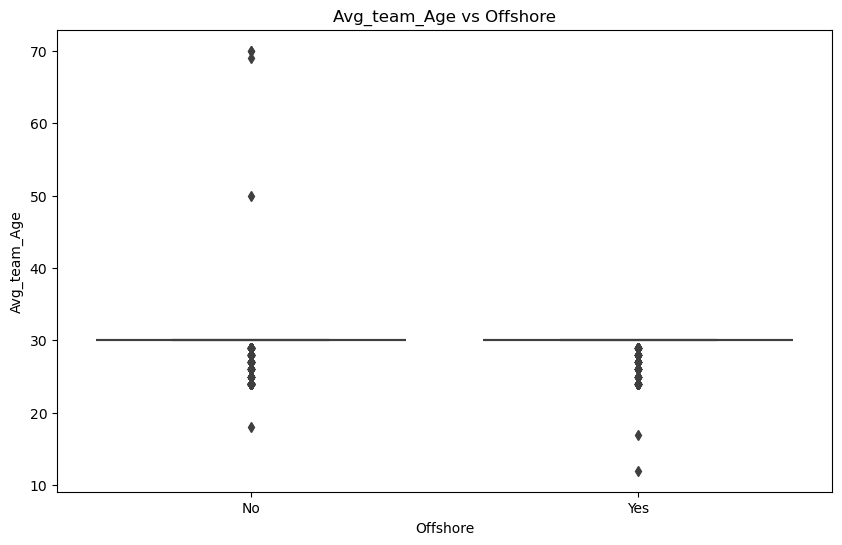

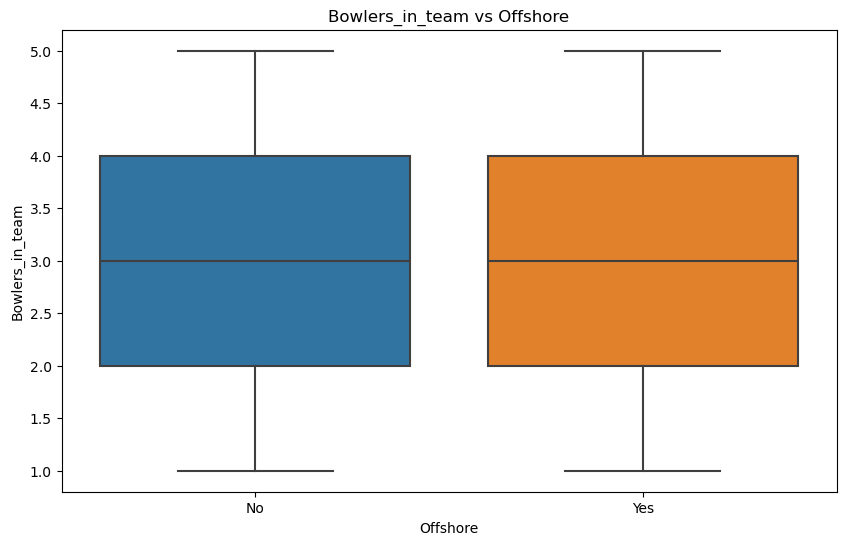

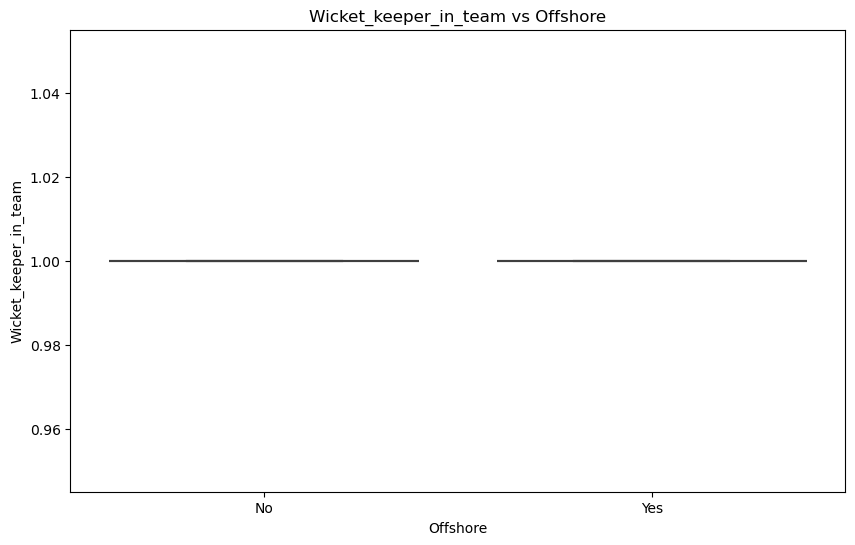

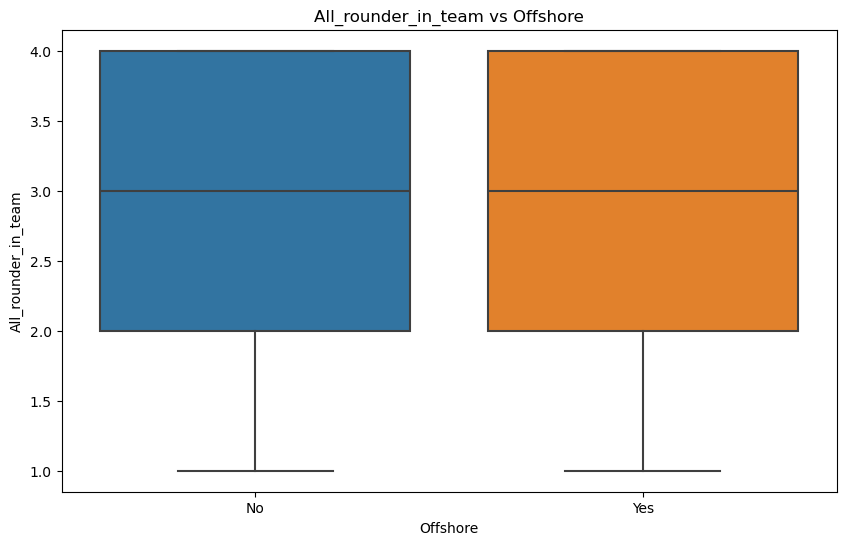

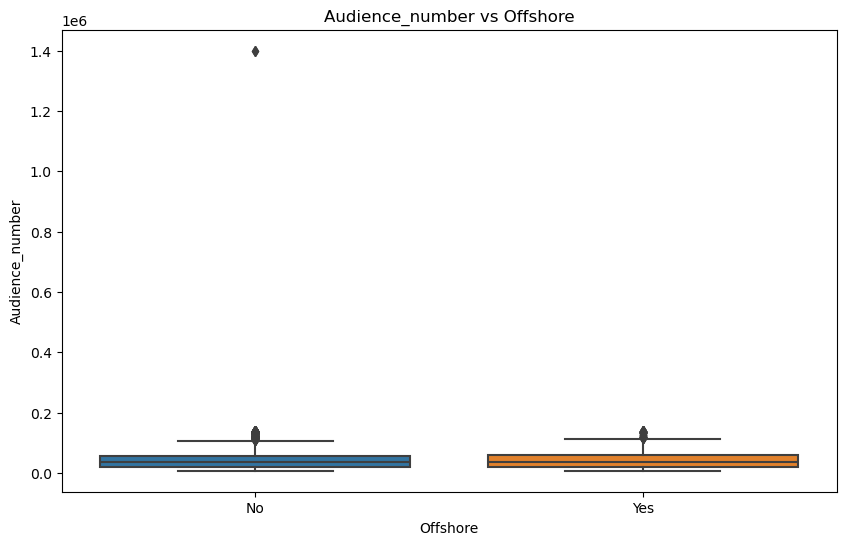

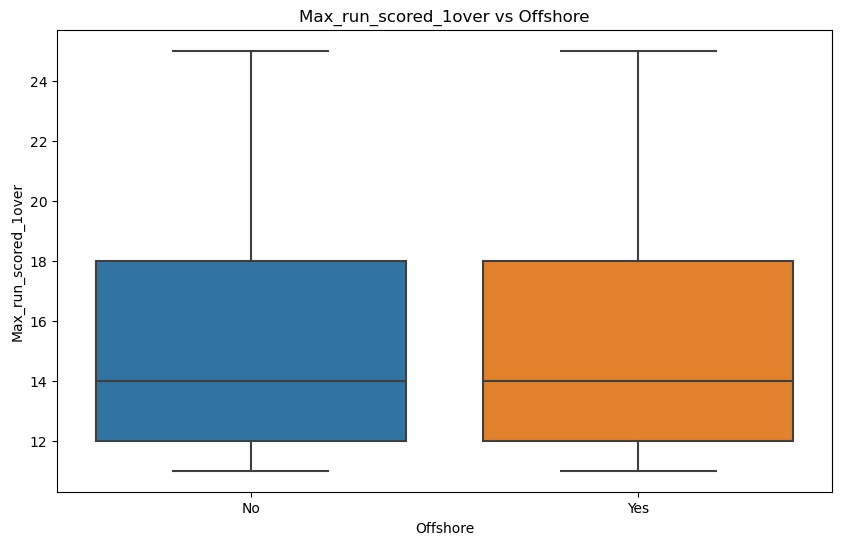

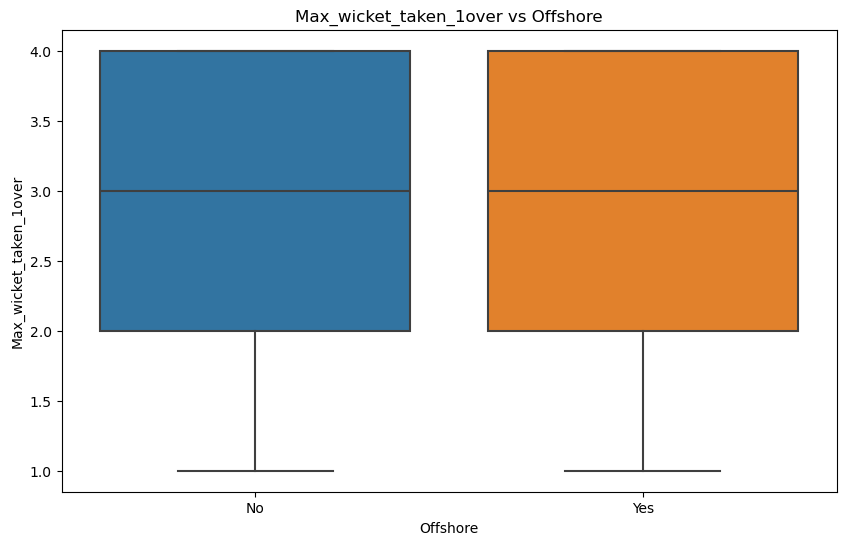

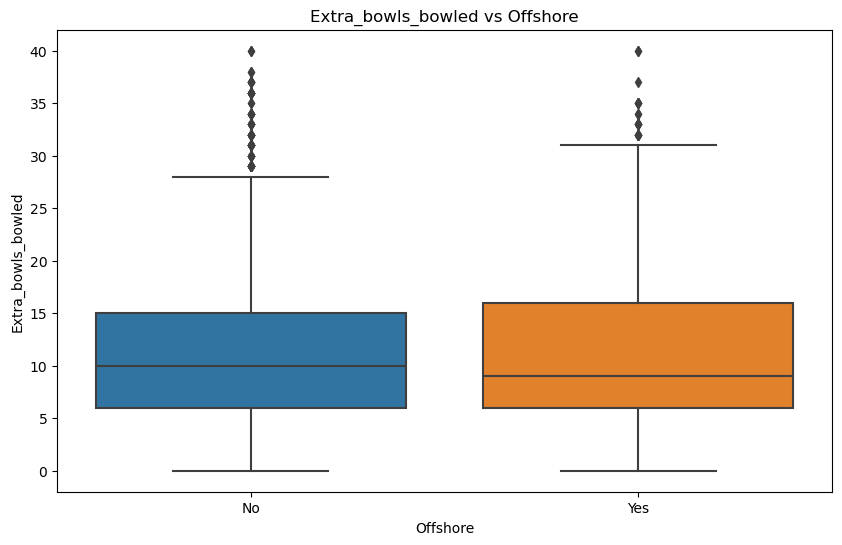

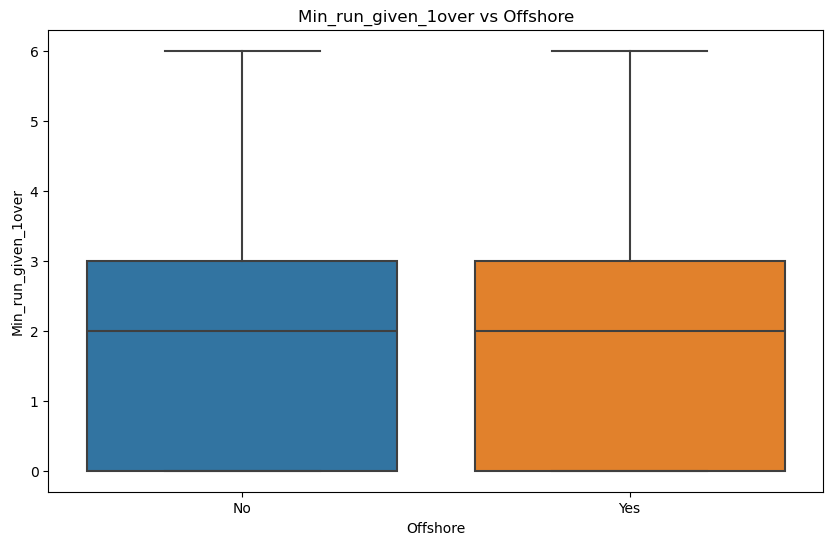

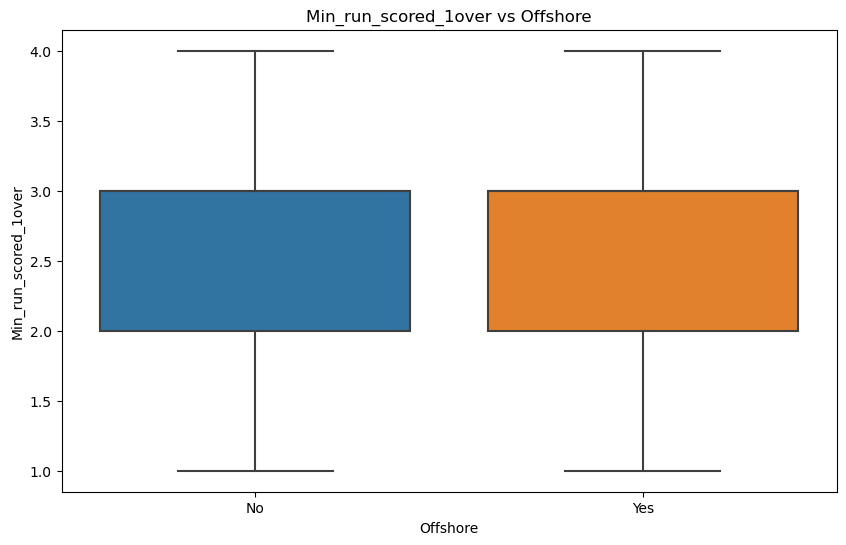

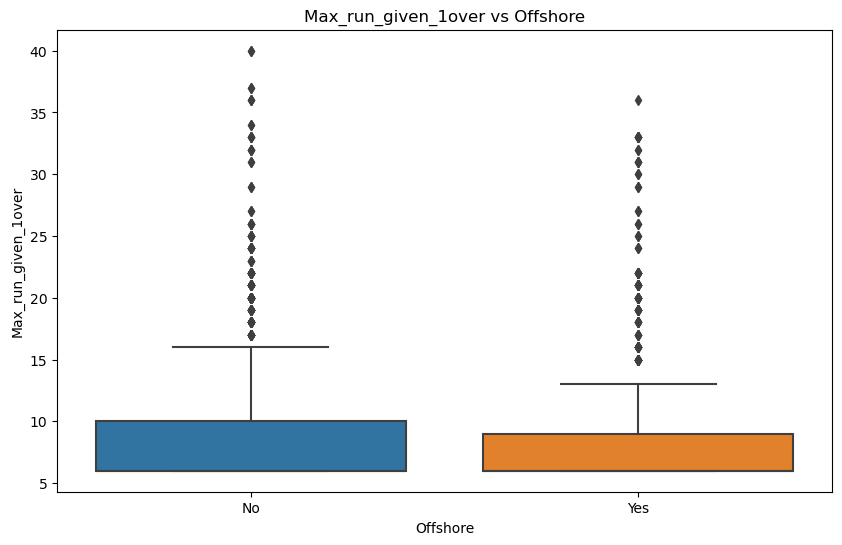

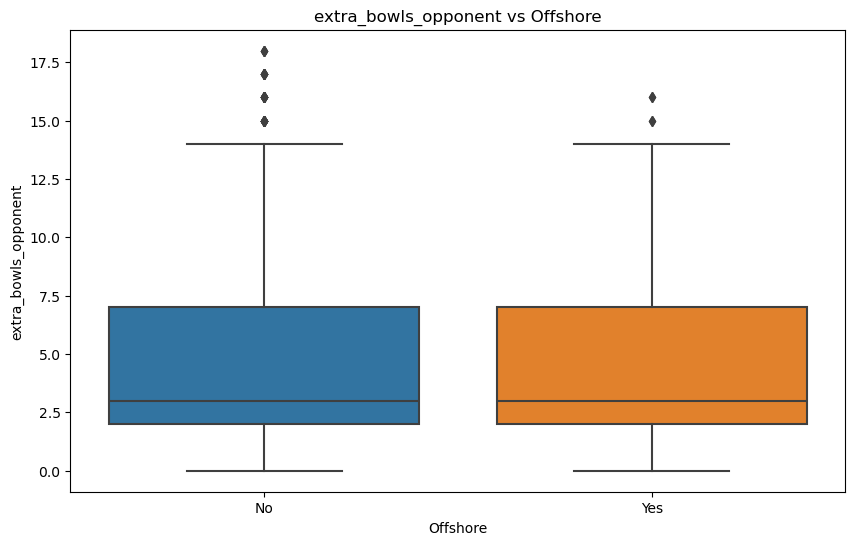

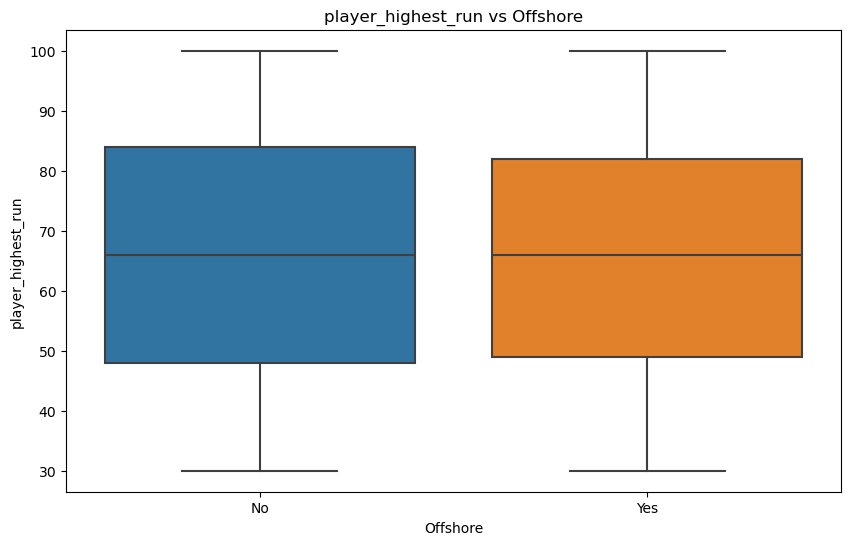

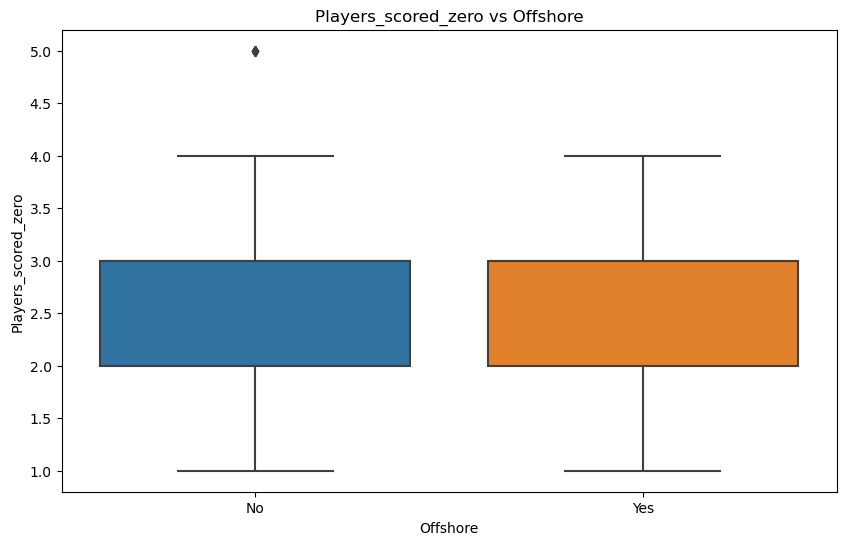

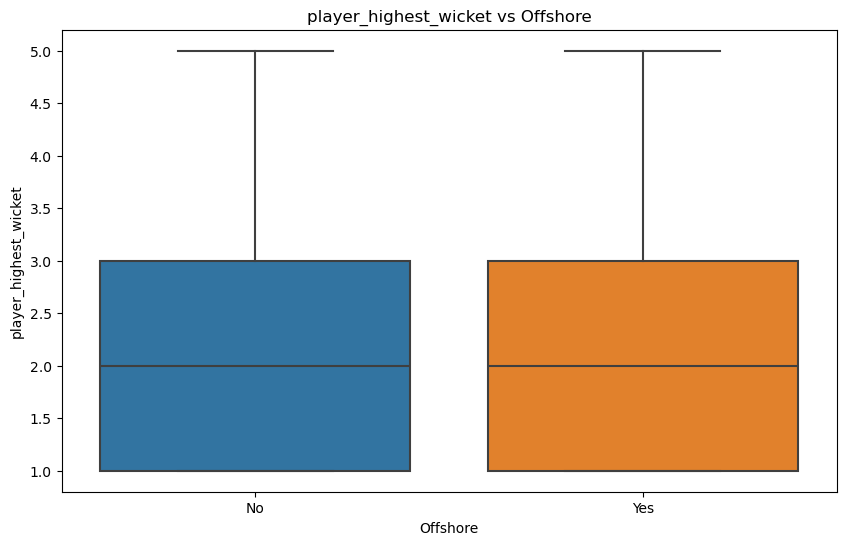

In [28]:
for cat_col in categorical_columns:
    for num_col in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=cric_data)
        plt.title(f'{num_col} vs {cat_col}')
        plt.show()

In [29]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(cric_cat[cat_column].value_counts())
    plt.figure()
    plt.figure(figsize=(12, 8))
    plots = cric_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.show()
    print("       ")

In [30]:
cric_cat = cric_data.select_dtypes(include = ['object'])
lstcatcolumns = list(cric_cat.columns.values)
lstcatcolumns

['Result',
 'Match_light_type',
 'Match_format',
 'First_selection',
 'Opponent',
 'Season',
 'Offshore']

Details of Result
----------------------------------------------------------------
Result
Win     2457
Loss     473
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

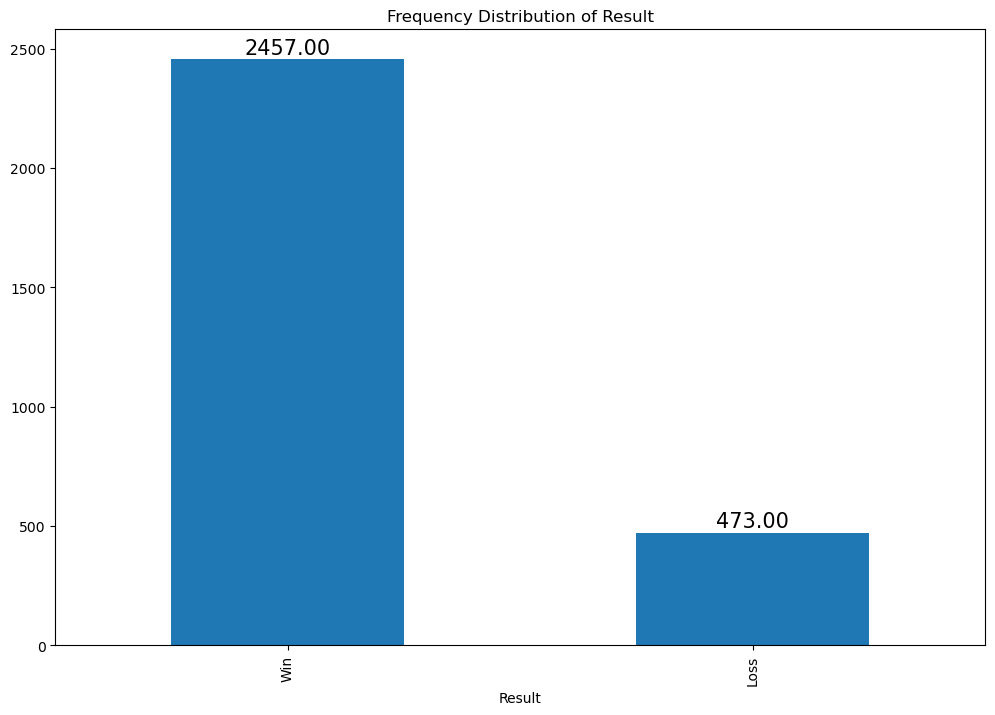

       
Details of Match_light_type
----------------------------------------------------------------
Match_light_type
Day              2093
Day and Night     541
Night             296
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

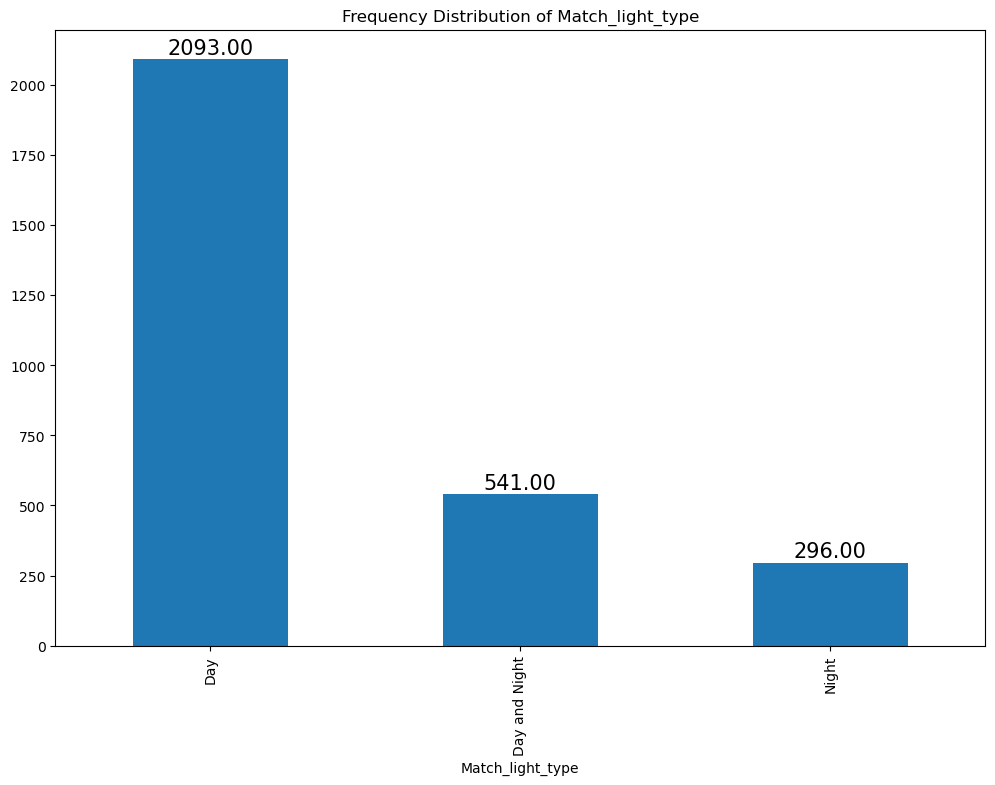

       
Details of Match_format
----------------------------------------------------------------
Match_format
ODI     1935
T20      870
Test     125
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

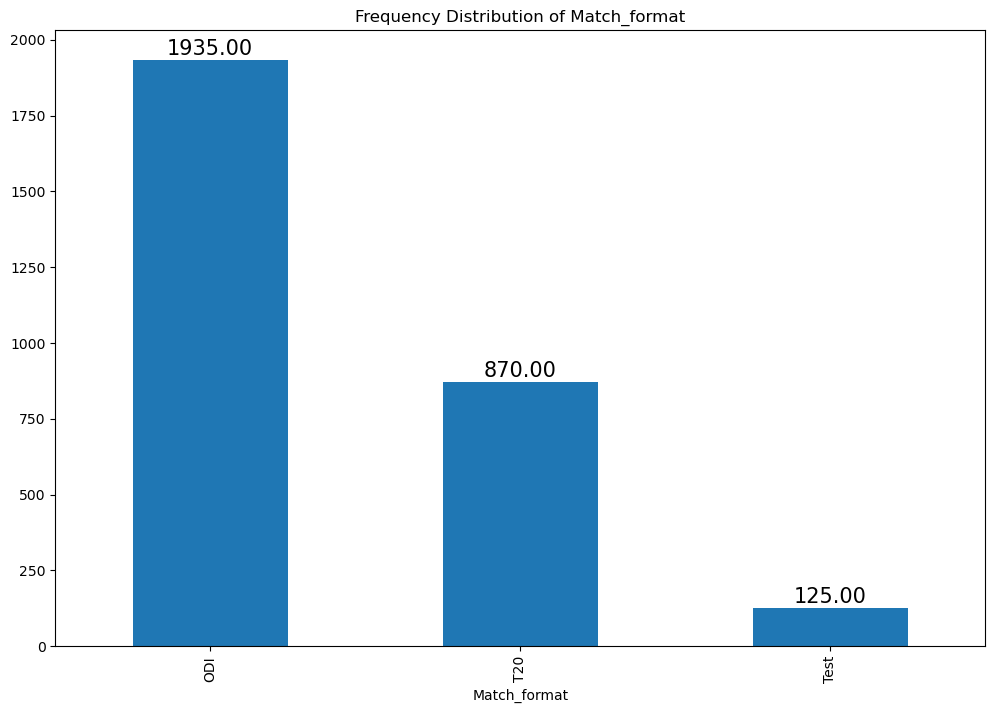

       
Details of First_selection
----------------------------------------------------------------
First_selection
Bowling    1781
Batting    1138
Bat          11
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

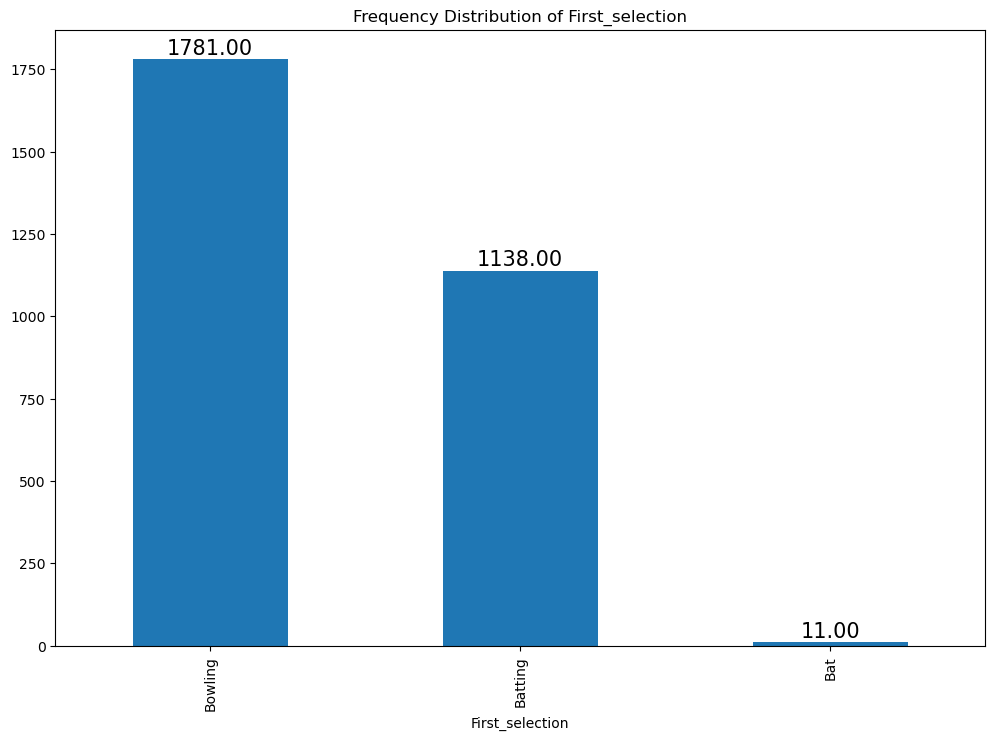

       
Details of Opponent
----------------------------------------------------------------
Opponent
South Africa    676
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

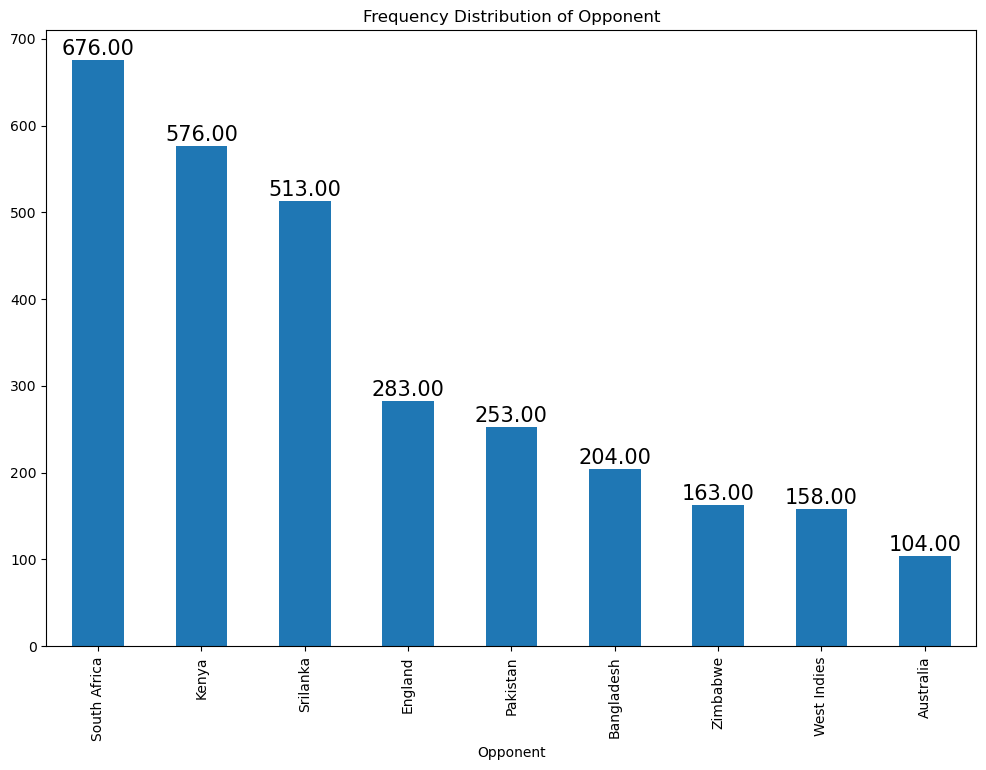

       
Details of Season
----------------------------------------------------------------
Season
Rainy     1371
Summer     918
Winter     641
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

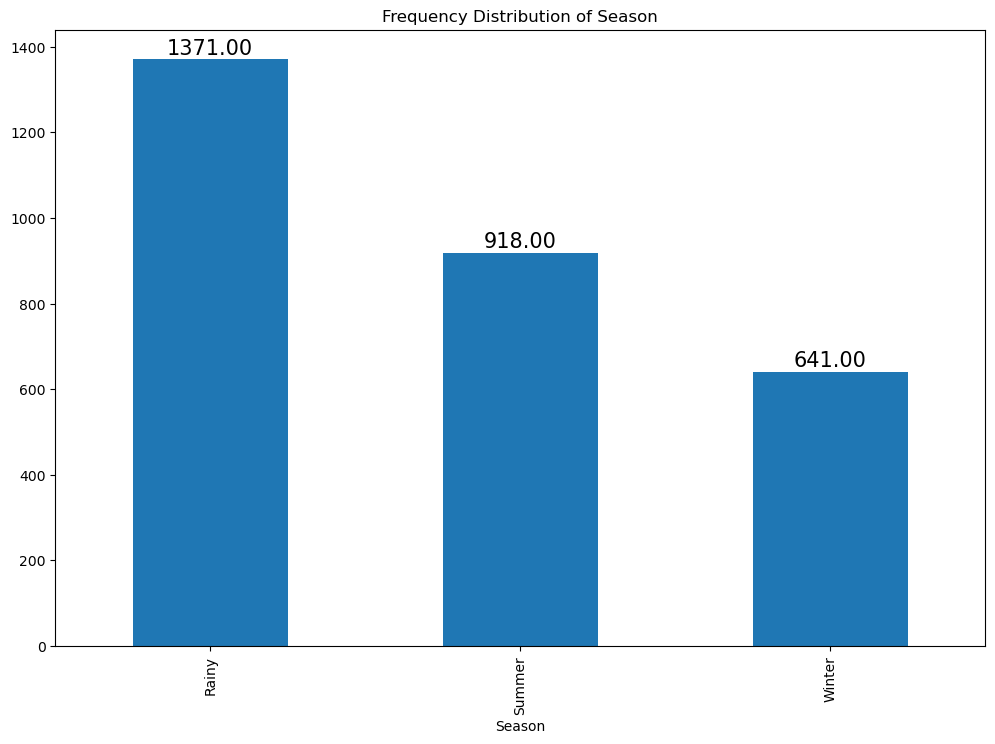

       
Details of Offshore
----------------------------------------------------------------
Offshore
No     2121
Yes     809
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

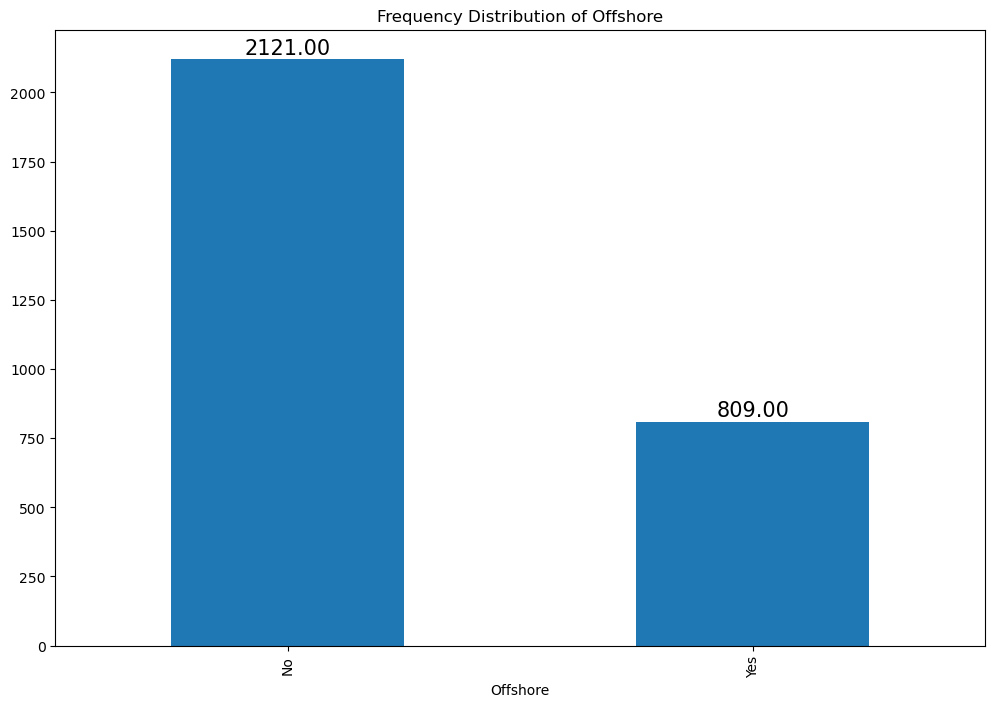

In [31]:
for x in lstcatcolumns:
    univariateAnalysis_category(x)

In [32]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(cric_data[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(cric_data[column].min())
    b=round(cric_data[column].max())
    freq, bins, patches = plt.hist(cric_data[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=cric_data[column])
    #ax.legend()
    plt.show()

In [33]:
data_num = cric_data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data_num.columns.values)
len(lstnumericcolumns)

15

In [34]:
type(lstnumericcolumns)

list

In [35]:
lstnumericcolumns

['Avg_team_Age',
 'Bowlers_in_team',
 'Wicket_keeper_in_team',
 'All_rounder_in_team',
 'Audience_number',
 'Max_run_scored_1over',
 'Max_wicket_taken_1over',
 'Extra_bowls_bowled',
 'Min_run_given_1over',
 'Min_run_scored_1over',
 'Max_run_given_1over',
 'extra_bowls_opponent',
 'player_highest_run',
 'Players_scored_zero',
 'player_highest_wicket']

In [36]:
data_num.head()

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Game_number                                                         
Game_1               18.0              3.0                      1   
Game_2               24.0              3.0                      1   
Game_3               24.0              3.0                      1   
Game_4               24.0              2.0                      1   
Game_5               24.0              1.0                      1   

             All_rounder_in_team  Audience_number  Max_run_scored_1over  \
Game_number                                                               
Game_1                       3.0           9940.0                  13.0   
Game_2                       4.0           8400.0                  12.0   
Game_3                       2.0          13146.0                  14.0   
Game_4                       2.0           7357.0                  15.0   
Game_5                       3.0          13328.0                  12.0   

             Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                    
Game_1                            3                 0.0                    2   
Game_2                            1                 0.0                    0   
Game_3                            4                 0.0                    0   
Game_4                            4                 0.0                    2   
Game_5                            4                 0.0                    0   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                        3.0                  6.0                     0   
Game_2                        3.0                  6.0                     0   
Game_3                        3.0                  6.0                     0   
Game_4                        3.0                  6.0                     0   
Game_5                        3.0                  6.0                     0   

             player_highest_run  Players_scored_zero  player_highest_wicket  
Game_number                                                                  
Game_1                     54.0                  3.0                    1.0  
Game_2                     69.0                  2.0                    1.0  
Game_3                     69.0                  3.0                    1.0  
Game_4                     73.0                  3.0                    1.0  
Game_5                     80.0                  3.0                    1.0

Description of Avg_team_Age
----------------------------------------------------------------------------
count    2930.000000
mean       29.267918
std         2.230540
min        12.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: Avg_team_Age, dtype: float64 Distribution of Avg_team_Age
----------------------------------------------------------------------------
BoxPlot of Avg_team_Age
----------------------------------------------------------------------------


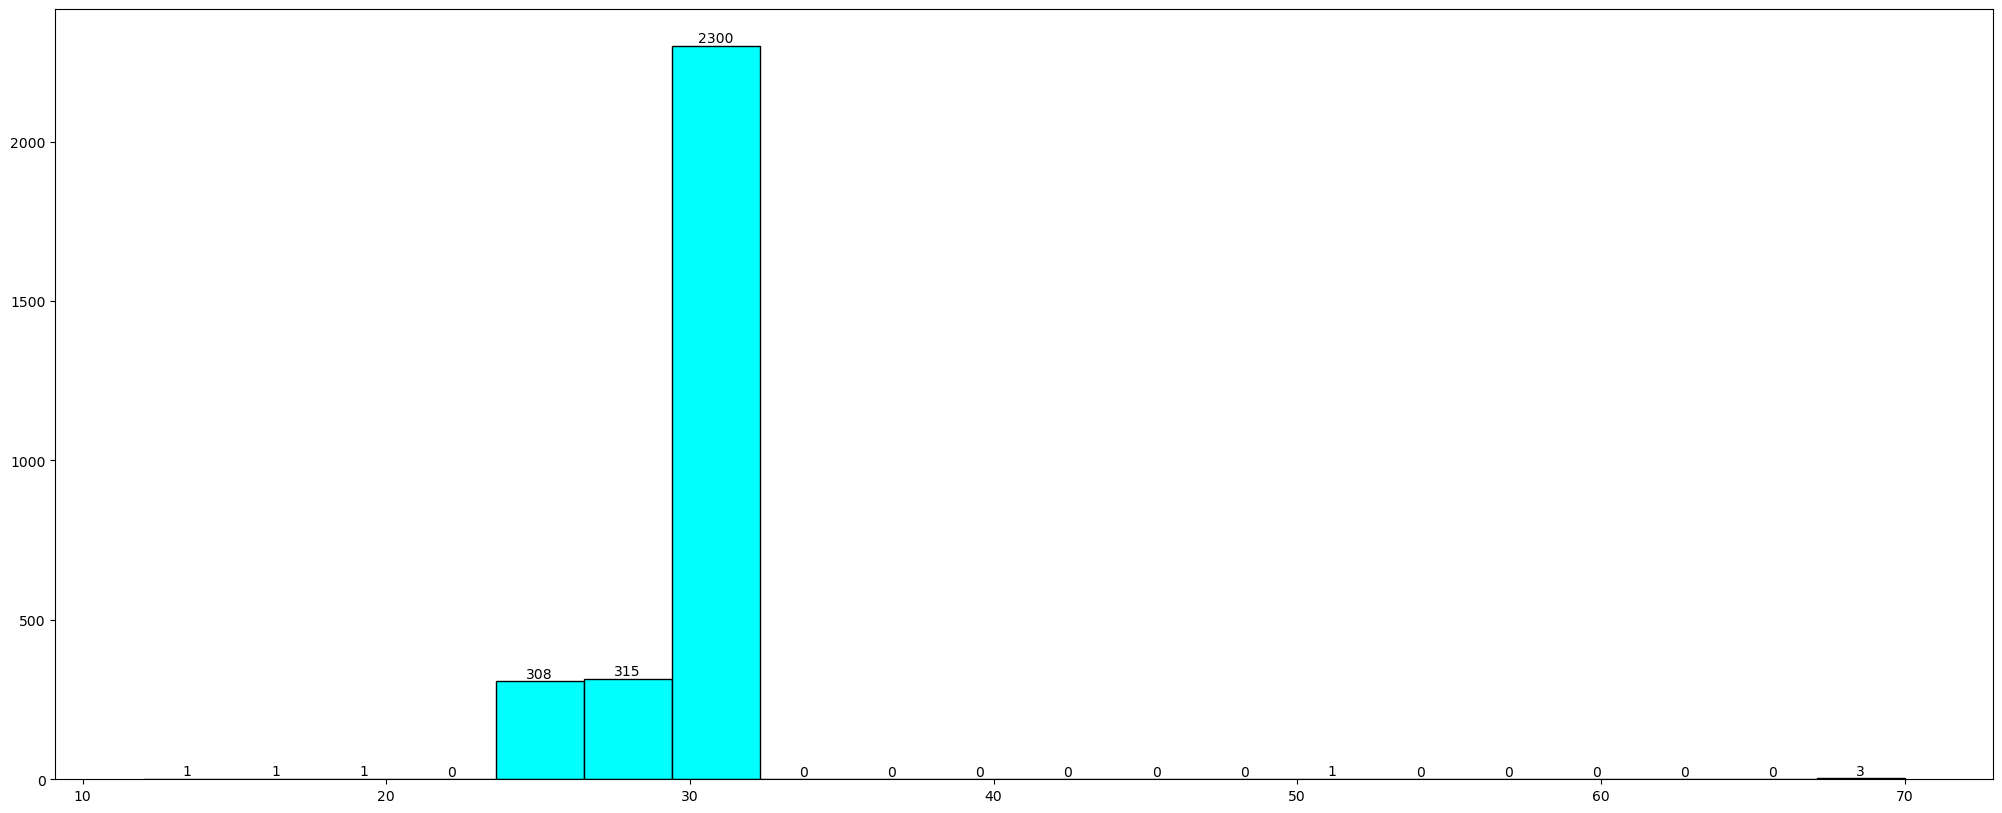

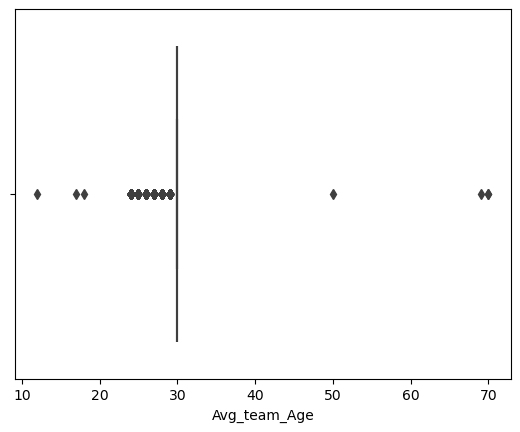

Description of Bowlers_in_team
----------------------------------------------------------------------------
count    2930.000000
mean        2.916041
std         1.009573
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Bowlers_in_team, dtype: float64 Distribution of Bowlers_in_team
----------------------------------------------------------------------------
BoxPlot of Bowlers_in_team
----------------------------------------------------------------------------


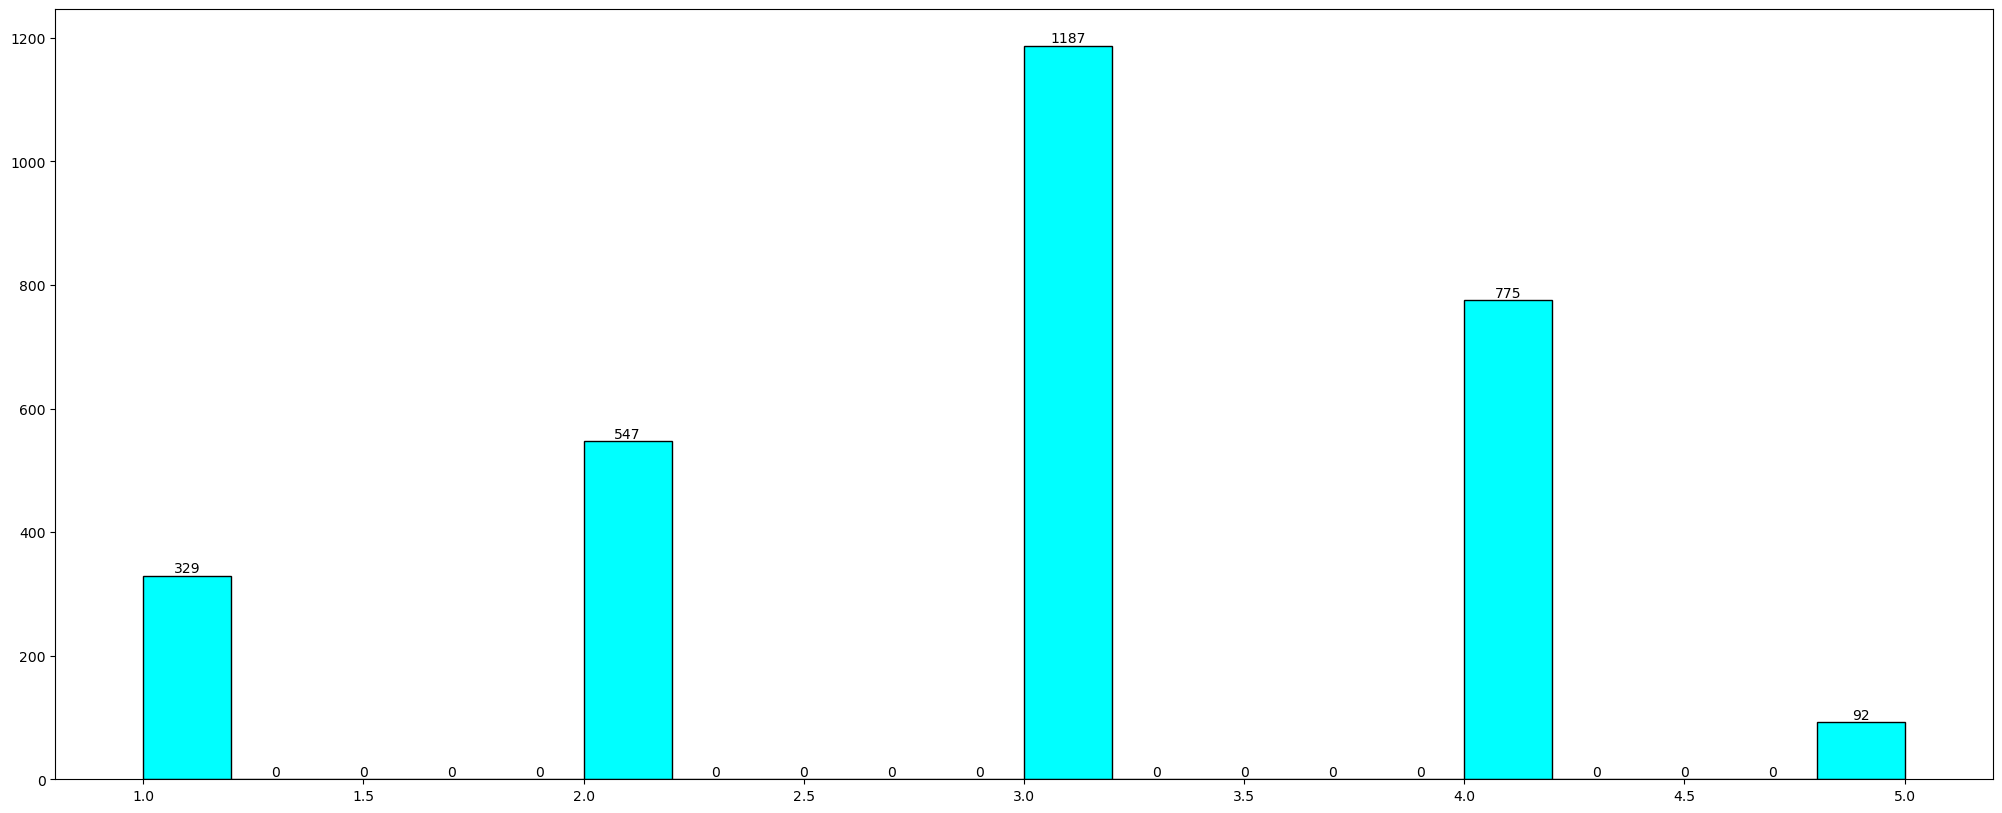

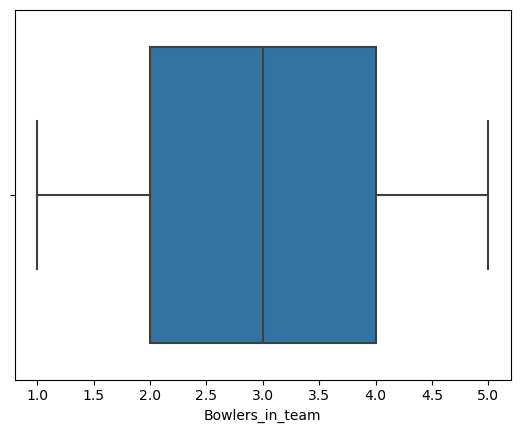

Description of Wicket_keeper_in_team
----------------------------------------------------------------------------
count    2930.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Wicket_keeper_in_team, dtype: float64 Distribution of Wicket_keeper_in_team
----------------------------------------------------------------------------
BoxPlot of Wicket_keeper_in_team
----------------------------------------------------------------------------


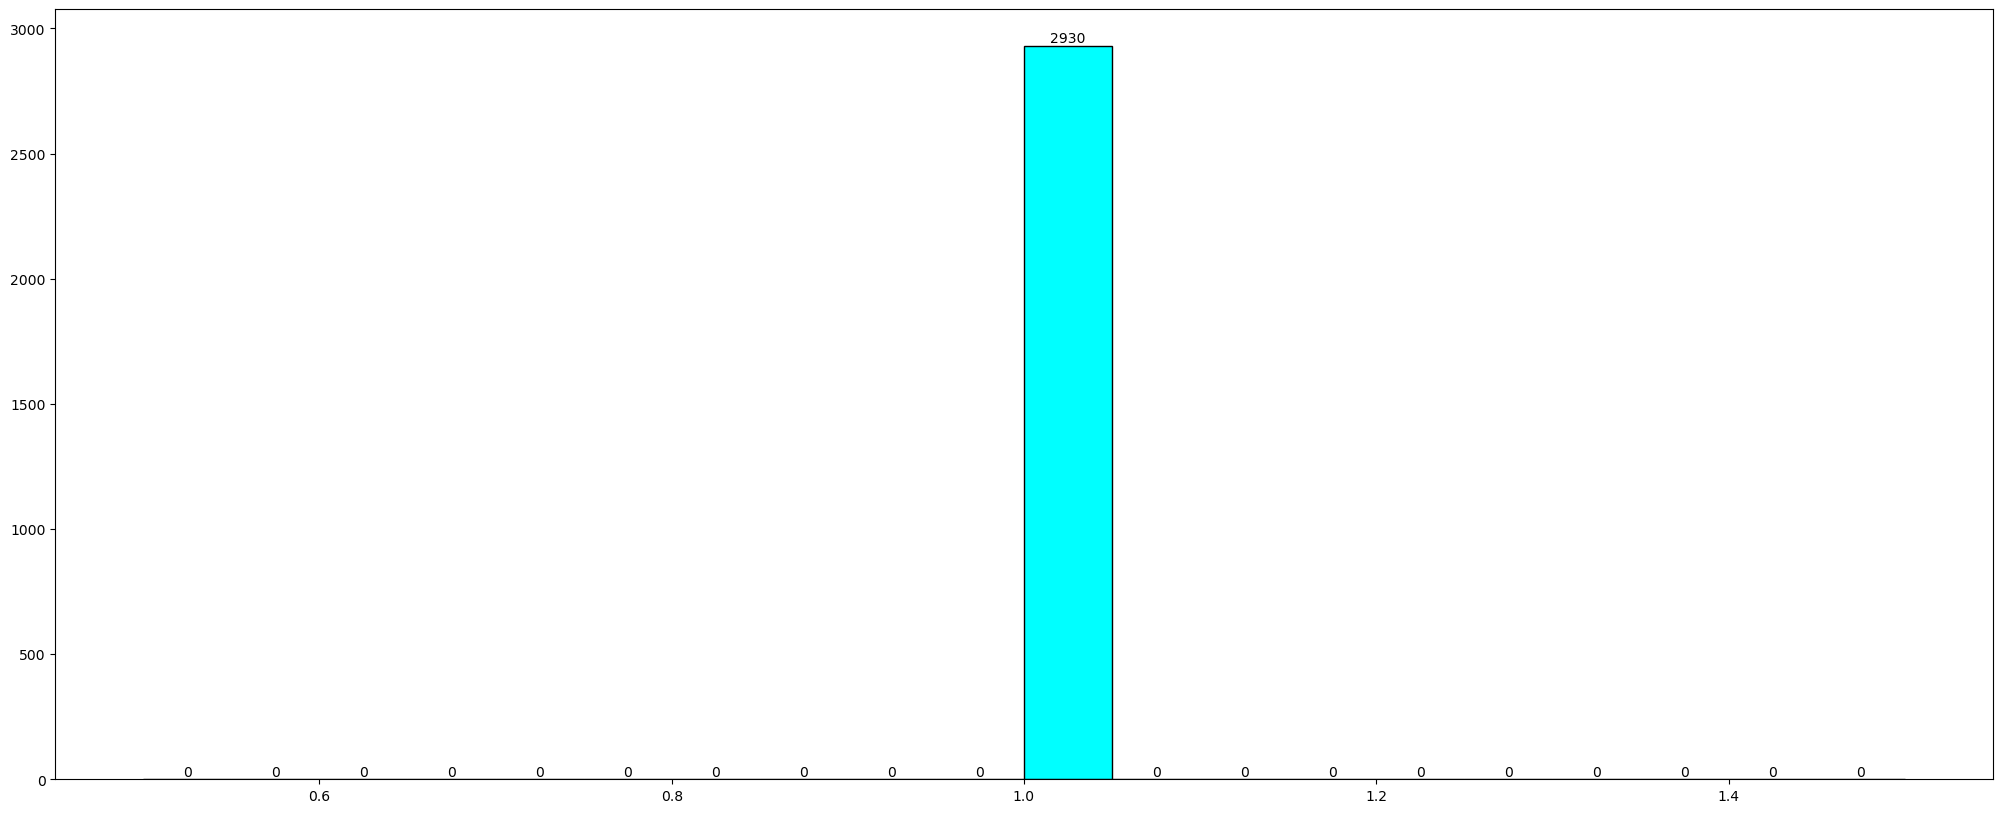

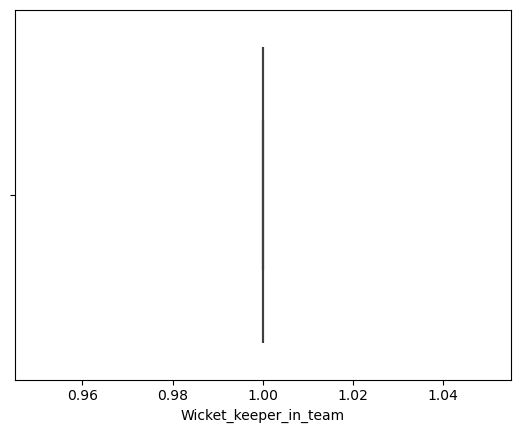

Description of All_rounder_in_team
----------------------------------------------------------------------------
count    2930.00000
mean        2.72628
std         1.08569
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         4.00000
Name: All_rounder_in_team, dtype: float64 Distribution of All_rounder_in_team
----------------------------------------------------------------------------
BoxPlot of All_rounder_in_team
----------------------------------------------------------------------------


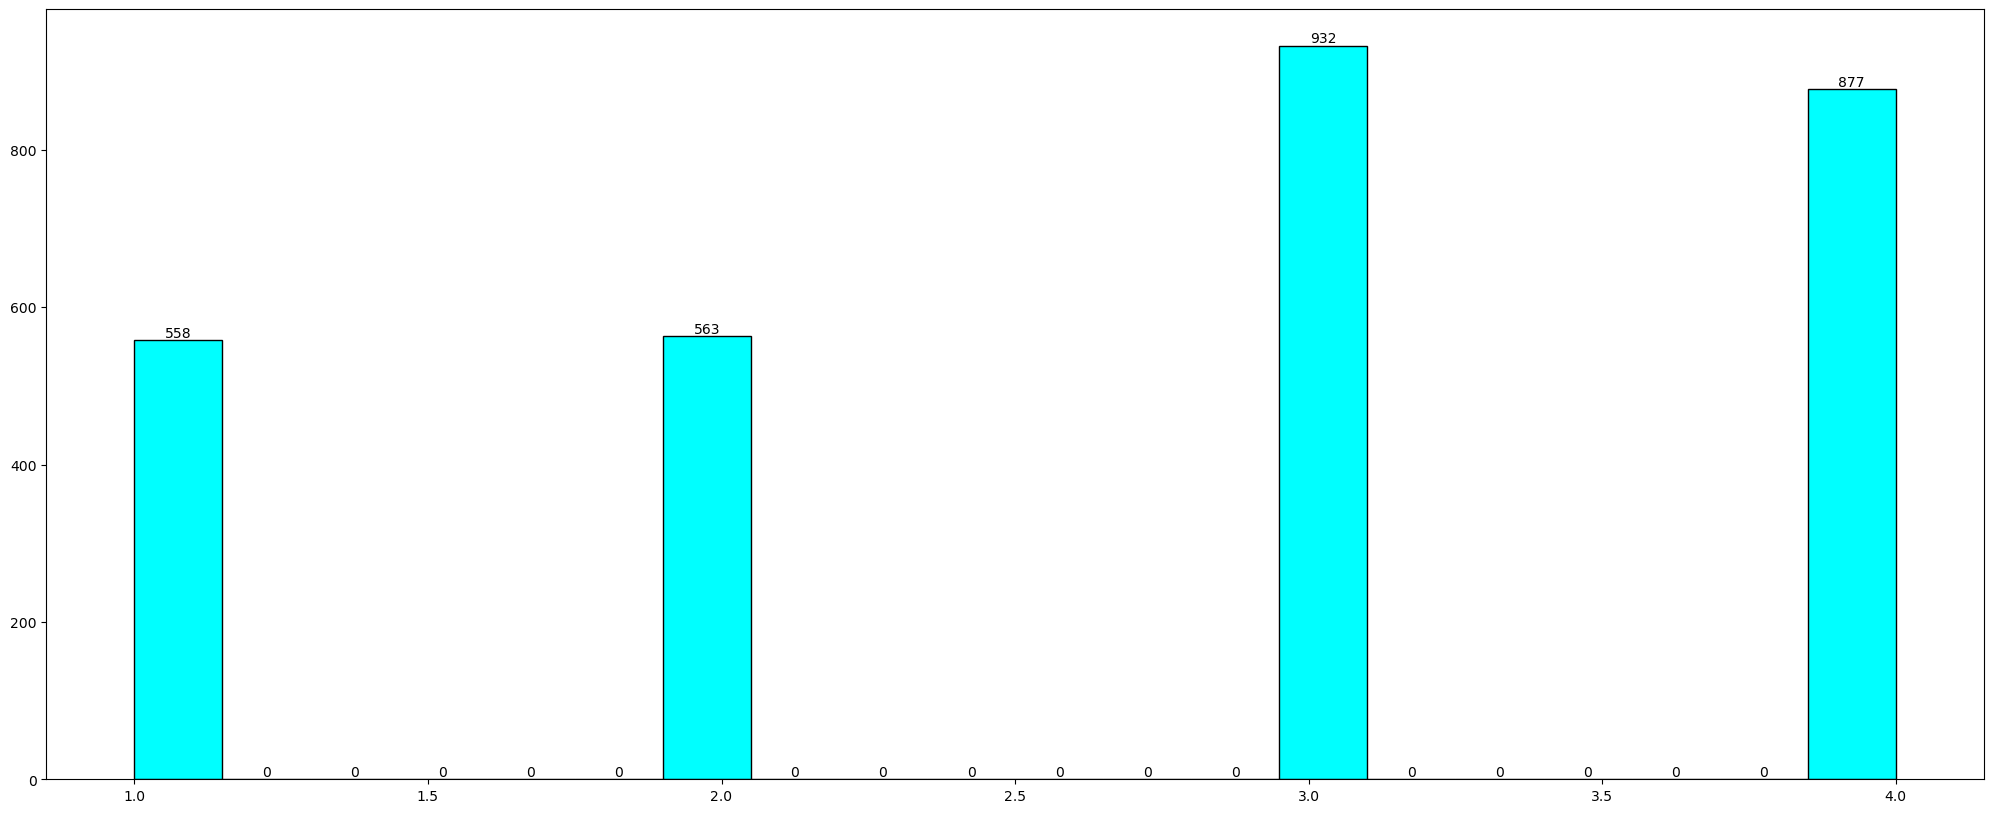

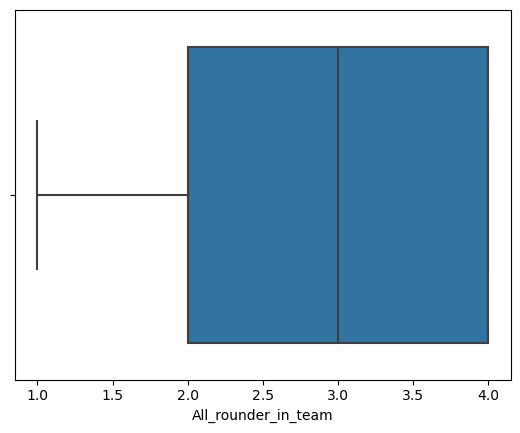

Description of Audience_number
----------------------------------------------------------------------------
count    2.930000e+03
mean     4.593846e+04
std      4.796271e+04
min      7.063000e+03
25%      2.060800e+04
50%      3.434900e+04
75%      5.593175e+04
max      1.399930e+06
Name: Audience_number, dtype: float64 Distribution of Audience_number
----------------------------------------------------------------------------
BoxPlot of Audience_number
----------------------------------------------------------------------------


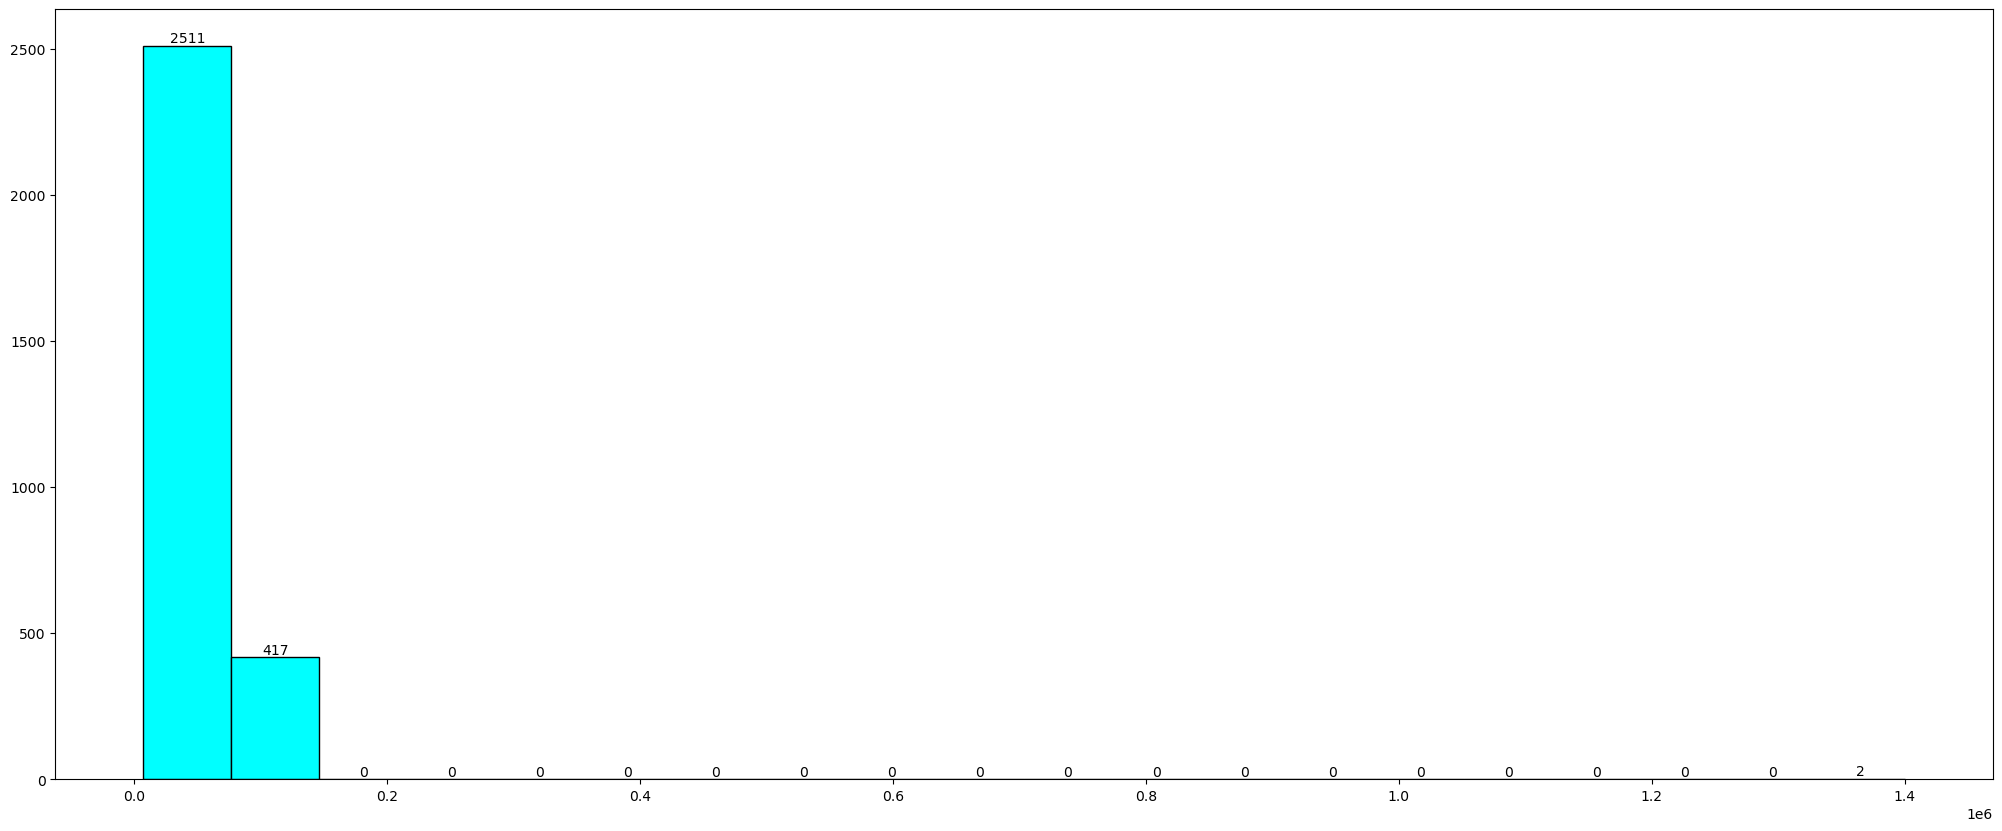

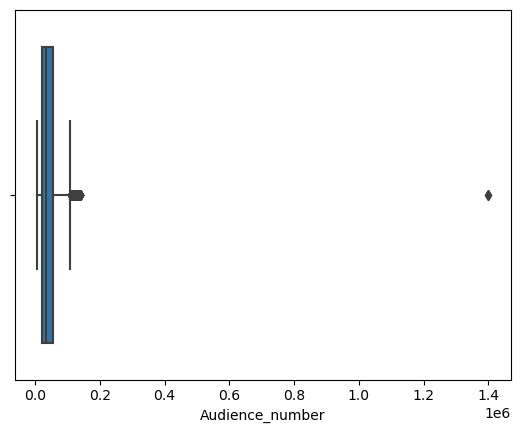

Description of Max_run_scored_1over
----------------------------------------------------------------------------
count    2930.000000
mean       15.188396
std         3.645339
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: Max_run_scored_1over, dtype: float64 Distribution of Max_run_scored_1over
----------------------------------------------------------------------------
BoxPlot of Max_run_scored_1over
----------------------------------------------------------------------------


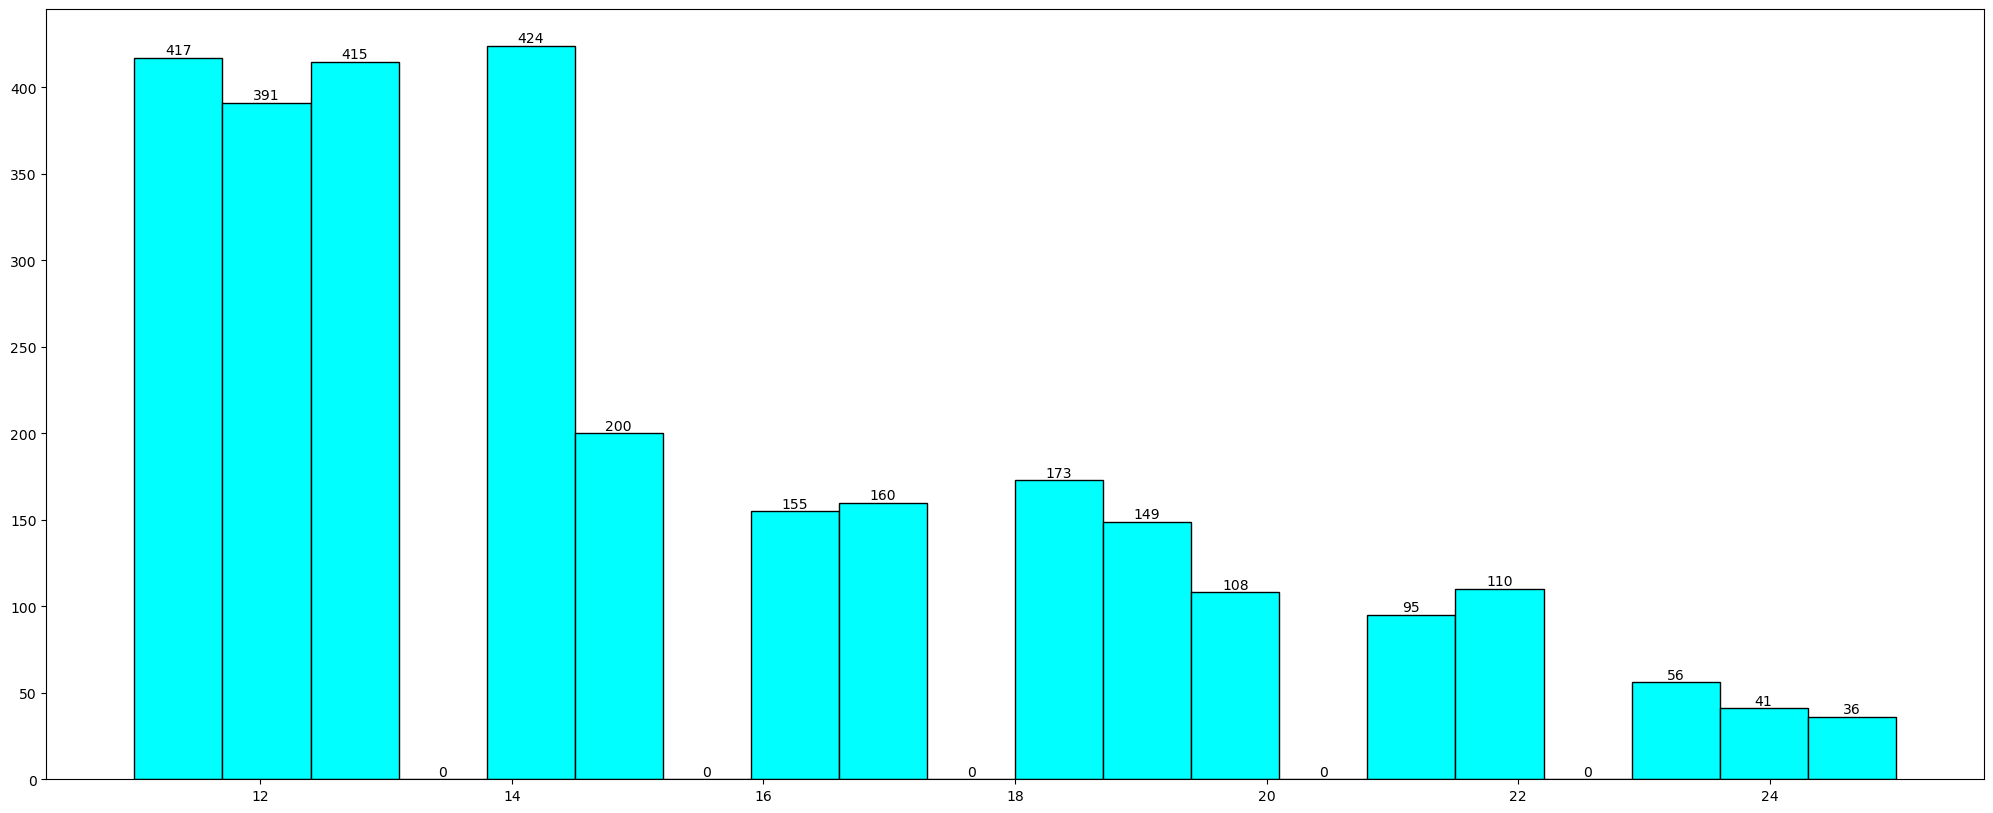

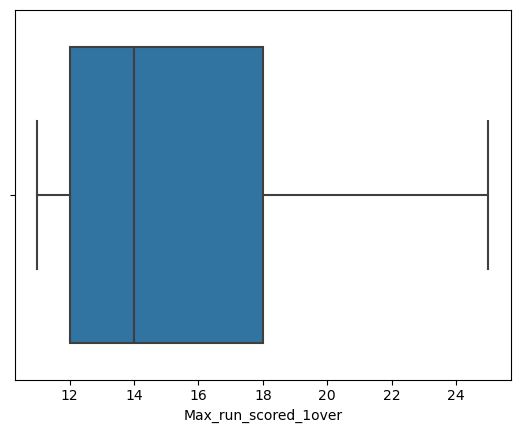

Description of Max_wicket_taken_1over
----------------------------------------------------------------------------
count    2930.000000
mean        2.713993
std         1.080623
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Max_wicket_taken_1over, dtype: float64 Distribution of Max_wicket_taken_1over
----------------------------------------------------------------------------
BoxPlot of Max_wicket_taken_1over
----------------------------------------------------------------------------


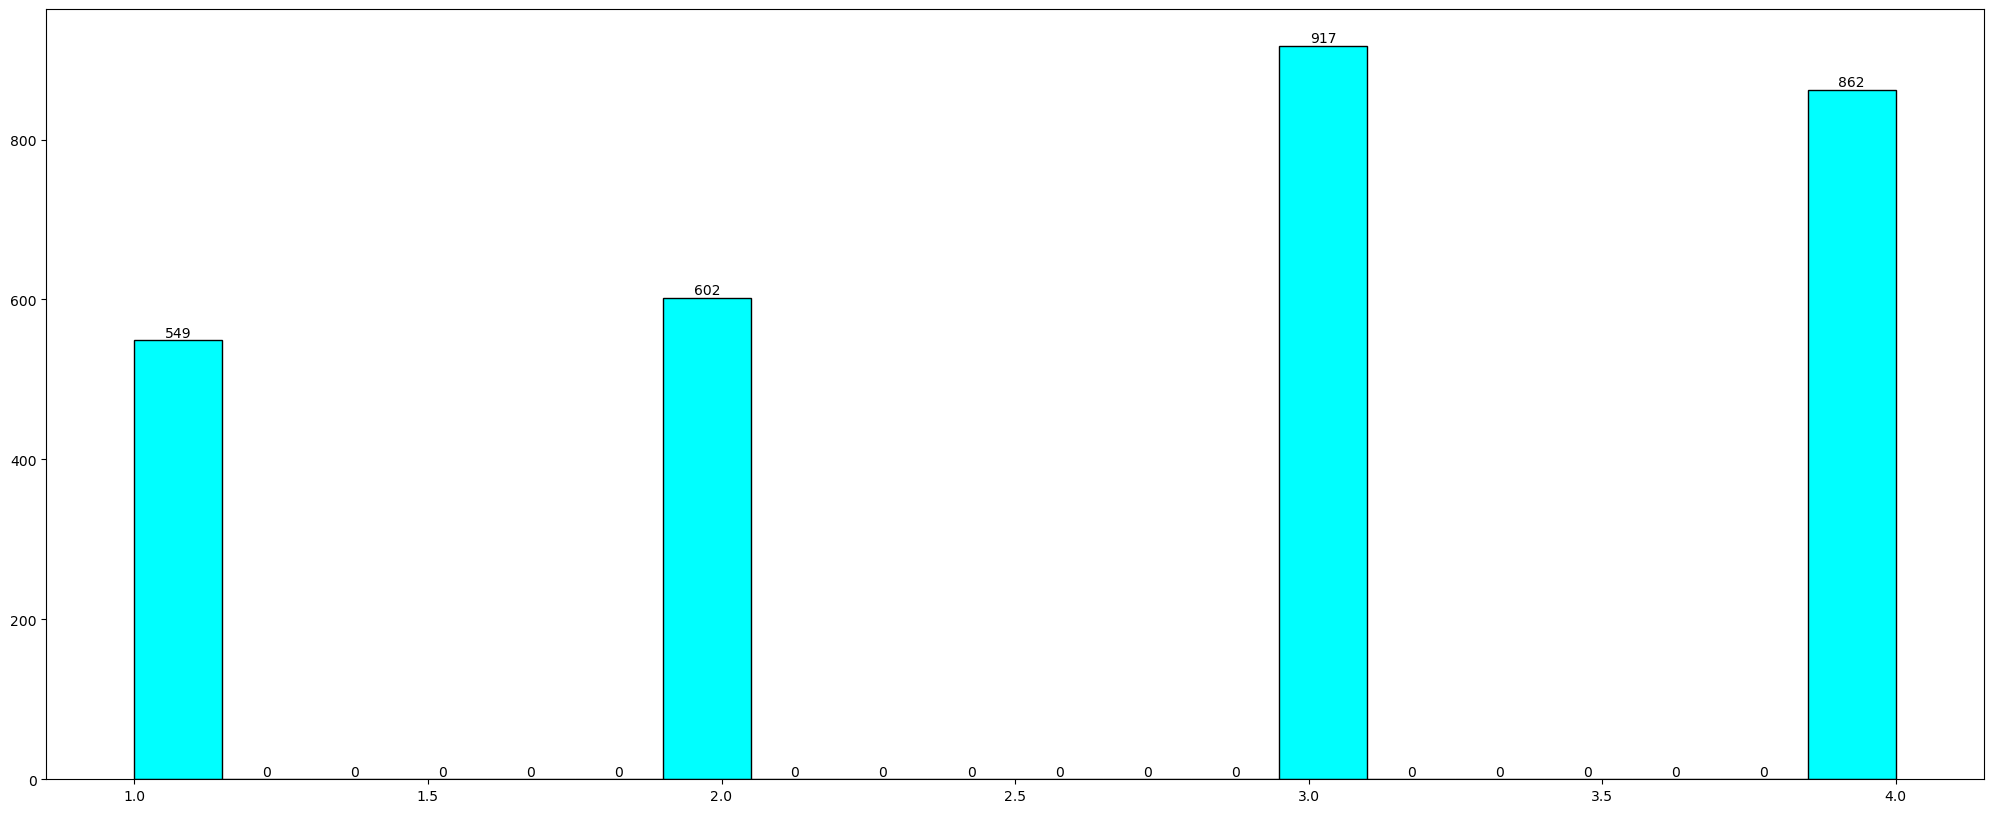

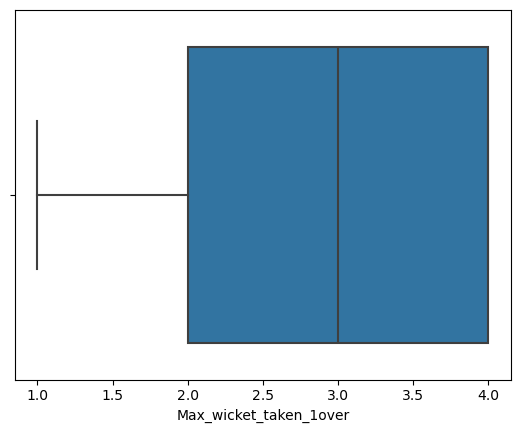

Description of Extra_bowls_bowled
----------------------------------------------------------------------------
count    2930.000000
mean       11.240273
std         7.743208
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Extra_bowls_bowled, dtype: float64 Distribution of Extra_bowls_bowled
----------------------------------------------------------------------------
BoxPlot of Extra_bowls_bowled
----------------------------------------------------------------------------


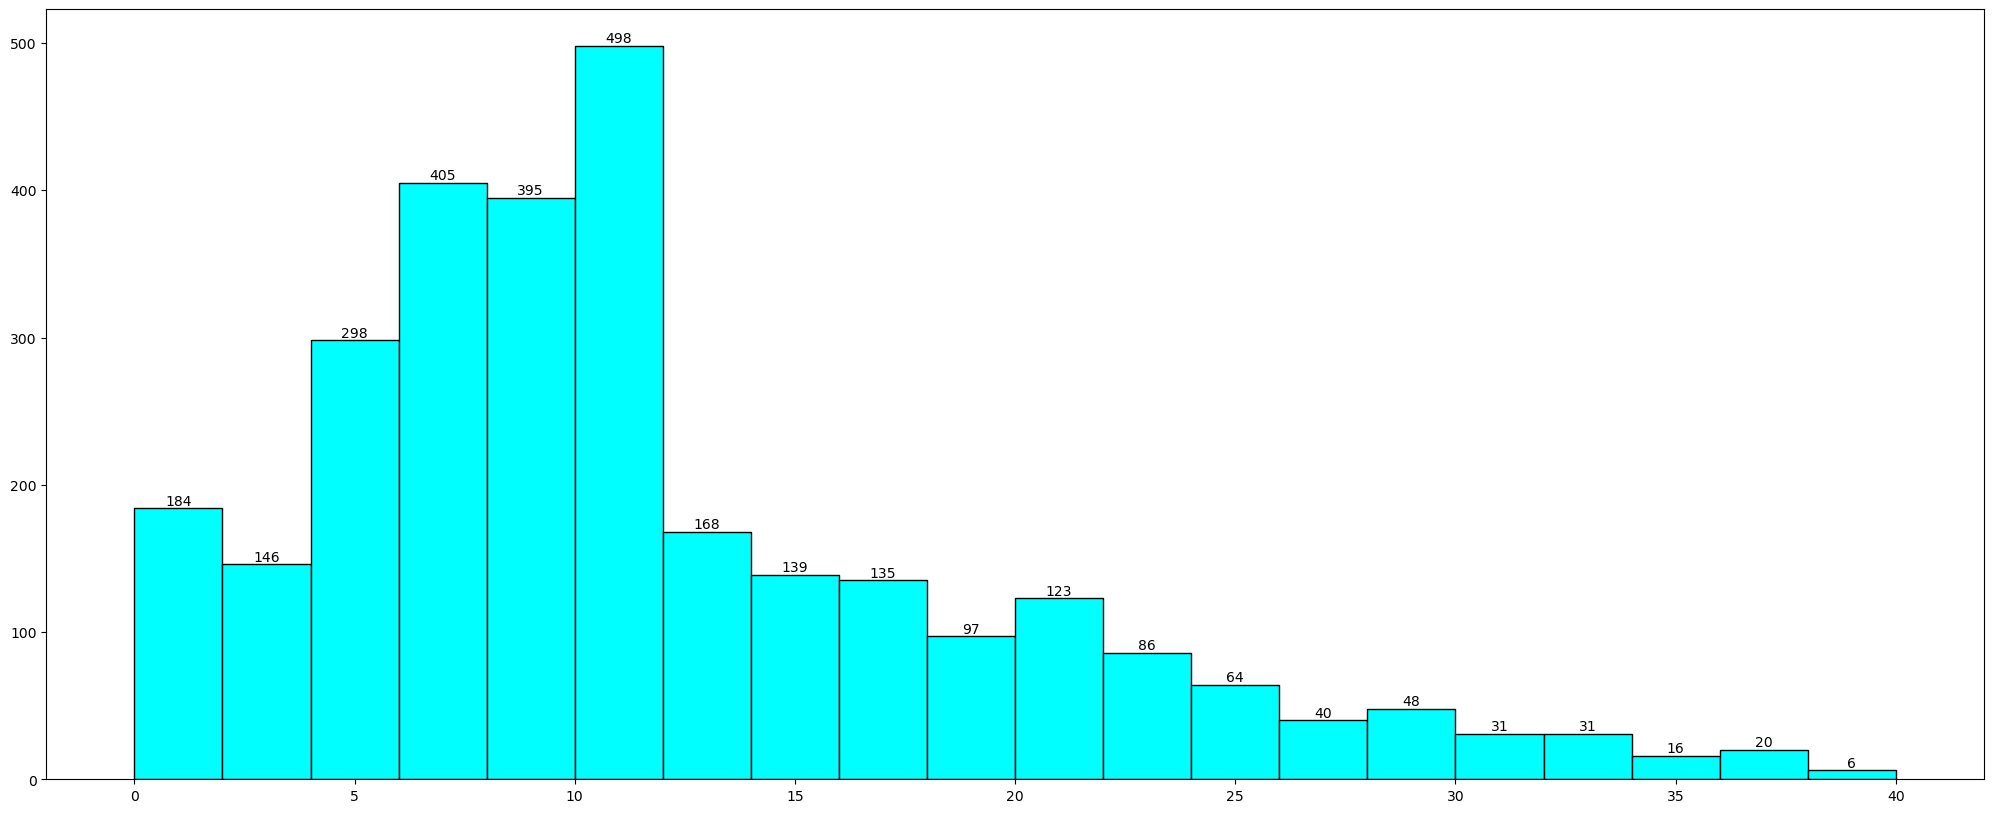

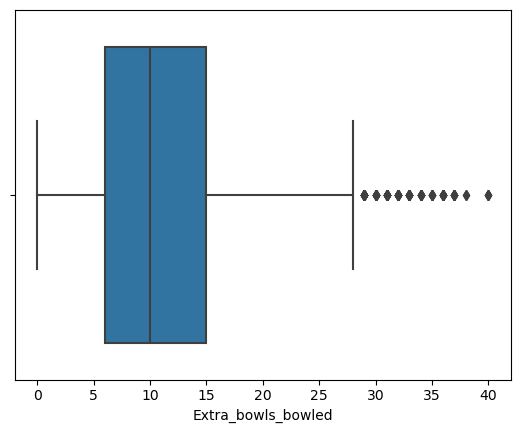

Description of Min_run_given_1over
----------------------------------------------------------------------------
count    2930.000000
mean        1.952560
std         1.678332
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Min_run_given_1over, dtype: float64 Distribution of Min_run_given_1over
----------------------------------------------------------------------------
BoxPlot of Min_run_given_1over
----------------------------------------------------------------------------


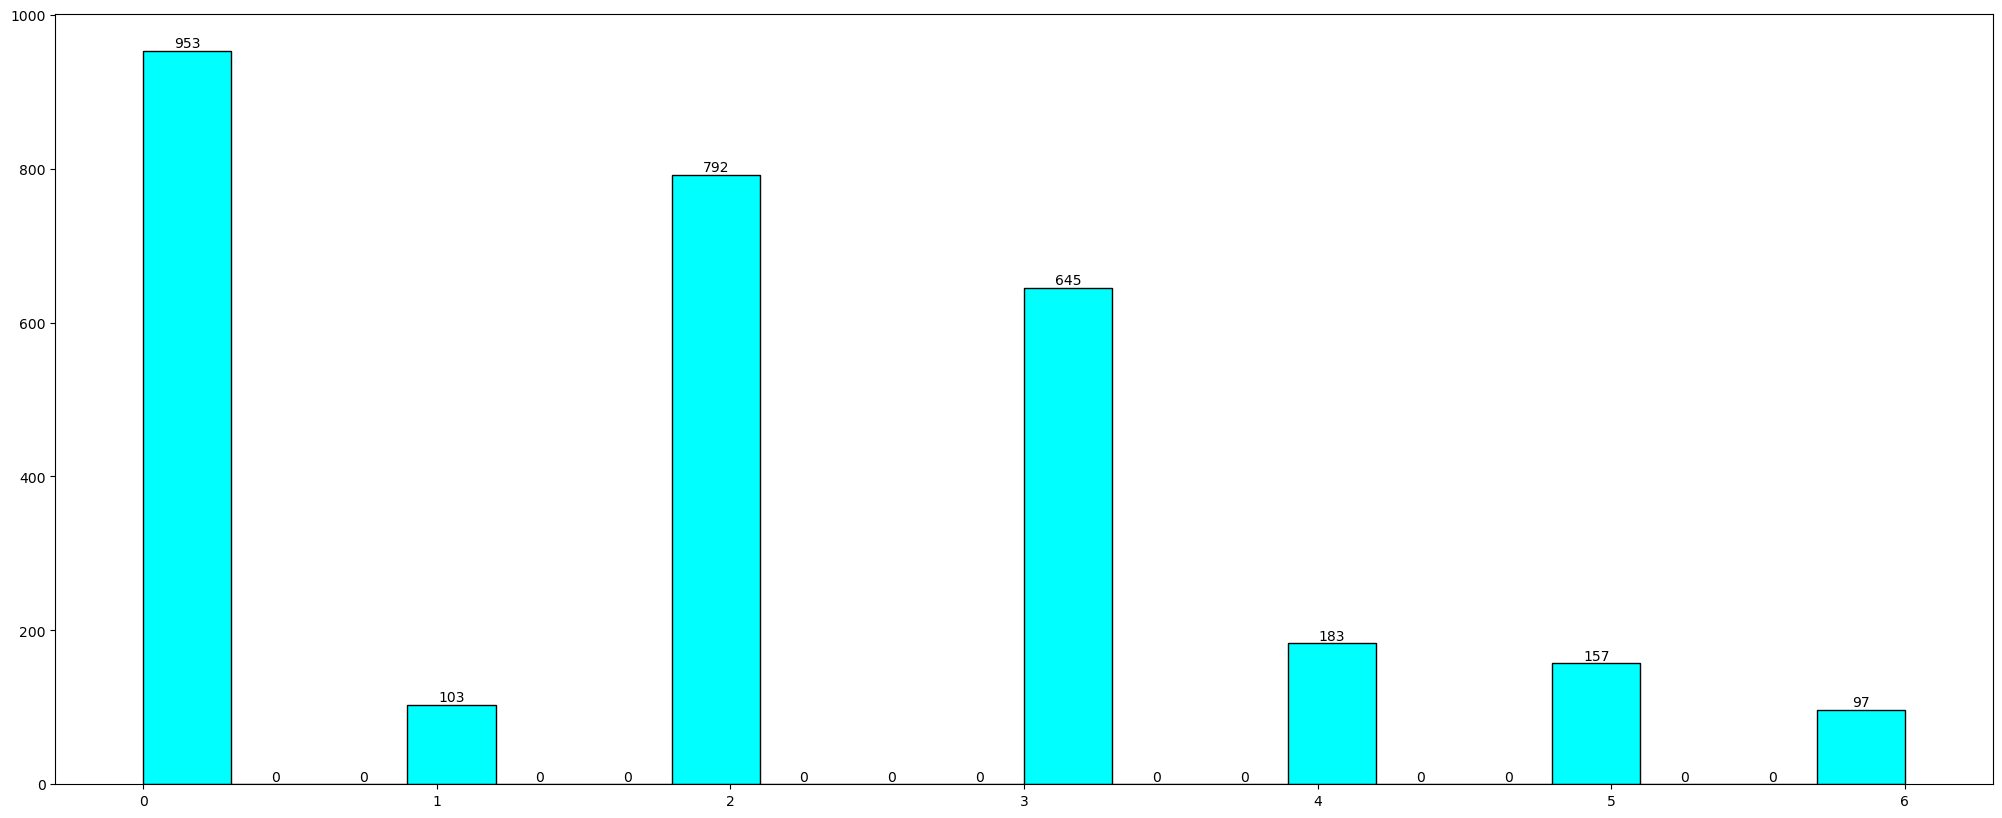

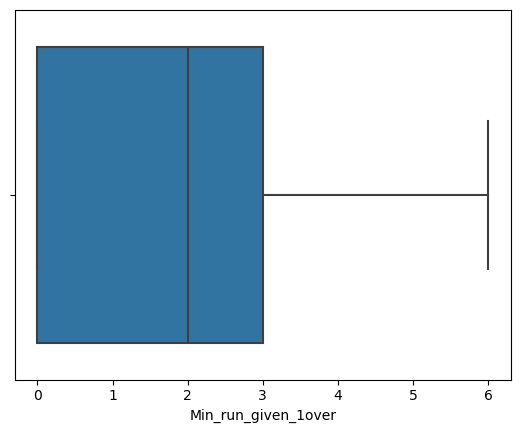

Description of Min_run_scored_1over
----------------------------------------------------------------------------
count    2930.000000
mean        2.764846
std         0.702864
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Min_run_scored_1over, dtype: float64 Distribution of Min_run_scored_1over
----------------------------------------------------------------------------
BoxPlot of Min_run_scored_1over
----------------------------------------------------------------------------


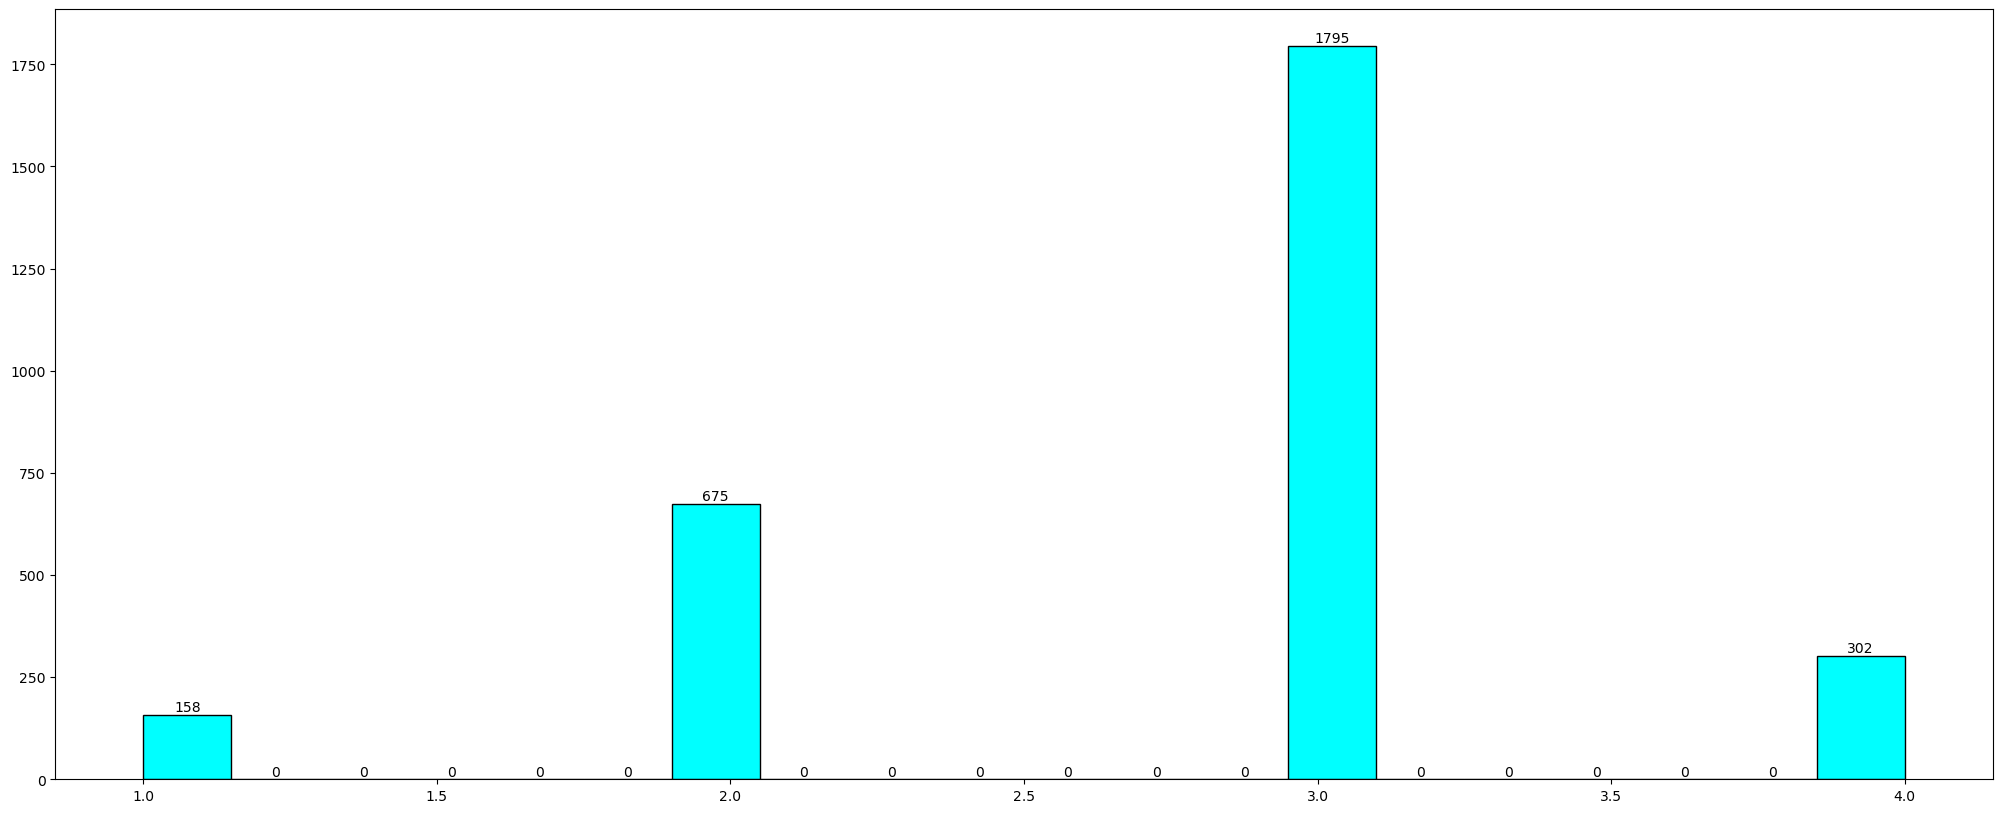

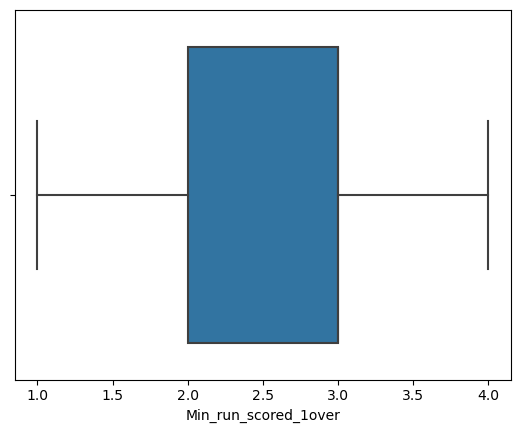

Description of Max_run_given_1over
----------------------------------------------------------------------------
count    2930.000000
mean        8.638225
std         4.982610
min         6.000000
25%         6.000000
50%         6.000000
75%         9.000000
max        40.000000
Name: Max_run_given_1over, dtype: float64 Distribution of Max_run_given_1over
----------------------------------------------------------------------------
BoxPlot of Max_run_given_1over
----------------------------------------------------------------------------


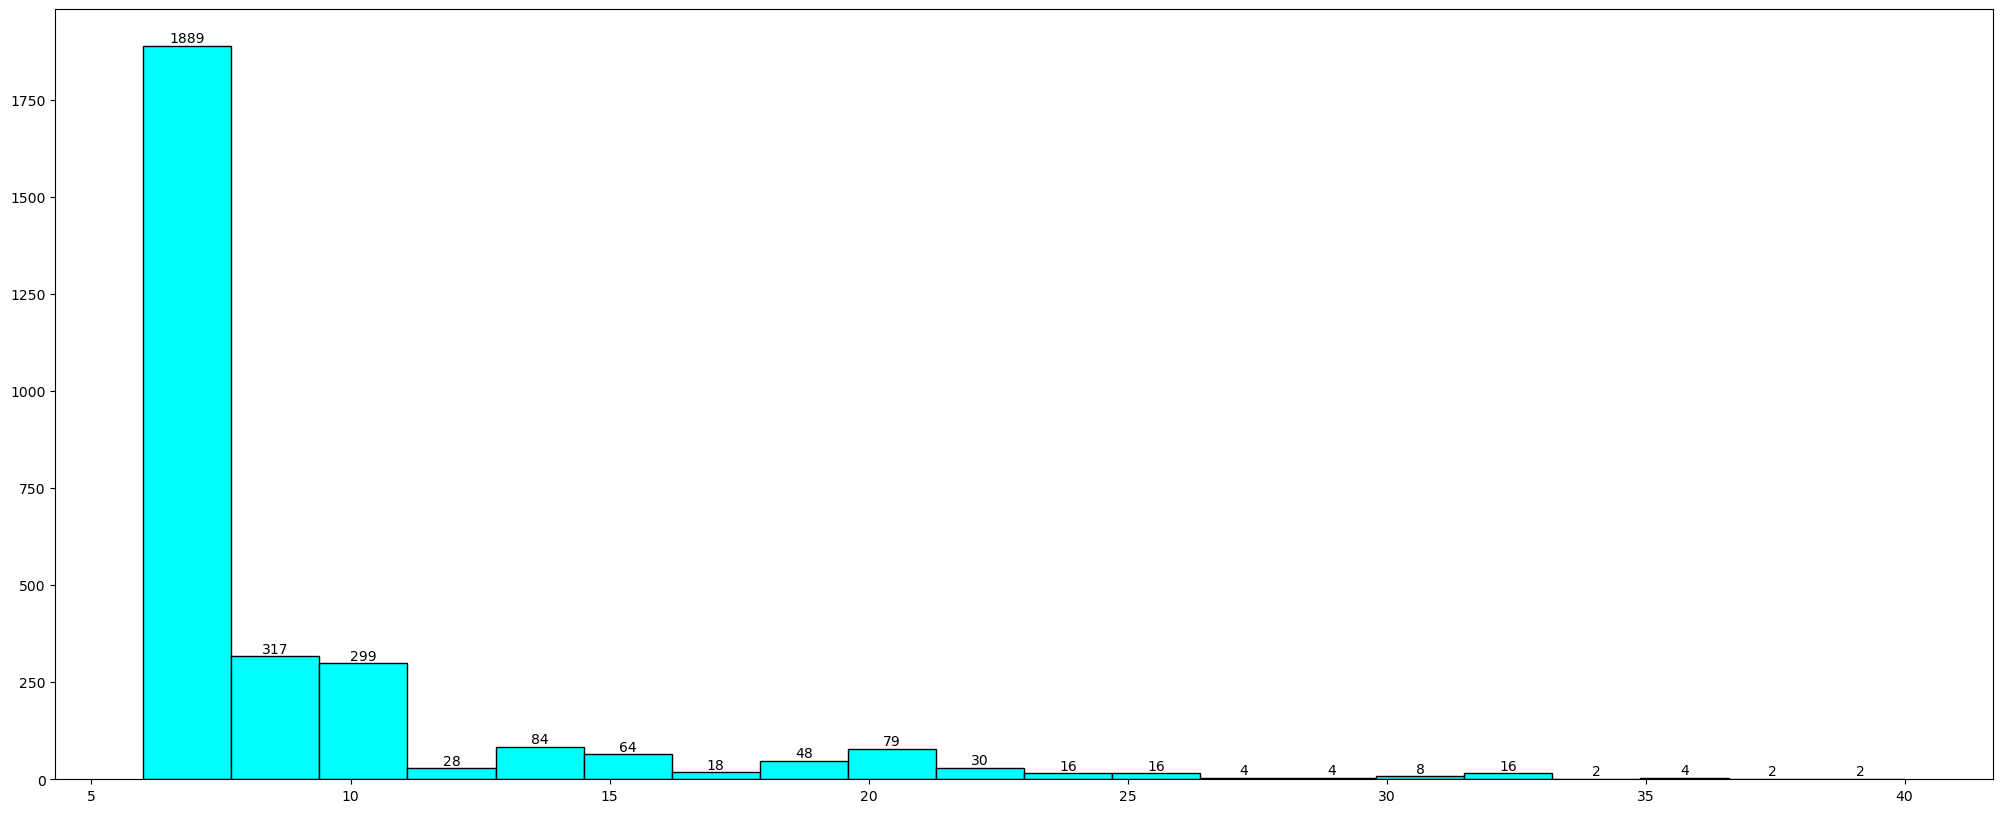

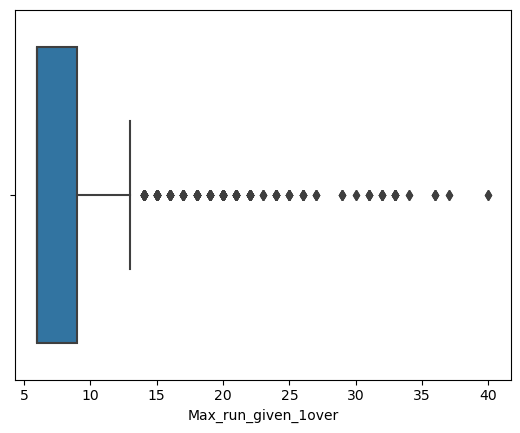

Description of extra_bowls_opponent
----------------------------------------------------------------------------
count    2930.000000
mean        4.229693
std         3.626108
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: extra_bowls_opponent, dtype: float64 Distribution of extra_bowls_opponent
----------------------------------------------------------------------------
BoxPlot of extra_bowls_opponent
----------------------------------------------------------------------------


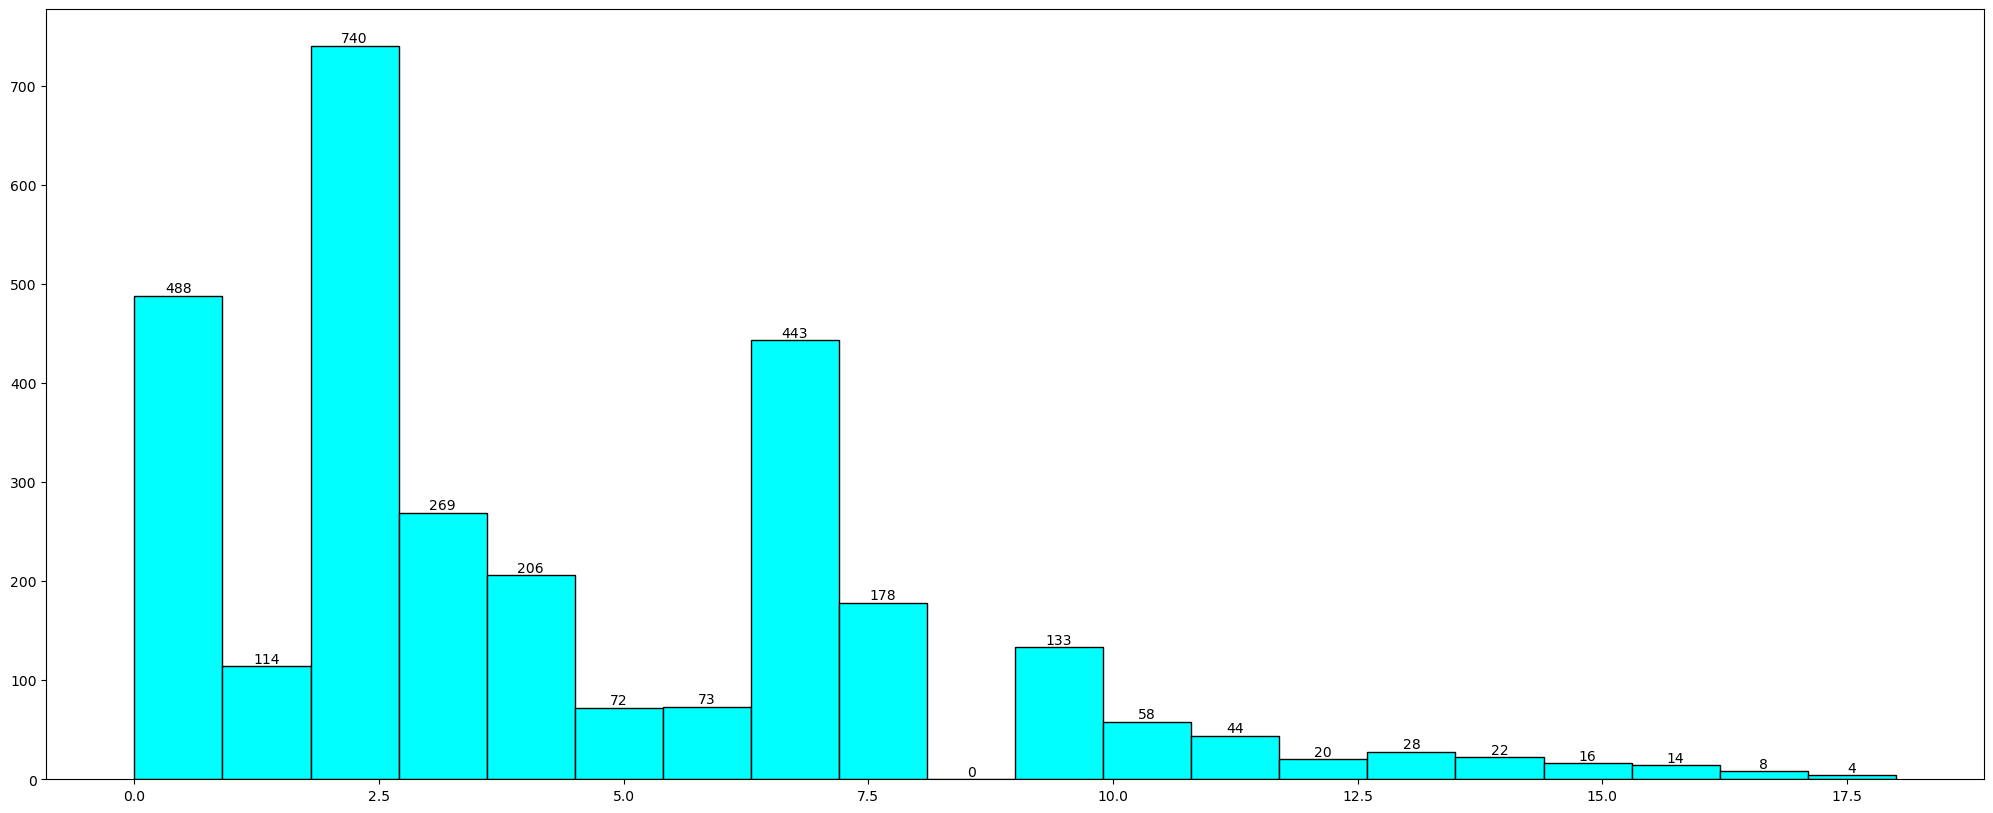

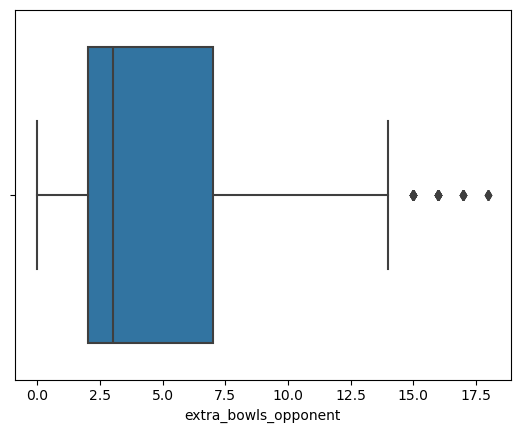

Description of player_highest_run
----------------------------------------------------------------------------
count    2930.000000
mean       65.890444
std        20.234203
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: player_highest_run, dtype: float64 Distribution of player_highest_run
----------------------------------------------------------------------------
BoxPlot of player_highest_run
----------------------------------------------------------------------------


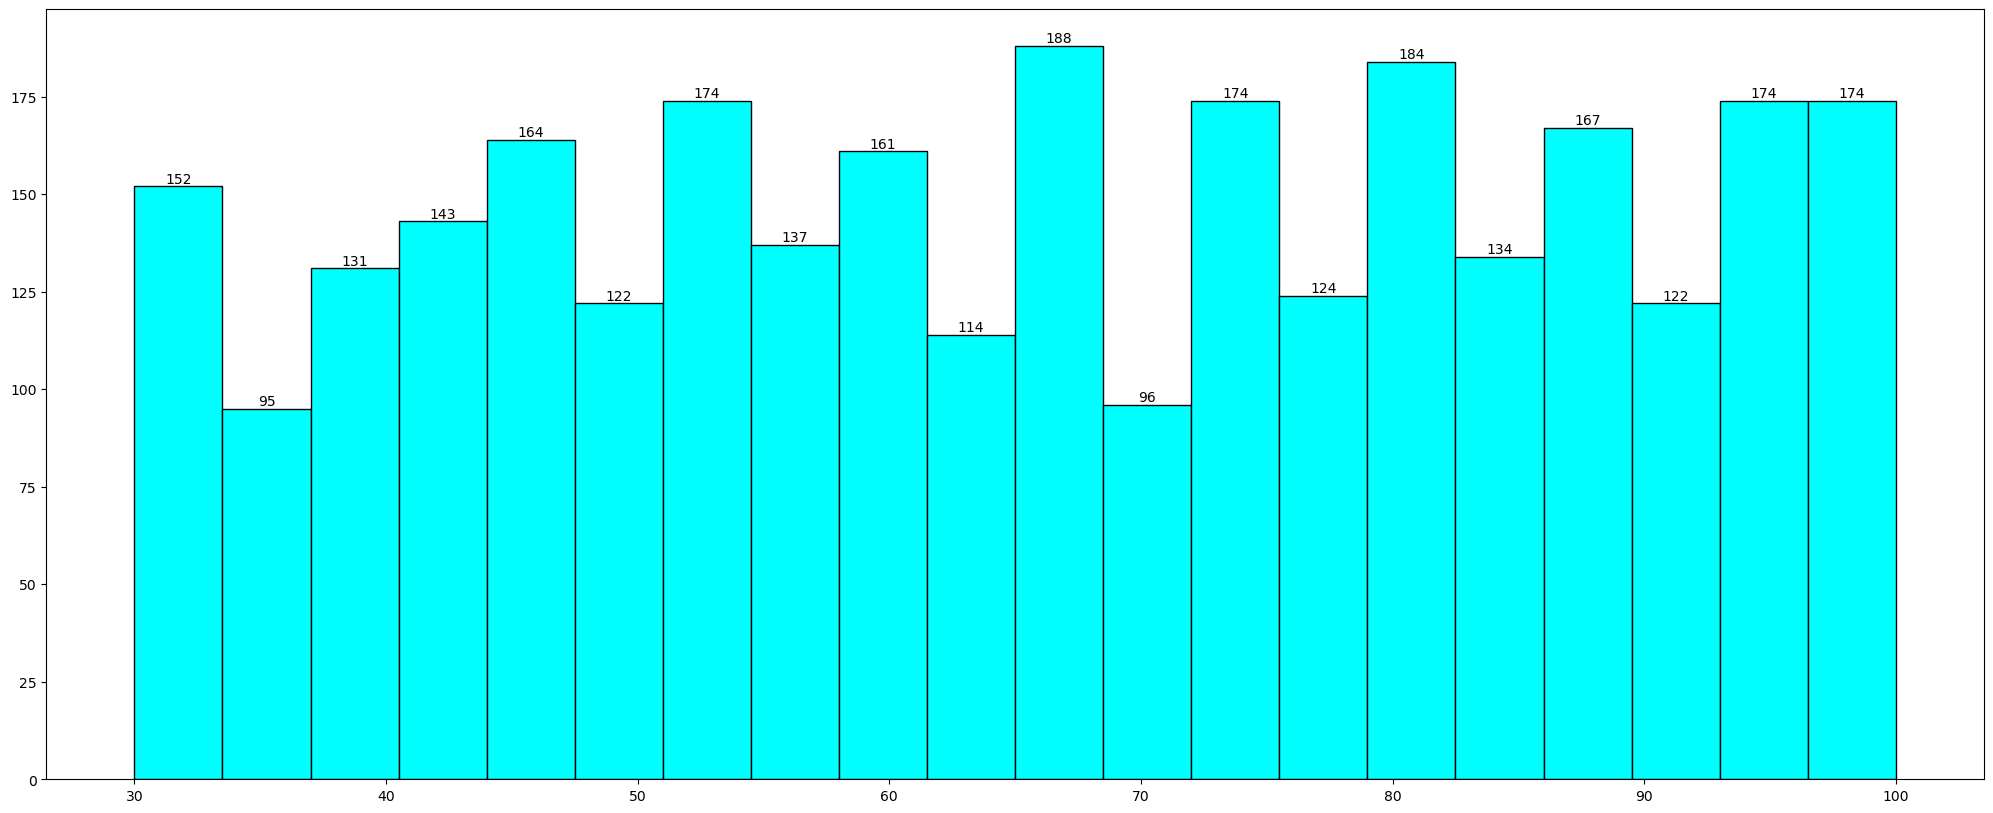

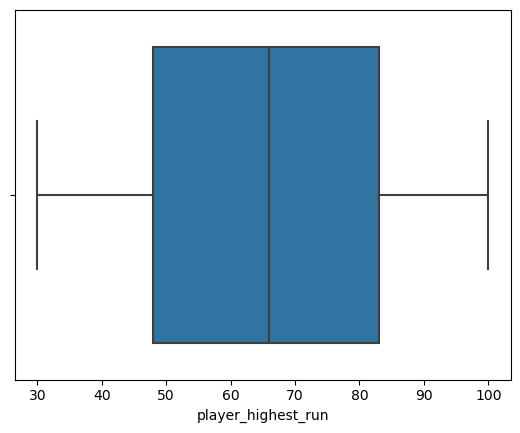

Description of Players_scored_zero
----------------------------------------------------------------------------
count    2930.000000
mean        2.733447
std         0.716775
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Players_scored_zero, dtype: float64 Distribution of Players_scored_zero
----------------------------------------------------------------------------
BoxPlot of Players_scored_zero
----------------------------------------------------------------------------


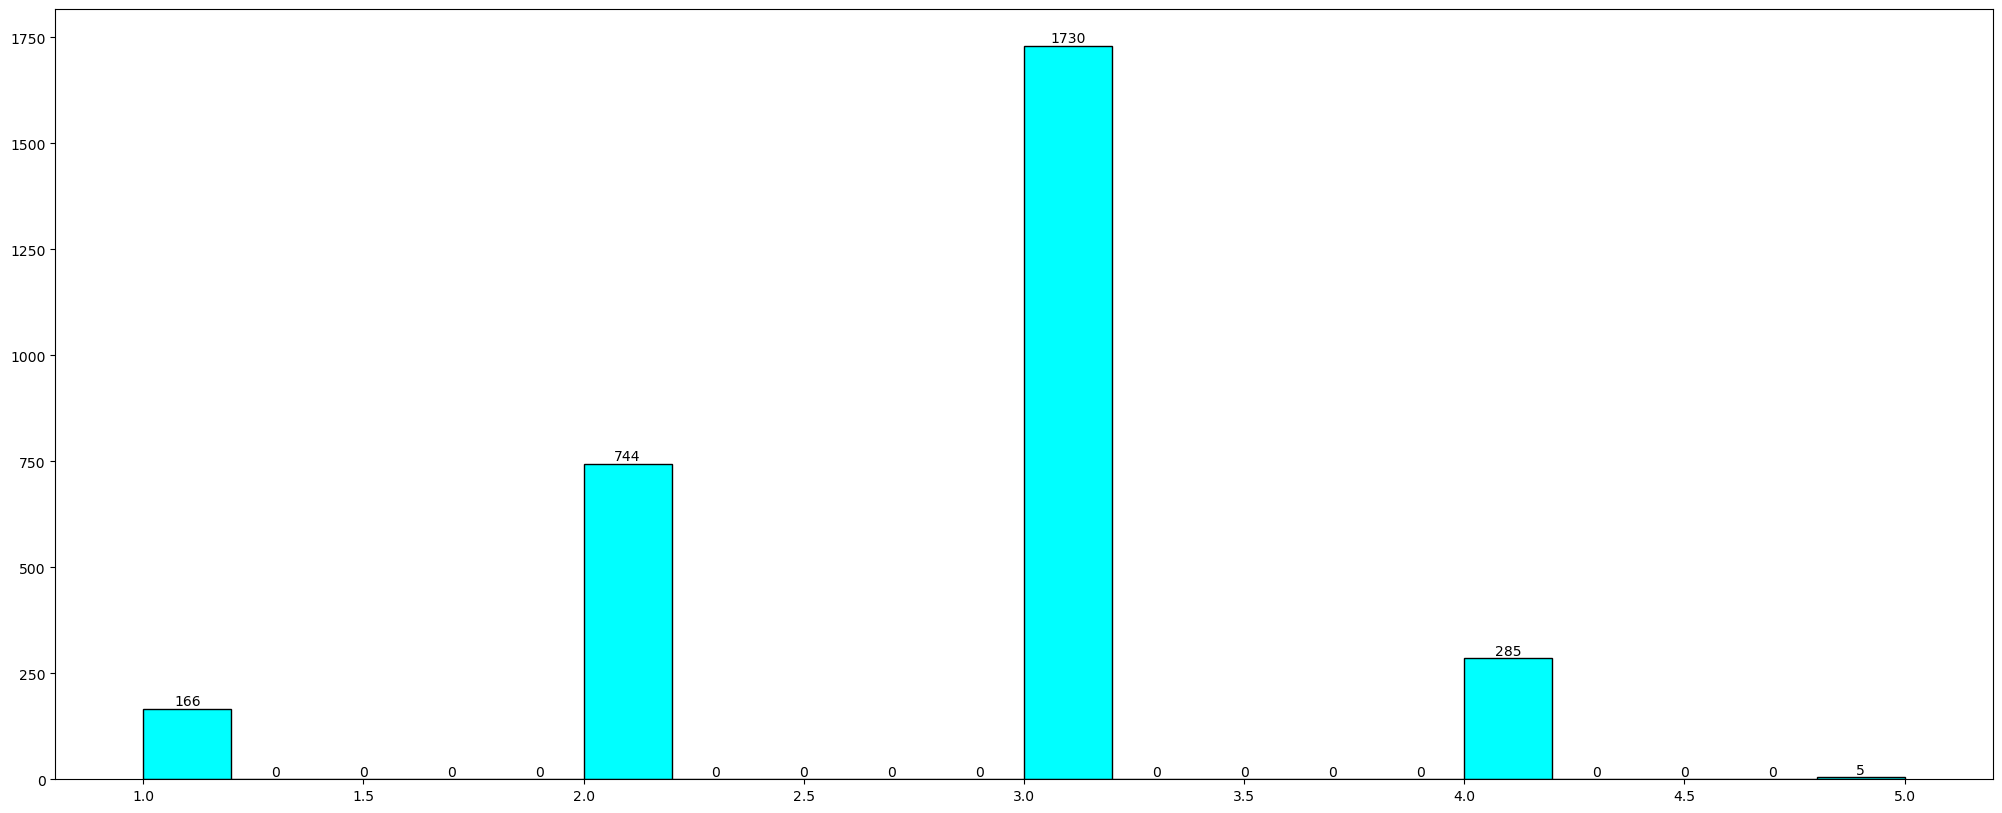

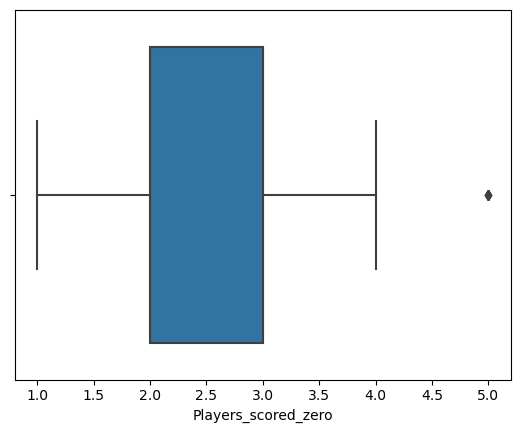

Description of player_highest_wicket
----------------------------------------------------------------------------
count    2930.000000
mean        2.063481
std         1.107440
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: player_highest_wicket, dtype: float64 Distribution of player_highest_wicket
----------------------------------------------------------------------------
BoxPlot of player_highest_wicket
----------------------------------------------------------------------------


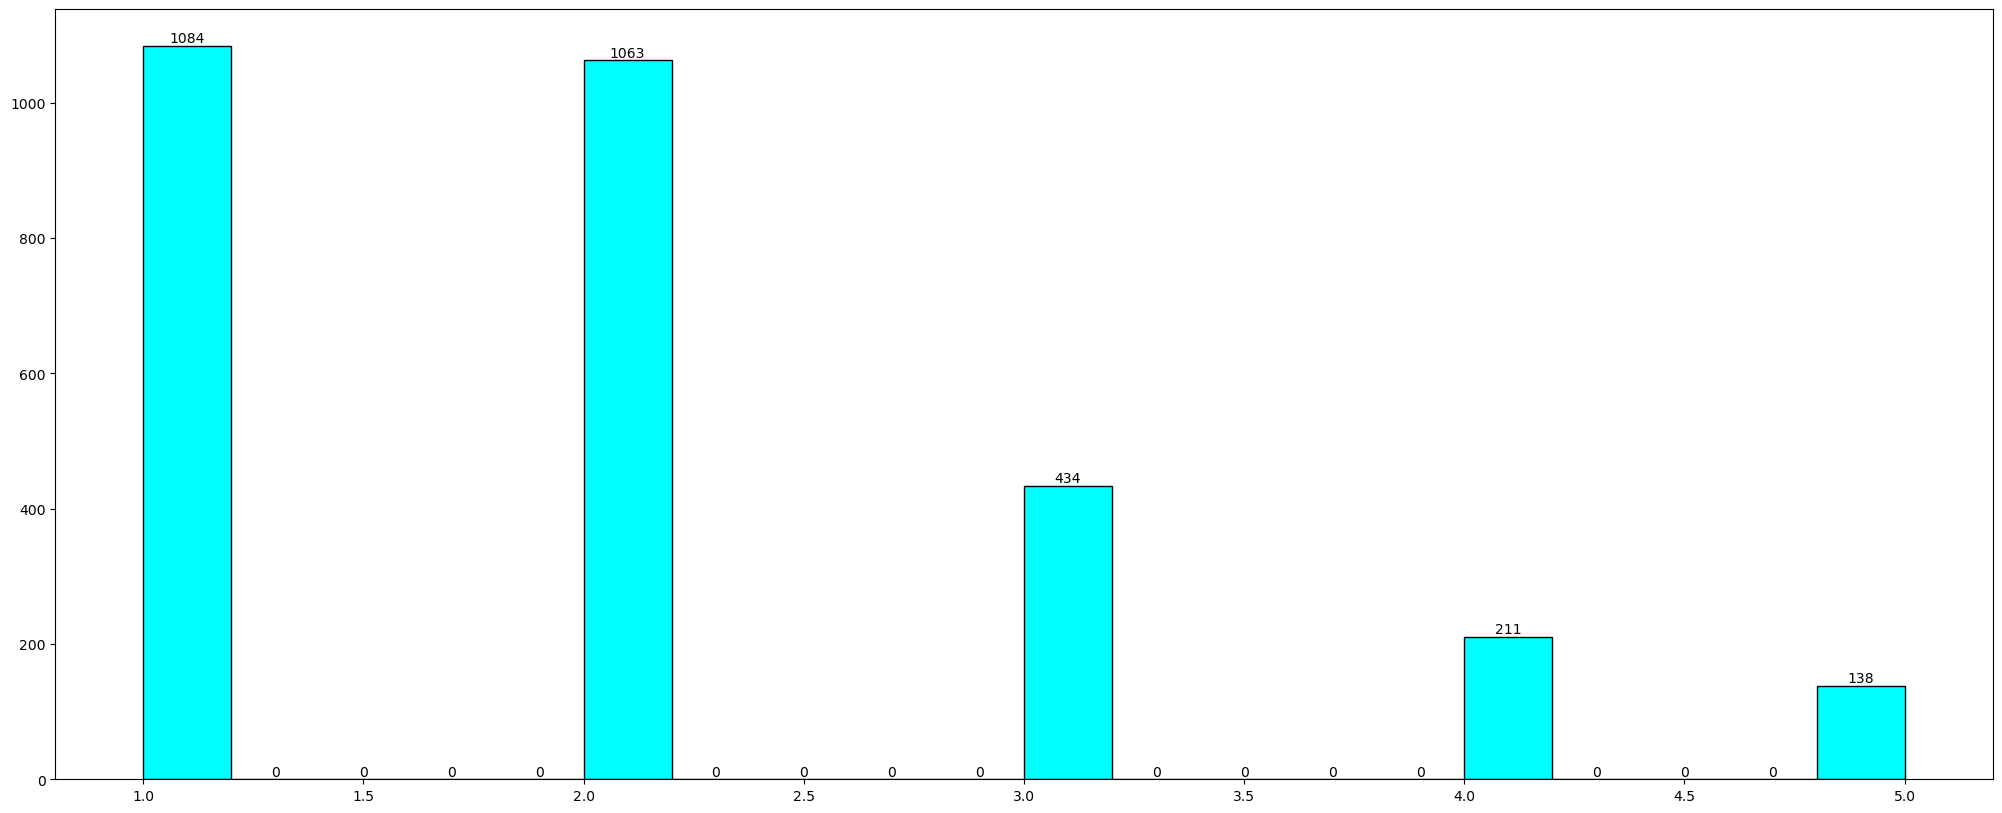

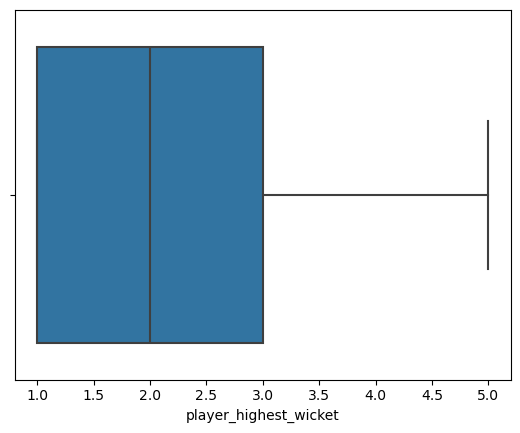

In [37]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [38]:
corr = data_num.corr(method='pearson')

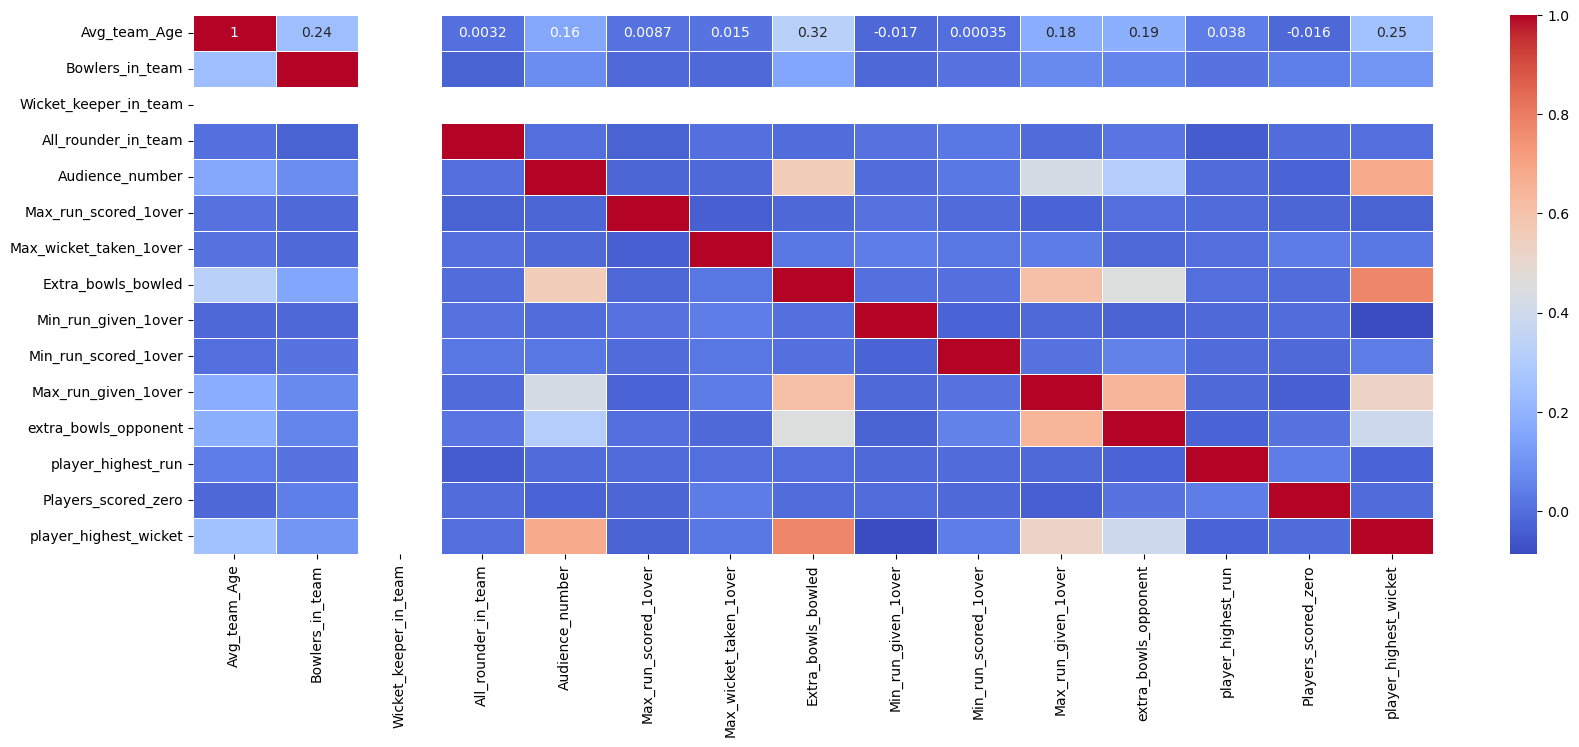

In [39]:
mask = np.triu(np.ones_like(corr, dtype=bool)) 
fig = plt.subplots(figsize=(20, 7))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [40]:
correlation_table = data_num.corr()

In [41]:
correlation_table

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Avg_team_Age                1.000000         0.239078                    NaN   
Bowlers_in_team             0.239078         1.000000                    NaN   
Wicket_keeper_in_team            NaN              NaN                    NaN   
All_rounder_in_team         0.003224        -0.030941                    NaN   
Audience_number             0.156038         0.082502                    NaN   
Max_run_scored_1over        0.008696        -0.012399                    NaN   
Max_wicket_taken_1over      0.014521        -0.012317                    NaN   
Extra_bowls_bowled          0.324667         0.153038                    NaN   
Min_run_given_1over        -0.016759        -0.018673                    NaN   
Min_run_scored_1over        0.000347         0.011139                    NaN   
Max_run_given_1over         0.176452         0.072351                    NaN   
extra_bowls_opponent        0.188756         0.061040                    NaN   
player_highest_run          0.037725         0.014775                    NaN   
Players_scored_zero        -0.015964         0.042192                    NaN   
player_highest_wicket       0.250466         0.106151                    NaN   

                        All_rounder_in_team  Audience_number  \
Avg_team_Age                       0.003224         0.156038   
Bowlers_in_team                   -0.030941         0.082502   
Wicket_keeper_in_team                   NaN              NaN   
All_rounder_in_team                1.000000        -0.001915   
Audience_number                   -0.001915         1.000000   
Max_run_scored_1over              -0.027683        -0.021429   
Max_wicket_taken_1over             0.003964        -0.011888   
Extra_bowls_bowled                -0.005211         0.557681   
Min_run_given_1over                0.008985        -0.004310   
Min_run_scored_1over               0.025237         0.024161   
Max_run_given_1over               -0.008087         0.425686   
extra_bowls_opponent               0.016583         0.310355   
player_highest_run                -0.046871        -0.008498   
Players_scored_zero               -0.004727        -0.025126   
player_highest_wicket              0.000259         0.677976   

                        Max_run_scored_1over  Max_wicket_taken_1over  \
Avg_team_Age                        0.008696                0.014521   
Bowlers_in_team                    -0.012399               -0.012317   
Wicket_keeper_in_team                    NaN                     NaN   
All_rounder_in_team                -0.027683                0.003964   
Audience_number                    -0.021429               -0.011888   
Max_run_scored_1over                1.000000               -0.039446   
Max_wicket_taken_1over             -0.039446                1.000000   
Extra_bowls_bowled                 -0.015526                0.023231   
Min_run_given_1over                 0.009330                0.038825   
Min_run_scored_1over               -0.009487                0.021550   
Max_run_given_1over                -0.026359                0.034357   
extra_bowls_opponent                0.001994               -0.014421   
player_highest_run                 -0.010024                0.001674   
Players_scored_zero                -0.022979                0.035980   
player_highest_wicket              -0.030618                0.023450   

                        Extra_bowls_bowled  Min_run_given_1over  \
Avg_team_Age                      0.324667            -0.016759   
Bowlers_in_team                   0.153038            -0.018673   
Wicket_keeper_in_team                  NaN                  NaN   
All_rounder_in_team              -0.005211             0.008985   
Audience_number                   0.557681            -0.004310   
Max_run_scored_1over             -0.015526             0.009330   
Max_wicket_taken_1over            0.023231             0.038825   
Extra_bowls_bowled           

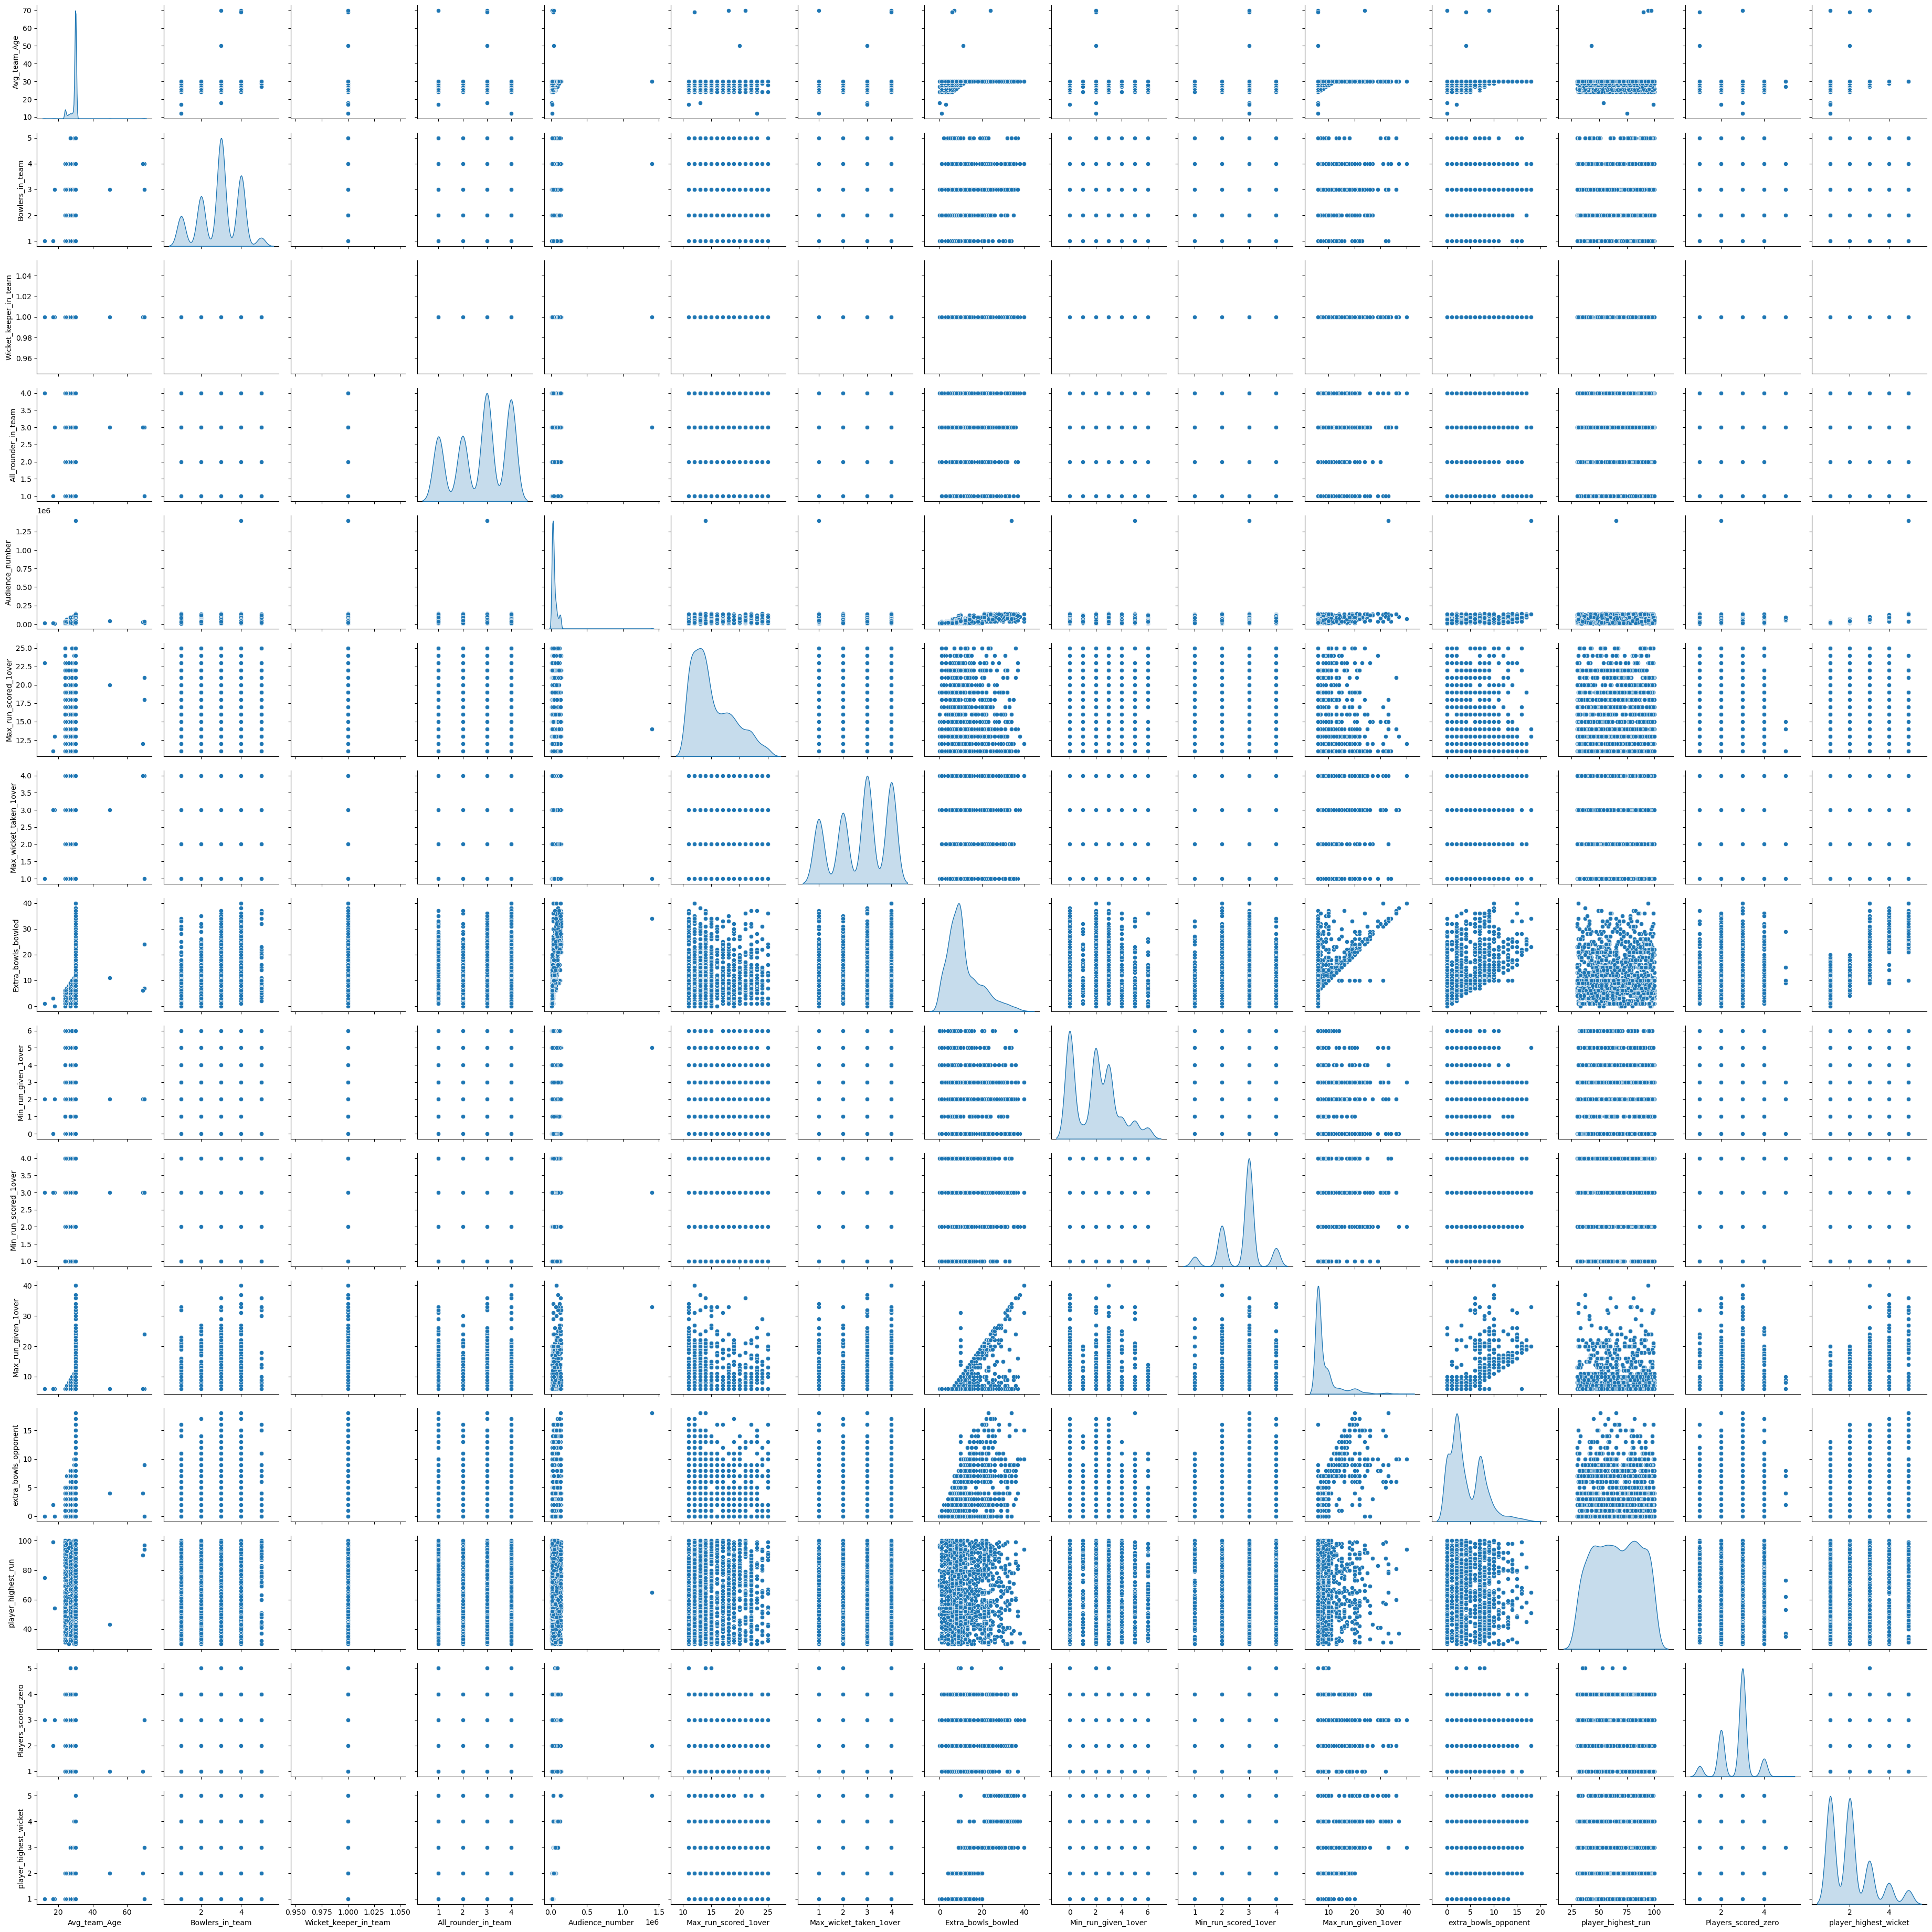

In [42]:
sns.pairplot(data=data_num, diag_kind="kde")
plt.show()

In [43]:
data_num.columns

Index(['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

The description statistics for 'Avg_team_Age' column is:


count    2930.000000
mean       29.267918
std         2.230540
min        12.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: Avg_team_Age, dtype: float64


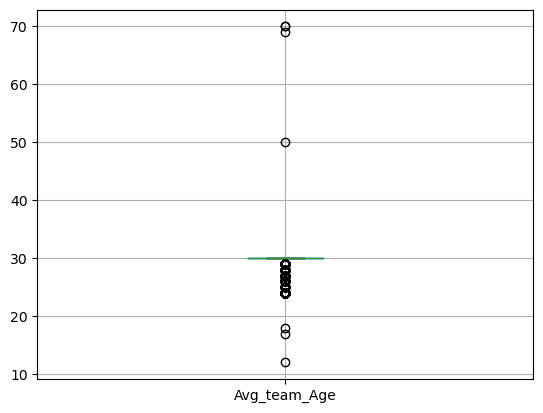

The description statistics for 'Bowlers_in_team' column is:


count    2930.000000
mean        2.916041
std         1.009573
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Bowlers_in_team, dtype: float64


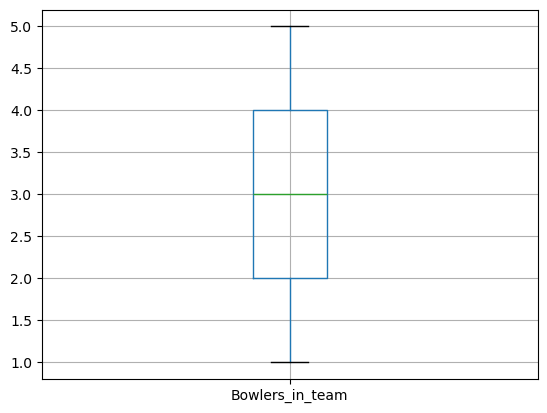

The description statistics for 'Wicket_keeper_in_team' column is:


count    2930.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Wicket_keeper_in_team, dtype: float64


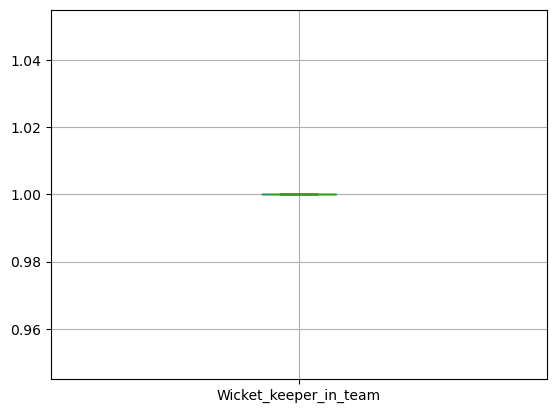

The description statistics for 'All_rounder_in_team' column is:


count    2930.00000
mean        2.72628
std         1.08569
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         4.00000
Name: All_rounder_in_team, dtype: float64


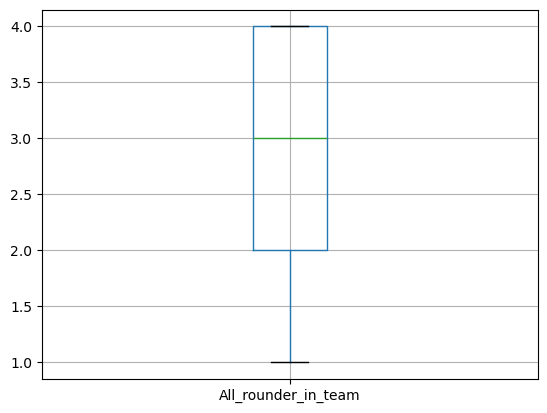

The description statistics for 'Audience_number' column is:


count    2.930000e+03
mean     4.593846e+04
std      4.796271e+04
min      7.063000e+03
25%      2.060800e+04
50%      3.434900e+04
75%      5.593175e+04
max      1.399930e+06
Name: Audience_number, dtype: float64


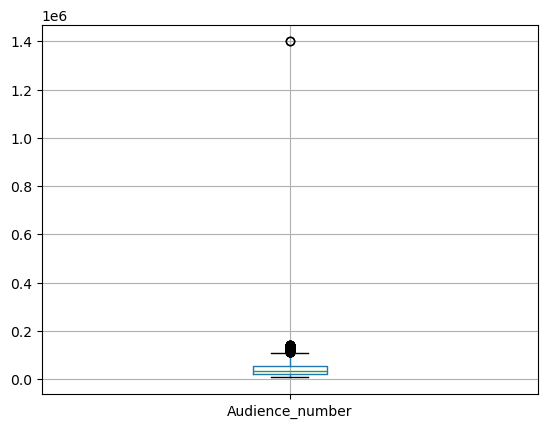

The description statistics for 'Max_run_scored_1over' column is:


count    2930.000000
mean       15.188396
std         3.645339
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: Max_run_scored_1over, dtype: float64


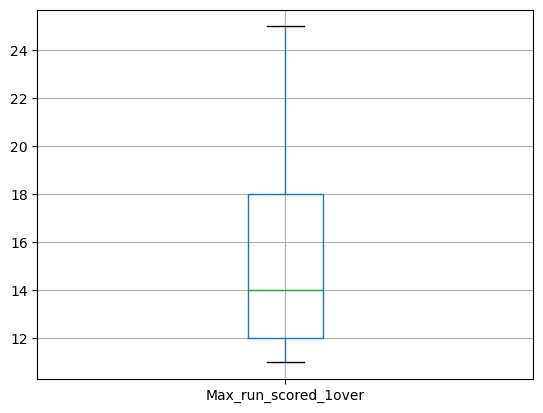

The description statistics for 'Max_wicket_taken_1over' column is:


count    2930.000000
mean        2.713993
std         1.080623
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Max_wicket_taken_1over, dtype: float64


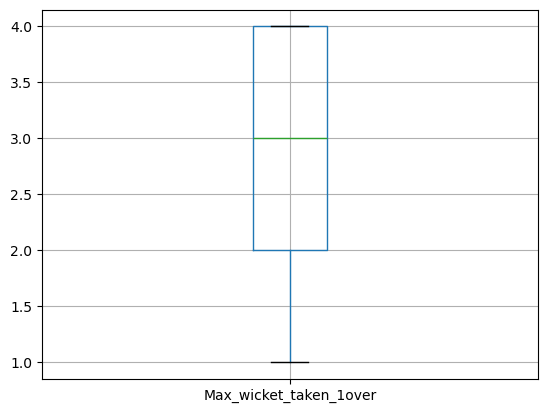

The description statistics for 'Extra_bowls_bowled' column is:


count    2930.000000
mean       11.240273
std         7.743208
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Extra_bowls_bowled, dtype: float64


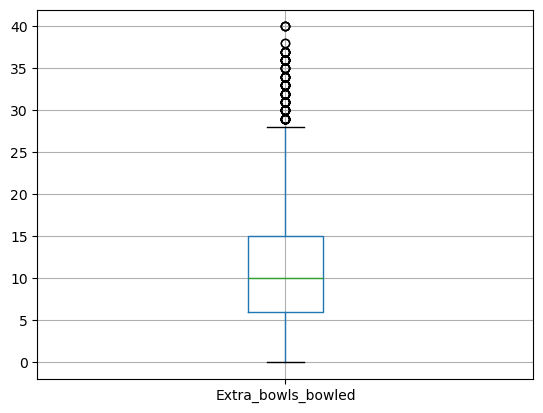

The description statistics for 'Min_run_given_1over' column is:


count    2930.000000
mean        1.952560
std         1.678332
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Min_run_given_1over, dtype: float64


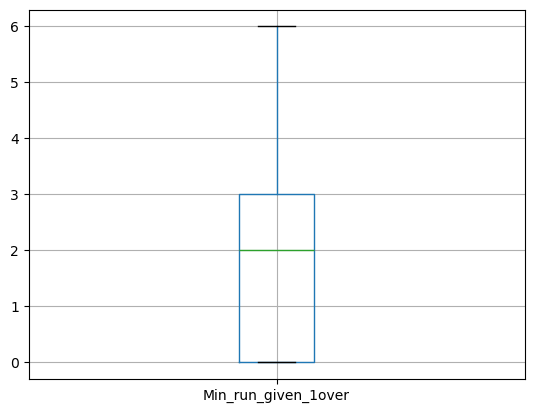

The description statistics for 'Min_run_scored_1over' column is:


count    2930.000000
mean        2.764846
std         0.702864
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Min_run_scored_1over, dtype: float64


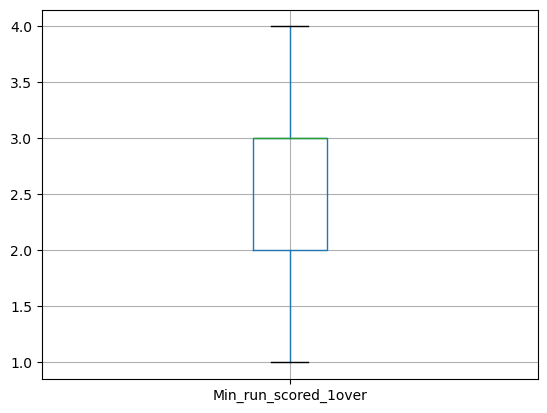

The description statistics for 'Max_run_given_1over' column is:


count    2930.000000
mean        8.638225
std         4.982610
min         6.000000
25%         6.000000
50%         6.000000
75%         9.000000
max        40.000000
Name: Max_run_given_1over, dtype: float64


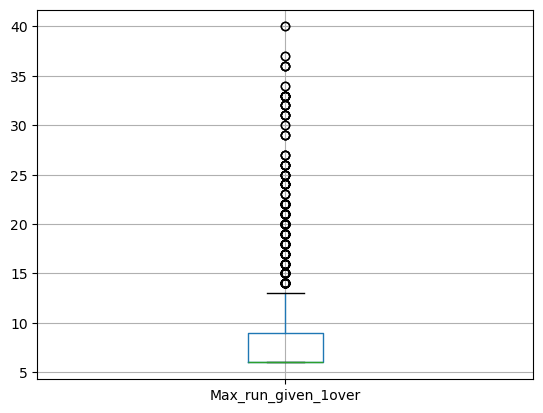

The description statistics for 'extra_bowls_opponent' column is:


count    2930.000000
mean        4.229693
std         3.626108
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: extra_bowls_opponent, dtype: float64


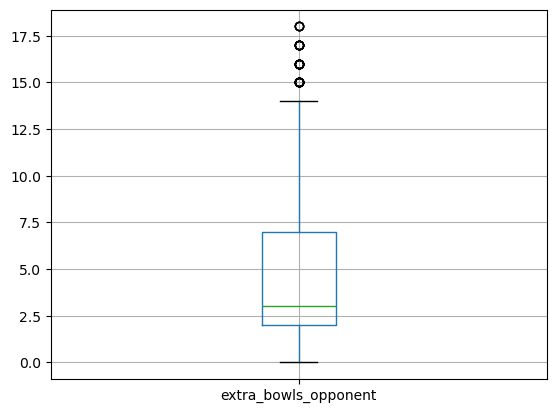

The description statistics for 'player_highest_run' column is:


count    2930.000000
mean       65.890444
std        20.234203
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: player_highest_run, dtype: float64


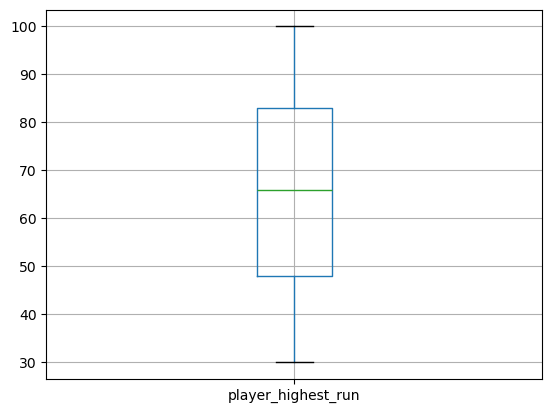

In [44]:
for i in range(0,13):
    print("The description statistics for '{}' column is:".format(lstnumericcolumns[i]))
    print('\n')
    print(data_num[lstnumericcolumns[i]].describe())
    data_num.boxplot(column=lstnumericcolumns[i])
    plt.show()

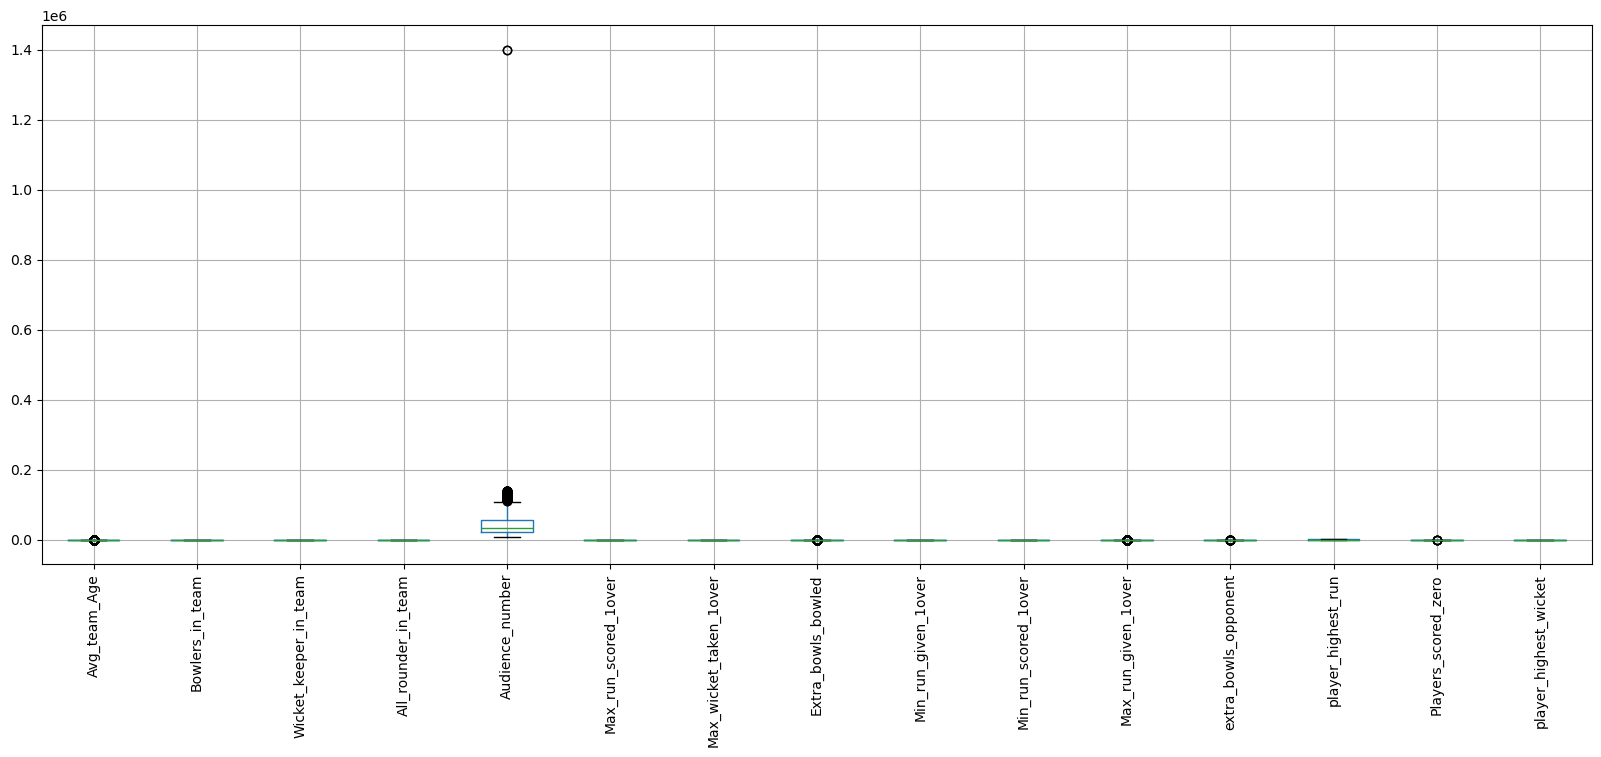

In [45]:
data_num.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

In [46]:
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1

In [47]:
((data_num < (Q1 - 1.5 * IQR)) | (data_num > (Q3 + 1.5 * IQR))).sum()

Avg_team_Age              630
Bowlers_in_team             0
Wicket_keeper_in_team       0
All_rounder_in_team         0
Audience_number           249
Max_run_scored_1over        0
Max_wicket_taken_1over      0
Extra_bowls_bowled        124
Min_run_given_1over         0
Min_run_scored_1over        0
Max_run_given_1over       349
extra_bowls_opponent       42
player_highest_run          0
Players_scored_zero         5
player_highest_wicket       0
dtype: int64

In [48]:
((data_num > (Q3 + 1.5 * IQR)) & (data_num < data_num.quantile(0.95))).sum()

Avg_team_Age                0
Bowlers_in_team             0
Wicket_keeper_in_team       0
All_rounder_in_team         0
Audience_number           101
Max_run_scored_1over        0
Max_wicket_taken_1over      0
Extra_bowls_bowled          0
Min_run_given_1over         0
Min_run_scored_1over        0
Max_run_given_1over       166
extra_bowls_opponent        0
player_highest_run          0
Players_scored_zero         0
player_highest_wicket       0
dtype: int64

In [49]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [50]:
for i in data_num:    
    data_num[i]=treat_outlier(data_num[i])

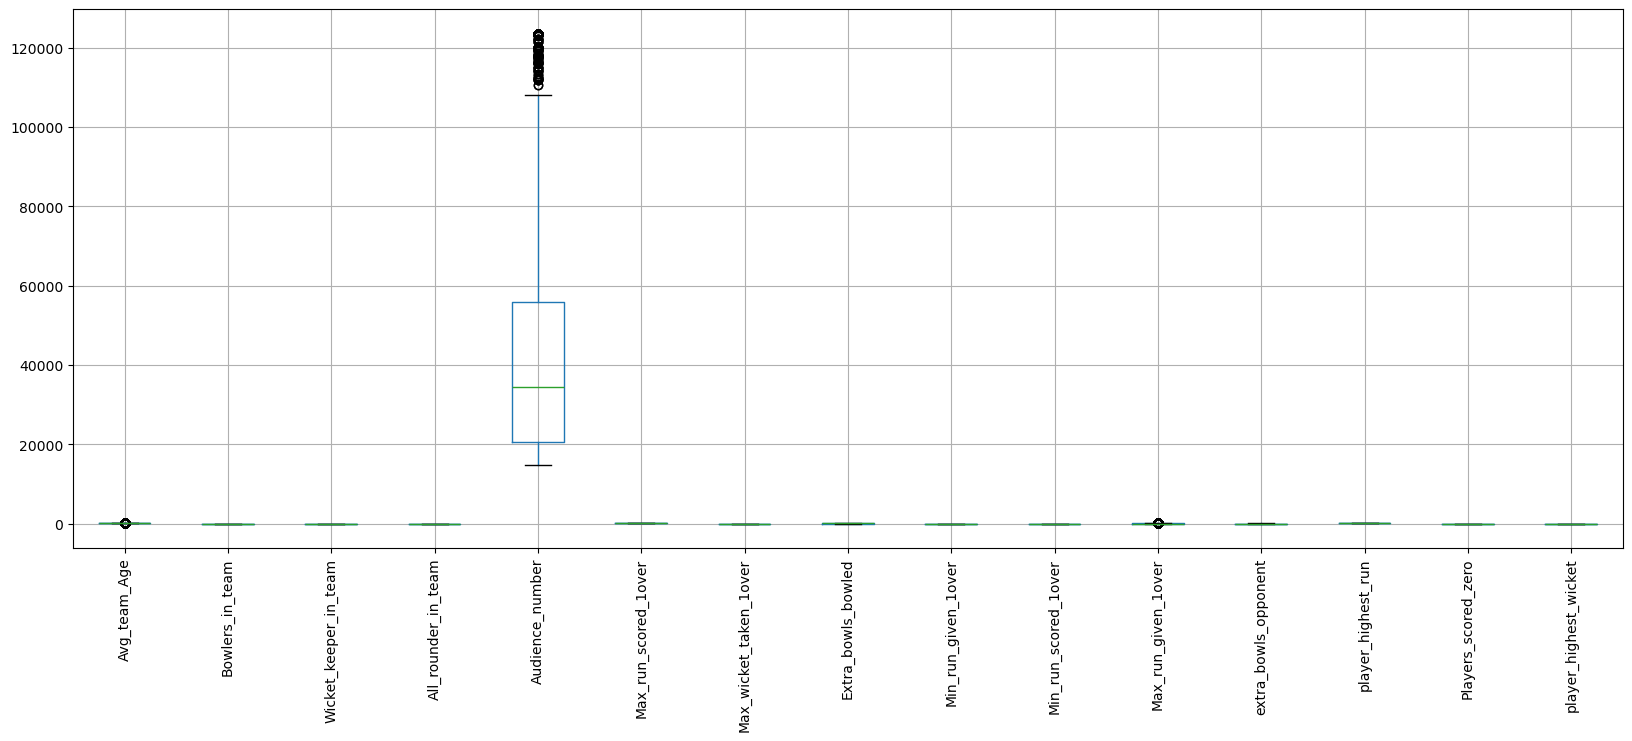

In [51]:
data_num.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

In [52]:
from scipy.stats import zscore
data_num_scaled=data_num.apply(zscore)
data_num_scaled.head()

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Game_number                                                         
Game_1          -3.025632         0.120372                    NaN   
Game_2          -3.025632         0.120372                    NaN   
Game_3          -3.025632         0.120372                    NaN   
Game_4          -3.025632        -0.923089                    NaN   
Game_5          -3.025632        -1.966550                    NaN   

             All_rounder_in_team  Audience_number  Max_run_scored_1over  \
Game_number                                                               
Game_1                  0.252159        -0.966589             -0.608833   
Game_2                  1.173390        -0.966589             -0.898142   
Game_3                 -0.669071        -0.966589             -0.319524   
Game_4                 -0.669071        -0.966589             -0.030215   
Game_5                  0.252159        -0.966589             -0.898142   

             Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                    
Game_1                     0.264714           -1.395238             0.050147   
Game_2                    -1.586387           -1.395238            -1.195032   
Game_3                     1.190264           -1.395238            -1.195032   
Game_4                     1.190264           -1.395238             0.050147   
Game_5                     1.190264           -1.395238            -1.195032   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                   0.334622            -0.589762             -1.238044   
Game_2                   0.334622            -0.589762             -1.238044   
Game_3                   0.334622            -0.589762             -1.238044   
Game_4                   0.334622            -0.589762             -1.238044   
Game_5                   0.334622            -0.589762             -1.238044   

             player_highest_run  Players_scored_zero  player_highest_wicket  
Game_number                                                                  
Game_1                -0.594861             0.376540              -1.019306  
Game_2                 0.156256            -1.027103              -1.019306  
Game_3                 0.156256             0.376540              -1.019306  
Game_4                 0.356554             0.376540              -1.019306  
Game_5                 0.707076             0.376540              -1.019306

In [53]:
data_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2930 entries, Game_1 to Game_2930
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Avg_team_Age            2930 non-null   float64
 1   Bowlers_in_team         2930 non-null   float64
 2   Wicket_keeper_in_team   0 non-null      float64
 3   All_rounder_in_team     2930 non-null   float64
 4   Audience_number         2930 non-null   float64
 5   Max_run_scored_1over    2930 non-null   float64
 6   Max_wicket_taken_1over  2930 non-null   float64
 7   Extra_bowls_bowled      2930 non-null   float64
 8   Min_run_given_1over     2930 non-null   float64
 9   Min_run_scored_1over    2930 non-null   float64
 10  Max_run_given_1over     2930 non-null   float64
 11  extra_bowls_opponent    2930 non-null   float64
 12  player_highest_run      2930 non-null   float64
 13  Players_scored_zero     2930 non-null   float64
 14  player_highest_wicket   2930 non-nu

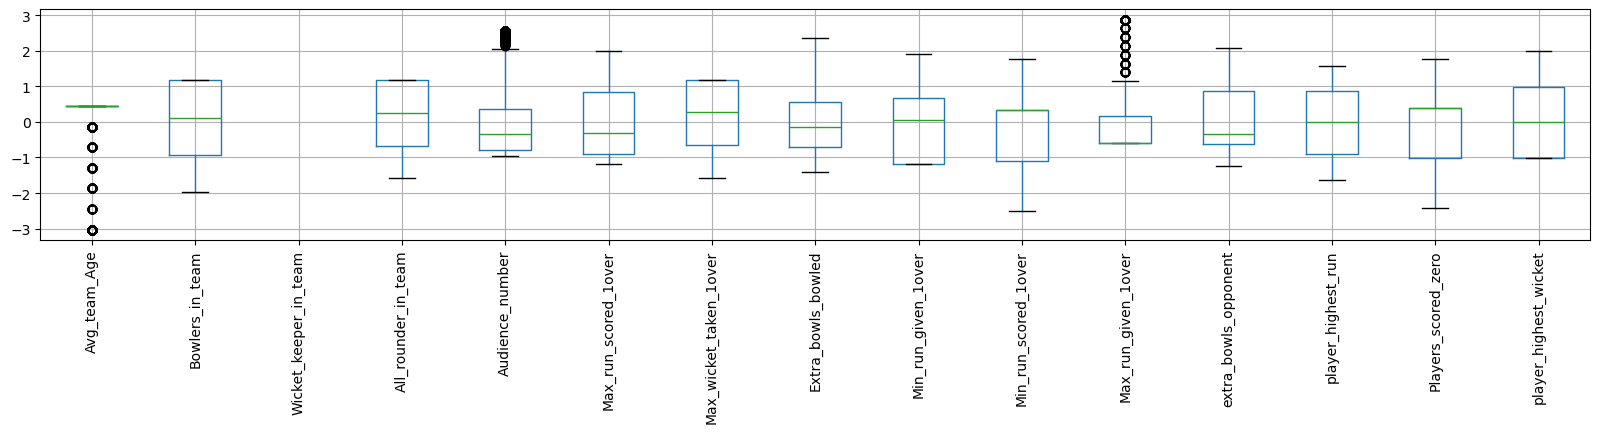

In [54]:
data_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [55]:
cric_data['Result_encoded'] = cric_data['Result'].map({'Win': 1, 'Loss': 0})


In [56]:
cric_data

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              Day          ODI   
Game_5        Loss          24.0            Night          ODI   
...            ...           ...              ...          ...   
Game_2926      Win          30.0              Day          T20   
Game_2927      Win          30.0              Day          ODI   
Game_2928      Win          30.0    Day and Night          ODI   
Game_2929      Win          30.0              Day          ODI   
Game_2930      Win          30.0              Day          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   
...                      ...                    ...                  ...   
Game_2926                3.0                      1                  4.0   
Game_2927                4.0                      1                  3.0   
Game_2928                4.0                      1                  3.0   
Game_2929                4.0                      1                  3.0   
Game_2930                4.0                      1                  3.0   

            First_selection      Opponent  Season  ...  \
Game_number                                        ...   
Game_1              Bowling      Srilanka  Summer  ...   
Game_2              Batting      Zimbabwe  Summer  ...   
Game_3              Bowling      Zimbabwe   Rainy  ...   
Game_4              Bowling         Kenya  Summer  ...   
Game_5              Bowling      Srilanka  Summer  ...   
...                     ...           ...     ...  ...   
Game_2926           Batting  South Africa  Summer  ...   
Game_2927           Bowling         Kenya  Summer  ...   
Game_2928           Bowling      Pakistan   Rainy  ...   
Game_2929           Batting         Kenya   Rainy  ...   
Game_2930           Batting         Kenya   Rainy  ...   

             Max_wicket_taken_1over Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                   
Game_1                            3                0.0                    2   
Game_2                            1                0.0                    0   
Game_3                            4                0.0                    0   
Game_4                            4                0.0                    2   
Game_5                            4                0.0                    0   
...                             ...                ...                  ...   
Game_2926                         3                8.0                    0   
Game_2927                         4                8.0                    2   
Game_2928                         4               10.0                    2   
Game_2929                         2               20.0                    2   
Game_2930                         4                4.0                    5   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                        3.0                  6.0                     0   
Game_2                        3.0                  6.0                     0   
Game_3                        3.0                  6.0       

In [57]:
#Check for Data Imbalance

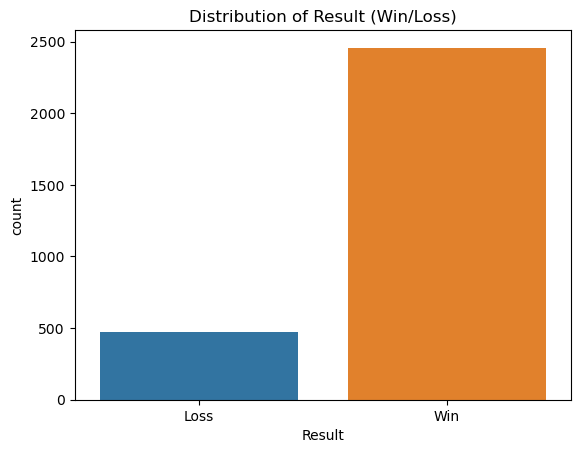

In [58]:
sns.countplot(x='Result', data=cric_data)
plt.title('Distribution of Result (Win/Loss)')
plt.show()

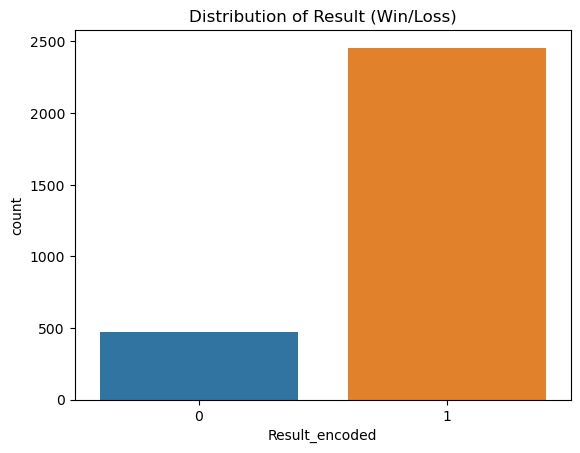

Class Distribution:
 Result_encoded
1    83.856655
0    16.143345
Name: proportion, dtype: float64


In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result_encoded', data=cric_data)
plt.title('Distribution of Result (Win/Loss)')
plt.show()

class_distribution = cric_data['Result_encoded'].value_counts(normalize=True) * 100
print("Class Distribution:\n", class_distribution)

In [60]:
cric_data.head()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              Day          ODI   
Game_5        Loss          24.0            Night          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   

            First_selection  Opponent  Season  ...  Max_wicket_taken_1over  \
Game_number                                    ...                           
Game_1              Bowling  Srilanka  Summer  ...                       3   
Game_2              Batting  Zimbabwe  Summer  ...                       1   
Game_3              Bowling  Zimbabwe   Rainy  ...                       4   
Game_4              Bowling     Kenya  Summer  ...                       4   
Game_5              Bowling  Srilanka  Summer  ...                       4   

            Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
Game_number                                                                 
Game_1                     0.0                    2                   3.0   
Game_2                     0.0                    0                   3.0   
Game_3                     0.0                    0                   3.0   
Game_4                     0.0                    2                   3.0   
Game_5                     0.0                    0                   3.0   

             Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
Game_number                                                                  
Game_1                       6.0                     0                54.0   
Game_2                       6.0                     0                69.0   
Game_3                       6.0                     0                69.0   
Game_4                       6.0                     0                73.0   
Game_5                       6.0                     0                80.0   

             Players_scored_zero  player_highest_wicket  Result_encoded  
Game_number                                                              
Game_1                       3.0                    1.0               0  
Game_2                       2.0                    1.0               1  
Game_3                       3.0                    1.0               0  
Game_4                       3.0                    1.0               1  
Game_5                       3.0                    1.0               0  

[5 rows x 23 columns]

In [61]:
cric_data.Opponent.value_counts()

Opponent
South Africa    676
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: count, dtype: int64

In [62]:
cric_data.Season.value_counts()

Season
Rainy     1371
Summer     918
Winter     641
Name: count, dtype: int64

In [63]:
cric_data.Match_light_type.value_counts()

Match_light_type
Day              2093
Day and Night     541
Night             296
Name: count, dtype: int64

In [64]:
cric_data.Match_format.value_counts()

Match_format
ODI     1935
T20      870
Test     125
Name: count, dtype: int64

In [65]:
filtered_cric_data = cric_data[(cric_data['Match_light_type'] == 'Day') & (cric_data['Match_format'] == 'Test') &(cric_data['Season'] == 'Rainy')&(cric_data['Opponent'] == 'England')][['Match_light_type','Match_format','Season','Opponent']]
print(filtered_cric_data)

Empty DataFrame
Columns: [Match_light_type, Match_format, Season, Opponent]
Index: []


In [66]:
print("Match_light_type == 'Day':", cric_data[cric_data['Match_light_type'] == 'Day'].shape[0])
print("Match_format == 'Test':", cric_data[cric_data['Match_format'] == 'Test'].shape[0])
print("Season == 'Rainy':", cric_data[cric_data['Season'] == 'Rainy'].shape[0])
print("Opponent == 'England':", cric_data[cric_data['Opponent'] == 'England'].shape[0])

Match_light_type == 'Day': 2093
Match_format == 'Test': 125
Season == 'Rainy': 1371
Opponent == 'England': 283


In [67]:
print(cric_data['Match_light_type'].unique())
print(cric_data['Match_format'].unique())
print(cric_data['Season'].unique())
print(cric_data['Opponent'].unique())

['Day' 'Day and Night' 'Night']
['ODI' 'T20' 'Test']
['Summer' 'Rainy' 'Winter']
['Srilanka' 'Zimbabwe' 'Kenya' 'Australia' 'England' 'South Africa'
 'Pakistan' 'West Indies' 'Bangladesh']


In [68]:
filtered_data = cric_data[(cric_data['Match_light_type'] == 'Day') & 
                          (cric_data['Match_format'] == 'Test') & 
                          (cric_data['Season'] == 'Rainy')]
print(filtered_data)

            Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_165      Loss          24.0              Day         Test   
Game_191      Loss          24.0              Day         Test   
Game_218       Win          30.0              Day         Test   
Game_244       Win          25.0              Day         Test   
Game_250       Win          26.0              Day         Test   
Game_280      Loss          26.0              Day         Test   
Game_289       Win          26.0              Day         Test   
Game_319      Loss          26.0              Day         Test   
Game_575       Win          29.0              Day         Test   
Game_624       Win          29.0              Day         Test   
Game_643       Win          29.0              Day         Test   
Game_762       Win          30.0              Day         Test   
Game_838       Win          30.0              Day         Test   
Game_899  

In [69]:
cric_data['Max_run_scored_1over'].max()

25.0

In [70]:
cric_data['Max_run_scored_1over'].min()

11.0

In [71]:
cric_data['Min_run_given_1over'].max()

6

In [72]:
cric_data['Min_run_given_1over'].min()

0

In [73]:
cric_data['Max_run_scored_1over'].value_counts()

Max_run_scored_1over
14.0    424
11.0    417
13.0    415
12.0    391
15.0    200
18.0    173
17.0    160
16.0    155
19.0    149
22.0    110
20.0    108
21.0     95
23.0     56
24.0     41
25.0     36
Name: count, dtype: int64

In [74]:
cric_data['player_highest_run'].max()

100.0

In [75]:
categorical_columns = ['Opponent', 'Match_light_type', 'Match_format', 'First_selection']

In [76]:
cric_data_encoded = pd.get_dummies(cric_data, columns=categorical_columns, drop_first=True)


In [77]:
print(cric_data_encoded)

            Result  Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Game_number                                                                
Game_1        Loss          18.0              3.0                      1   
Game_2         Win          24.0              3.0                      1   
Game_3        Loss          24.0              3.0                      1   
Game_4         Win          24.0              2.0                      1   
Game_5        Loss          24.0              1.0                      1   
...            ...           ...              ...                    ...   
Game_2926      Win          30.0              3.0                      1   
Game_2927      Win          30.0              4.0                      1   
Game_2928      Win          30.0              4.0                      1   
Game_2929      Win          30.0              4.0                      1   
Game_2930      Win          30.0              4.0                      1   

           

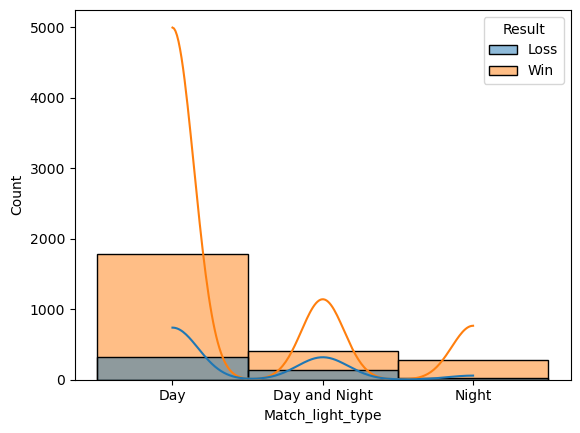

In [78]:
sns.histplot(x='Match_light_type', data=cric_data, kde=True, hue='Result')
 
plt.show()

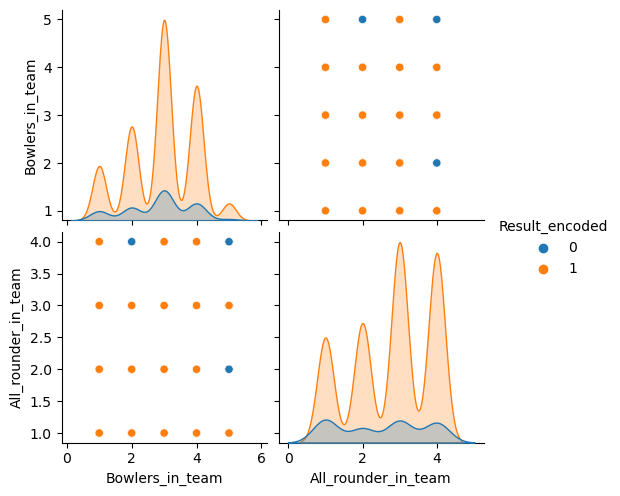

In [79]:
sns.pairplot(cric_data, vars=['Bowlers_in_team', 'All_rounder_in_team'], hue='Result_encoded')
plt.show()

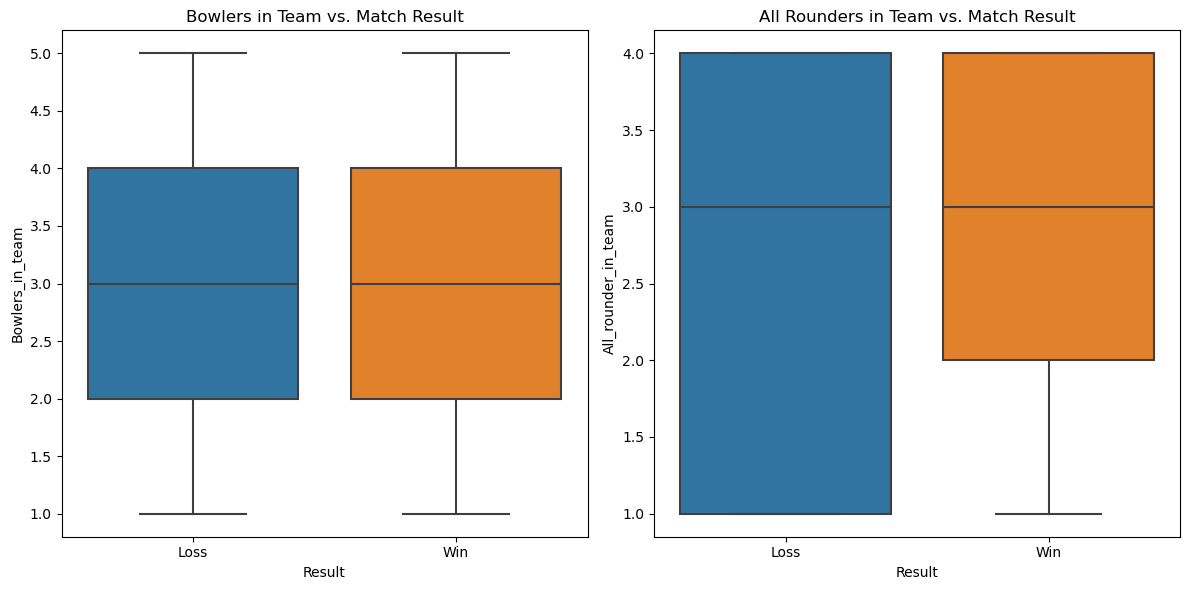

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Result', y='Bowlers_in_team', data=cric_data)
plt.title('Bowlers in Team vs. Match Result')

plt.subplot(1, 2, 2)
sns.boxplot(x='Result', y='All_rounder_in_team', data=cric_data)
plt.title('All Rounders in Team vs. Match Result')

plt.tight_layout()

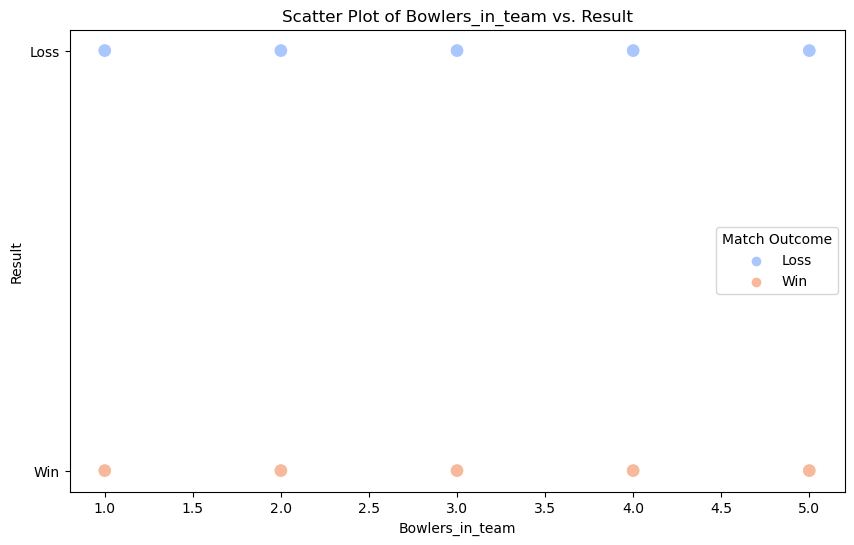

In [81]:
# Scatter plot for Bowlers_in_team vs. Result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bowlers_in_team', y='Result', data=cric_data, hue='Result', palette='coolwarm', s=100)
plt.title('Scatter Plot of Bowlers_in_team vs. Result')
plt.xlabel('Bowlers_in_team')
plt.ylabel('Result')
plt.legend(title='Match Outcome')
plt.show()

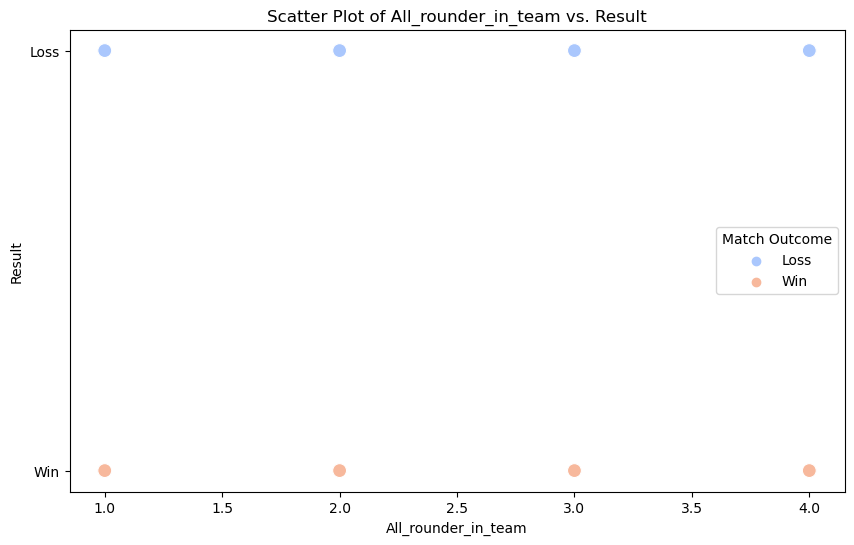

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='All_rounder_in_team', y='Result', data=cric_data, hue='Result', palette='coolwarm', s=100)
plt.title('Scatter Plot of All_rounder_in_team vs. Result')
plt.xlabel('All_rounder_in_team')
plt.ylabel('Result')
plt.legend(title='Match Outcome')
plt.show()

Class Distribution:
 Result
Win     2457
Loss     473
Name: count, dtype: int64


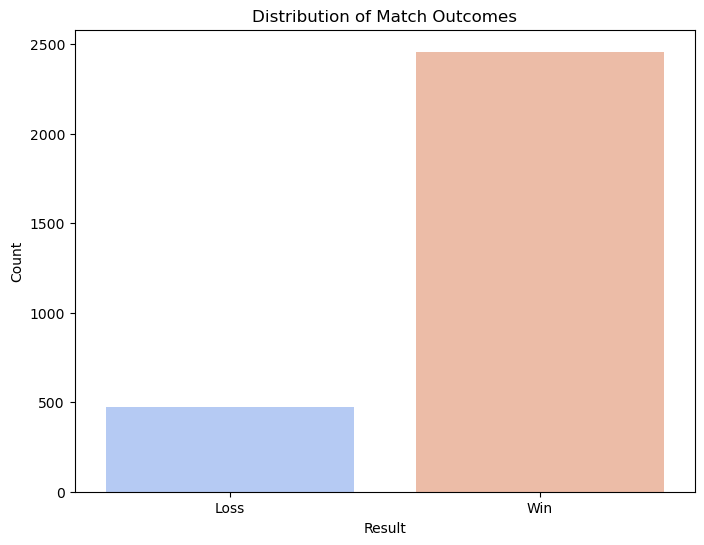

Dataset is imbalanced. Applying resampling...
Resampled dataset distribution:
 Result
Win     2457
Loss    2457
Name: count, dtype: int64


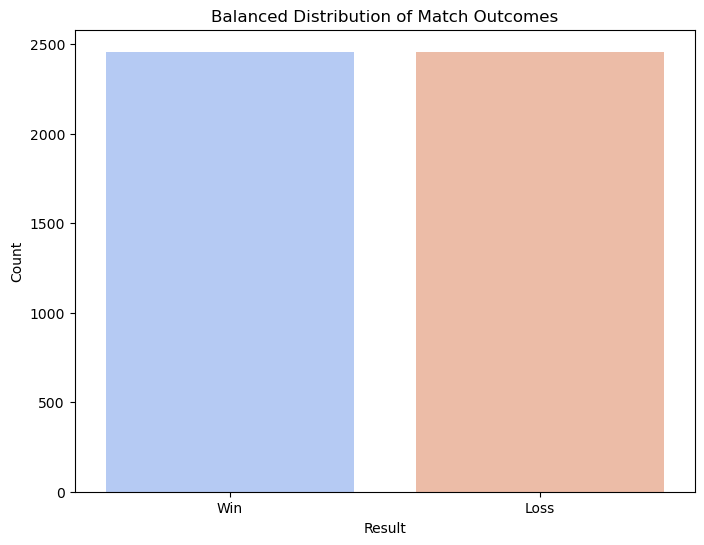

In [83]:
from sklearn.utils import resample
#class distribution
class_distribution = cric_data['Result'].value_counts()
print("Class Distribution:\n", class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Result', data=cric_data, palette='coolwarm')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

# imbalanced, apply resampling
if class_distribution.min() / class_distribution.max() < 0.5:  
    print("Dataset is imbalanced. Applying resampling...")

    # Separate majority and minority classes
    majority_class = cric_data[cric_data['Result'] == class_distribution.idxmax()]
    minority_class = cric_data[cric_data['Result'] == class_distribution.idxmin()]

    # Upsample minority class
    minority_upsampled = resample(minority_class, 
                                  replace=True, 
                                  n_samples=majority_class.shape[0], 
                                  random_state=42)

    #  majority class with upsampled minority class
    data_balanced = pd.concat([majority_class, minority_upsampled])
    
    # Shuffle dataset
    data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    
    print("Resampled dataset distribution:\n", data_balanced['Result'].value_counts())
    
    #  balanced class distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Result', data=data_balanced, palette='coolwarm')
    plt.title('Balanced Distribution of Match Outcomes')
    plt.xlabel('Result')
    plt.ylabel('Count')
    plt.show()
else:
    print("Dataset is balanced.")

In [84]:
data_num_scaled = data_num_scaled.drop('Wicket_keeper_in_team', axis=1)

In [85]:
data_num_scaled.head()


Avg_team_Age  Bowlers_in_team  All_rounder_in_team  \
Game_number                                                       
Game_1          -3.025632         0.120372             0.252159   
Game_2          -3.025632         0.120372             1.173390   
Game_3          -3.025632         0.120372            -0.669071   
Game_4          -3.025632        -0.923089            -0.669071   
Game_5          -3.025632        -1.966550             0.252159   

             Audience_number  Max_run_scored_1over  Max_wicket_taken_1over  \
Game_number                                                                  
Game_1             -0.966589             -0.608833                0.264714   
Game_2             -0.966589             -0.898142               -1.586387   
Game_3             -0.966589             -0.319524                1.190264   
Game_4             -0.966589             -0.030215                1.190264   
Game_5             -0.966589             -0.898142                1.190264   

             Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
Game_number                                                                  
Game_1                -1.395238             0.050147              0.334622   
Game_2                -1.395238            -1.195032              0.334622   
Game_3                -1.395238            -1.195032              0.334622   
Game_4                -1.395238             0.050147              0.334622   
Game_5                -1.395238            -1.195032              0.334622   

             Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
Game_number                                                                  
Game_1                 -0.589762             -1.238044           -0.594861   
Game_2                 -0.589762             -1.238044            0.156256   
Game_3                 -0.589762             -1.238044            0.156256   
Game_4                 -0.589762             -1.238044            0.356554   
Game_5                 -0.589762             -1.238044            0.707076   

             Players_scored_zero  player_highest_wicket  
Game_number                                              
Game_1                  0.376540              -1.019306  
Game_2                 -1.027103              -1.019306  
Game_3                  0.376540              -1.019306  
Game_4                  0.376540              -1.019306  
Game_5                  0.376540              -1.019306

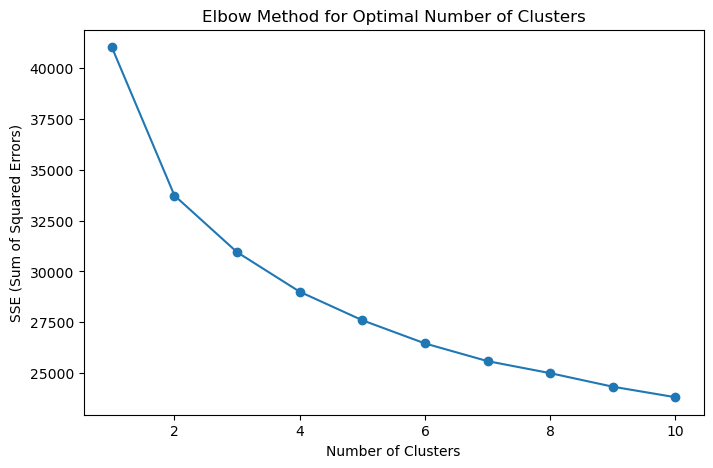

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


# Step 2: Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_num_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Step 3: Fit K-Means with the optimal number of clusters (choose k based on the elbow plot)
optimal_k = 4  # For example, if the elbow is at 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_num_scaled)


In [87]:
cric_data['Cluster'] = clusters


In [88]:
numeric_columns = cric_data.select_dtypes(include=['float64','int64'])


In [89]:
numeric_data_with_clusters = pd.concat([numeric_columns, cric_data['Cluster']], axis=1)
numeric_data_with_clusters

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Game_number                                                         
Game_1               18.0              3.0                      1   
Game_2               24.0              3.0                      1   
Game_3               24.0              3.0                      1   
Game_4               24.0              2.0                      1   
Game_5               24.0              1.0                      1   
...                   ...              ...                    ...   
Game_2926            30.0              3.0                      1   
Game_2927            30.0              4.0                      1   
Game_2928            30.0              4.0                      1   
Game_2929            30.0              4.0                      1   
Game_2930            30.0              4.0                      1   

             All_rounder_in_team  Audience_number  Max_run_scored_1over  \
Game_number                                                               
Game_1                       3.0           9940.0                  13.0   
Game_2                       4.0           8400.0                  12.0   
Game_3                       2.0          13146.0                  14.0   
Game_4                       2.0           7357.0                  15.0   
Game_5                       3.0          13328.0                  12.0   
...                          ...              ...                   ...   
Game_2926                    4.0          33950.0                  15.0   
Game_2927                    3.0          19663.0                  14.0   
Game_2928                    3.0          39823.0                  14.0   
Game_2929                    3.0          14007.0                  14.0   
Game_2930                    3.0          20839.0                  12.0   

             Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Game_number                                                                    
Game_1                            3                 0.0                    2   
Game_2                            1                 0.0                    0   
Game_3                            4                 0.0                    0   
Game_4                            4                 0.0                    2   
Game_5                            4                 0.0                    0   
...                             ...                 ...                  ...   
Game_2926                         3                 8.0                    0   
Game_2927                         4                 8.0                    2   
Game_2928                         4                10.0                    2   
Game_2929                         2                20.0                    2   
Game_2930                         4                 4.0                    5   

             Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Game_number                                                                    
Game_1                        3.0                  6.0                     0   
Game_2                        3.0                  6.0                     0   
Game_3                        3.0                  6.0                     0   
Game_4                        3.0                  6.0                     0   
Game_5                        3.0                  6.0                     0   
...                           ...                  ...                   ...   
Game_2926                     3.0                  6.0                     3   
Game_2927                     3.0                  6.0                     2   
Game_2928                     4.0                 10.0                     2   
Game_2929                     3.0                  6.0                     3   
Game_2930                     3.0                  6.0                     3   

             player_highest_run  Players_scored_zero  pla

In [90]:
cluster_summary = numeric_data_with_clusters.groupby('Cluster').mean()


In [91]:
cluster_summary

Avg_team_Age  Bowlers_in_team  Wicket_keeper_in_team  \
Cluster                                                         
0           29.821429         2.998626                    1.0   
1           30.079918         3.067623                    1.0   
2           29.869110         3.023186                    1.0   
3           25.015915         2.180371                    1.0   

         All_rounder_in_team  Audience_number  Max_run_scored_1over  \
Cluster                                                               
0                   2.796703     43562.326923             15.241758   
1                   2.688525    109556.540984             14.936475   
2                   2.718025     30775.198953             15.223635   
3                   2.668435     21953.002653             15.286472   

         Max_wicket_taken_1over  Extra_bowls_bowled  Min_run_given_1over  \
Cluster                                                                    
0                      2.587912           12.015110             1.620879   
1                      2.836066           24.536885             2.157787   
2                      2.753927            8.051608             2.026926   
3                      2.657825            3.840849             2.063660   

         Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
Cluster                                                                    
0                    2.832418            10.171703              7.752747   
1                    2.770492            14.795082              6.809426   
2                    2.725505             6.261780              1.968586   
3                    2.766578             6.135279              2.106101   

         player_highest_run  Players_scored_zero  player_highest_wicket  \
Cluster                                                                   
0                 62.798077             2.806319               2.155220   
1                 65.938525             2.709016               3.995902   
2                 67.766642             2.692595               1.549738   
3                 65.145889             2.769231               1.206897   

         Result_encoded  
Cluster                  
0              0.898352  
1              0.930328  
2              0.810022  
3              0.705570

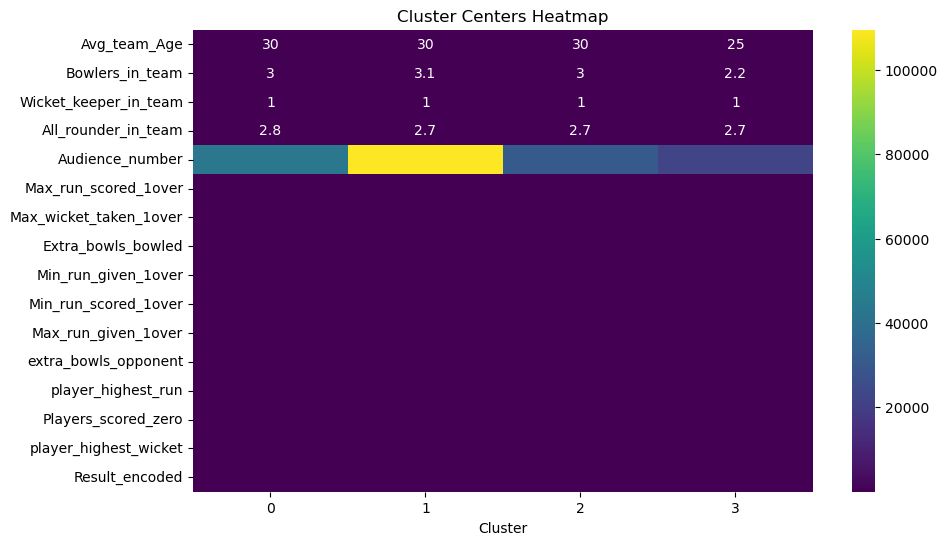

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_summary.T, cmap='viridis', annot=True)
plt.title('Cluster Centers Heatmap')
plt.show()


In [93]:
for i in range(optimal_k):
    print(f"Cluster {i}:")
    print(cluster_summary.iloc[i])
    print("\n---\n")

Cluster 0:
Avg_team_Age                 29.821429
Bowlers_in_team               2.998626
Wicket_keeper_in_team         1.000000
All_rounder_in_team           2.796703
Audience_number           43562.326923
Max_run_scored_1over         15.241758
Max_wicket_taken_1over        2.587912
Extra_bowls_bowled           12.015110
Min_run_given_1over           1.620879
Min_run_scored_1over          2.832418
Max_run_given_1over          10.171703
extra_bowls_opponent          7.752747
player_highest_run           62.798077
Players_scored_zero           2.806319
player_highest_wicket         2.155220
Result_encoded                0.898352
Name: 0, dtype: float64

---

Cluster 1:
Avg_team_Age                  30.079918
Bowlers_in_team                3.067623
Wicket_keeper_in_team          1.000000
All_rounder_in_team            2.688525
Audience_number           109556.540984
Max_run_scored_1over          14.936475
Max_wicket_taken_1over         2.836066
Extra_bowls_bowled            24.536885
Min_

In [94]:
#NOTES-2

In [95]:
cric_data.head()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              Day          ODI   
Game_5        Loss          24.0            Night          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   

            First_selection  Opponent  Season  ...  Extra_bowls_bowled  \
Game_number                                    ...                       
Game_1              Bowling  Srilanka  Summer  ...                 0.0   
Game_2              Batting  Zimbabwe  Summer  ...                 0.0   
Game_3              Bowling  Zimbabwe   Rainy  ...                 0.0   
Game_4              Bowling     Kenya  Summer  ...                 0.0   
Game_5              Bowling  Srilanka  Summer  ...                 0.0   

            Min_run_given_1over  Min_run_scored_1over  Max_run_given_1over  \
Game_number                                                                  
Game_1                        2                   3.0                  6.0   
Game_2                        0                   3.0                  6.0   
Game_3                        0                   3.0                  6.0   
Game_4                        2                   3.0                  6.0   
Game_5                        0                   3.0                  6.0   

             extra_bowls_opponent  player_highest_run  Players_scored_zero  \
Game_number                                                                  
Game_1                          0                54.0                  3.0   
Game_2                          0                69.0                  2.0   
Game_3                          0                69.0                  3.0   
Game_4                          0                73.0                  3.0   
Game_5                          0                80.0                  3.0   

             player_highest_wicket  Result_encoded  Cluster  
Game_number                                                  
Game_1                         1.0               0        3  
Game_2                         1.0               1        3  
Game_3                         1.0               0        3  
Game_4                         1.0               1        3  
Game_5                         1.0               0        3  

[5 rows x 24 columns]

In [96]:
cric_data.tail()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_2926      Win          30.0              Day          T20   
Game_2927      Win          30.0              Day          ODI   
Game_2928      Win          30.0    Day and Night          ODI   
Game_2929      Win          30.0              Day          ODI   
Game_2930      Win          30.0              Day          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_2926                3.0                      1                  4.0   
Game_2927                4.0                      1                  3.0   
Game_2928                4.0                      1                  3.0   
Game_2929                4.0                      1                  3.0   
Game_2930                4.0                      1                  3.0   

            First_selection      Opponent  Season  ...  Extra_bowls_bowled  \
Game_number                                        ...                       
Game_2926           Batting  South Africa  Summer  ...                 8.0   
Game_2927           Bowling         Kenya  Summer  ...                 8.0   
Game_2928           Bowling      Pakistan   Rainy  ...                10.0   
Game_2929           Batting         Kenya   Rainy  ...                20.0   
Game_2930           Batting         Kenya   Rainy  ...                 4.0   

            Min_run_given_1over  Min_run_scored_1over  Max_run_given_1over  \
Game_number                                                                  
Game_2926                     0                   3.0                  6.0   
Game_2927                     2                   3.0                  6.0   
Game_2928                     2                   4.0                 10.0   
Game_2929                     2                   3.0                  6.0   
Game_2930                     5                   3.0                  6.0   

             extra_bowls_opponent  player_highest_run  Players_scored_zero  \
Game_number                                                                  
Game_2926                       3                50.0                  3.0   
Game_2927                       2                52.0                  2.0   
Game_2928                       2                80.0                  3.0   
Game_2929                       3                98.0                  3.0   
Game_2930                       3                62.0                  1.0   

             player_highest_wicket  Result_encoded  Cluster  
Game_number                                                  
Game_2926                      2.0               1        2  
Game_2927                      1.0               1        2  
Game_2928                      2.0               1        2  
Game_2929                      1.0               1        2  
Game_2930                      1.0               1        2  

[5 rows x 24 columns]

In [97]:
cric_data=cric_data.drop('Result_encoded',axis=1)

In [98]:
cric_data.head()

Result  Avg_team_Age Match_light_type Match_format  \
Game_number                                                      
Game_1        Loss          18.0              Day          ODI   
Game_2         Win          24.0              Day          T20   
Game_3        Loss          24.0    Day and Night          T20   
Game_4         Win          24.0              Day          ODI   
Game_5        Loss          24.0            Night          ODI   

             Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
Game_number                                                                
Game_1                   3.0                      1                  3.0   
Game_2                   3.0                      1                  4.0   
Game_3                   3.0                      1                  2.0   
Game_4                   2.0                      1                  2.0   
Game_5                   1.0                      1                  3.0   

            First_selection  Opponent  Season  ...  Max_wicket_taken_1over  \
Game_number                                    ...                           
Game_1              Bowling  Srilanka  Summer  ...                       3   
Game_2              Batting  Zimbabwe  Summer  ...                       1   
Game_3              Bowling  Zimbabwe   Rainy  ...                       4   
Game_4              Bowling     Kenya  Summer  ...                       4   
Game_5              Bowling  Srilanka  Summer  ...                       4   

            Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
Game_number                                                                 
Game_1                     0.0                    2                   3.0   
Game_2                     0.0                    0                   3.0   
Game_3                     0.0                    0                   3.0   
Game_4                     0.0                    2                   3.0   
Game_5                     0.0                    0                   3.0   

             Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
Game_number                                                                  
Game_1                       6.0                     0                54.0   
Game_2                       6.0                     0                69.0   
Game_3                       6.0                     0                69.0   
Game_4                       6.0                     0                73.0   
Game_5                       6.0                     0                80.0   

             Players_scored_zero  player_highest_wicket  Cluster  
Game_number                                                       
Game_1                       3.0                    1.0        3  
Game_2                       2.0                    1.0        3  
Game_3                       3.0                    1.0        3  
Game_4                       3.0                    1.0        3  
Game_5                       3.0                    1.0        3  

[5 rows x 23 columns]

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [100]:
le = LabelEncoder()


In [101]:
cric_data['Result'] = le.fit_transform(cric_data['Result'])  
cric_data['Match_light_type'] = le.fit_transform(cric_data['Match_light_type'])
cric_data['Match_format'] = le.fit_transform(cric_data['Match_format'])
cric_data['First_selection'] = le.fit_transform(cric_data['First_selection'])
cric_data['Opponent'] = le.fit_transform(cric_data['Opponent'])
cric_data['Season'] = le.fit_transform(cric_data['Season'])
cric_data['Offshore'] = le.fit_transform(cric_data['Offshore'])

In [102]:
X = cric_data.drop(columns=['Result'])  
y = cric_data['Result']  

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [105]:
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

In [106]:
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [107]:
y_pred = logreg.predict(X_test)
rf_pred=rf.predict(X_test)
xgb_pred=xgb.predict(X_test)
svm_pred=svm.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy_logreg: {accuracy}")
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy_rf: {accuracy}")
accuracy = accuracy_score(y_test, xgb_pred)
print(f"Accuracy_xgb: {accuracy}")
accuracy = accuracy_score(y_test, svm_pred)
print(f"Accuracy_svm: {accuracy}")

Accuracy_logreg: 0.8327645051194539
Accuracy_rf: 0.9590443686006825
Accuracy_xgb: 0.9505119453924915
Accuracy_svm: 0.8225255972696246


In [109]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, rf_pred)
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, xgb_pred)
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, svm_pred)
print(conf_matrix)

[[  6  98]
 [  0 482]]
[[ 80  24]
 [  0 482]]
[[ 79  25]
 [  4 478]]
[[  0 104]
 [  0 482]]


In [110]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_test, rf_pred))
print(classification_report(y_test, xgb_pred))
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.11       104
           1       0.83      1.00      0.91       482

    accuracy                           0.83       586
   macro avg       0.92      0.53      0.51       586
weighted avg       0.86      0.83      0.77       586

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       104
           1       0.95      1.00      0.98       482

    accuracy                           0.96       586
   macro avg       0.98      0.88      0.92       586
weighted avg       0.96      0.96      0.96       586

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       104
           1       0.95      0.99      0.97       482

    accuracy                           0.95       586
   macro avg       0.95      0.88      0.91       586
weighted avg       0.95      0.95      0.95       586

              preci

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [112]:
y_proba = logreg.predict_proba(X_test)[:, 1]
rf_proba = rf.predict_proba(X_test)[:, 1]
xgb_proba = xgb.predict_proba(X_test)[:, 1]
svm_proba = svm.predict_proba(X_test)[:, 1]

In [113]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, rf_proba)
fpr, tpr, _ = roc_curve(y_test, xgb_proba)
fpr, tpr, _ = roc_curve(y_test, svm_proba)

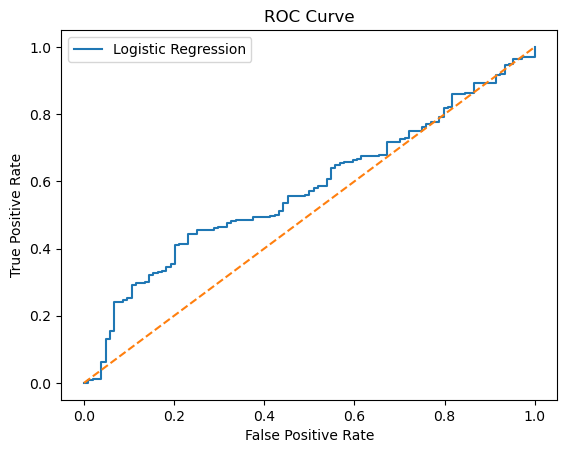

In [114]:
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


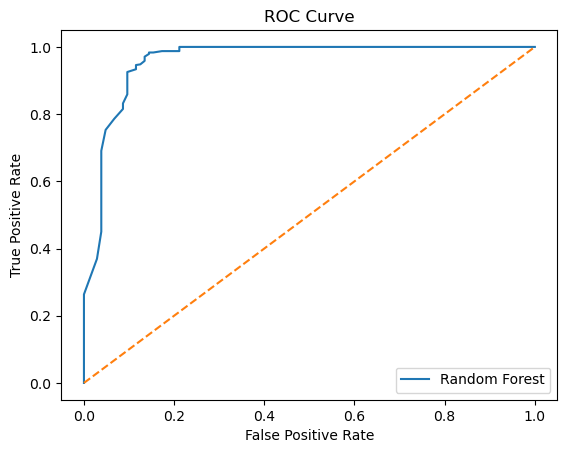

In [115]:
fpr, tpr, _ = roc_curve(y_test, rf_proba)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


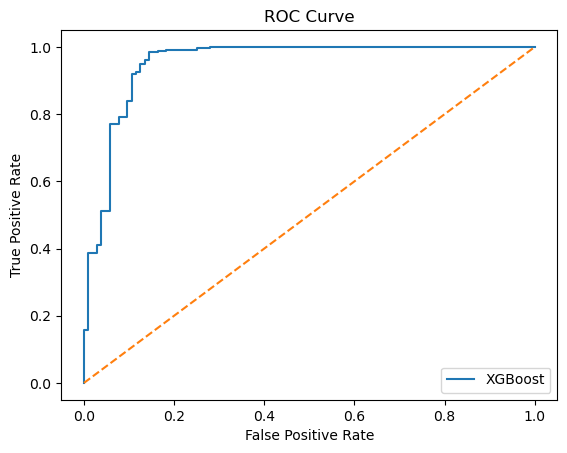

In [116]:
fpr, tpr, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr, tpr, label="XGBoost")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

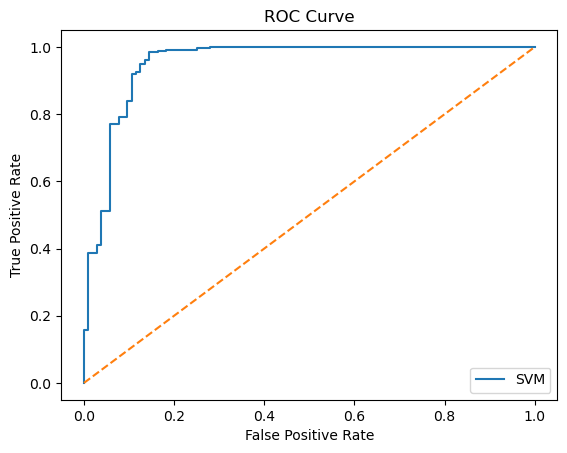

In [117]:
fpr, tpr, _ = roc_curve(y_test, svm_proba)
fpr, tpr, _ = roc_curve(y_test, xgb_proba)
plt.plot(fpr, tpr, label="SVM")
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

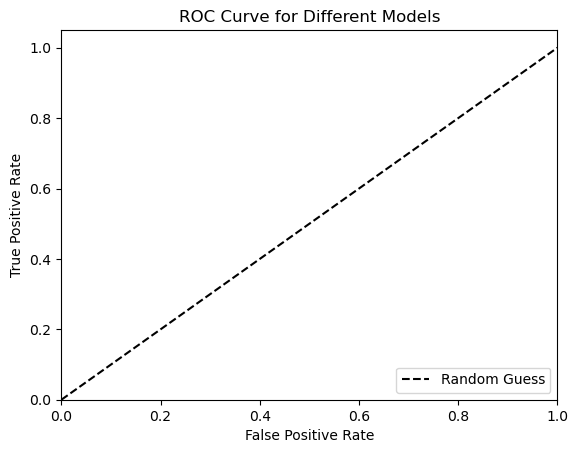

In [118]:
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

In [119]:
importances = rf.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

Avg_team_Age: 0.029444908633779396
Match_light_type: 0.02902701058134089
Match_format: 0.014463071241425434
Bowlers_in_team: 0.040670407045316444
Wicket_keeper_in_team: 0.0
All_rounder_in_team: 0.04954375376826523
First_selection: 0.01981446699925234
Opponent: 0.04460823069597391
Season: 0.0360294637040786
Audience_number: 0.1310403496351969
Offshore: 0.06668060455309124
Max_run_scored_1over: 0.06426194167492255
Max_wicket_taken_1over: 0.04262683091709752
Extra_bowls_bowled: 0.07944463032769675
Min_run_given_1over: 0.03960933132939686
Min_run_scored_1over: 0.04631247368246242
Max_run_given_1over: 0.027762567041530184
extra_bowls_opponent: 0.05027910029896965
player_highest_run: 0.09289933048432363
Players_scored_zero: 0.043460131342463564
player_highest_wicket: 0.0319150525861218
Cluster: 0.0201063434572946


In [120]:
importances = xgb.feature_importances_
for feature, importance in zip(X_train.columns, importances):
    print(f"{feature}: {importance}")

Avg_team_Age: 0.033590808510780334
Match_light_type: 0.045118942856788635
Match_format: 0.03164108842611313
Bowlers_in_team: 0.03148851916193962
Wicket_keeper_in_team: 0.0
All_rounder_in_team: 0.0427309088408947
First_selection: 0.026065556332468987
Opponent: 0.04299870878458023
Season: 0.05876992642879486
Audience_number: 0.04296988993883133
Offshore: 0.12110032886266708
Max_run_scored_1over: 0.031173991039395332
Max_wicket_taken_1over: 0.03491152822971344
Extra_bowls_bowled: 0.04213985800743103
Min_run_given_1over: 0.05560460686683655
Min_run_scored_1over: 0.041755300015211105
Max_run_given_1over: 0.03482934460043907
extra_bowls_opponent: 0.0453280545771122
player_highest_run: 0.03433502838015556
Players_scored_zero: 0.05153506249189377
player_highest_wicket: 0.10941162705421448
Cluster: 0.04250090941786766


In [121]:
importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


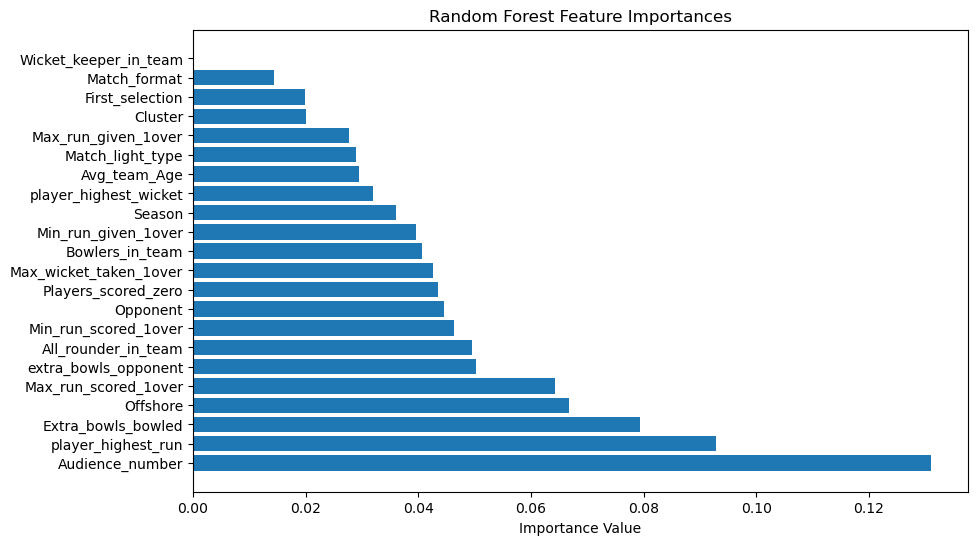

In [122]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Value')
plt.title('Random Forest Feature Importances')
plt.show()

In [123]:
coef = logreg.coef_[0]
features = X_train.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

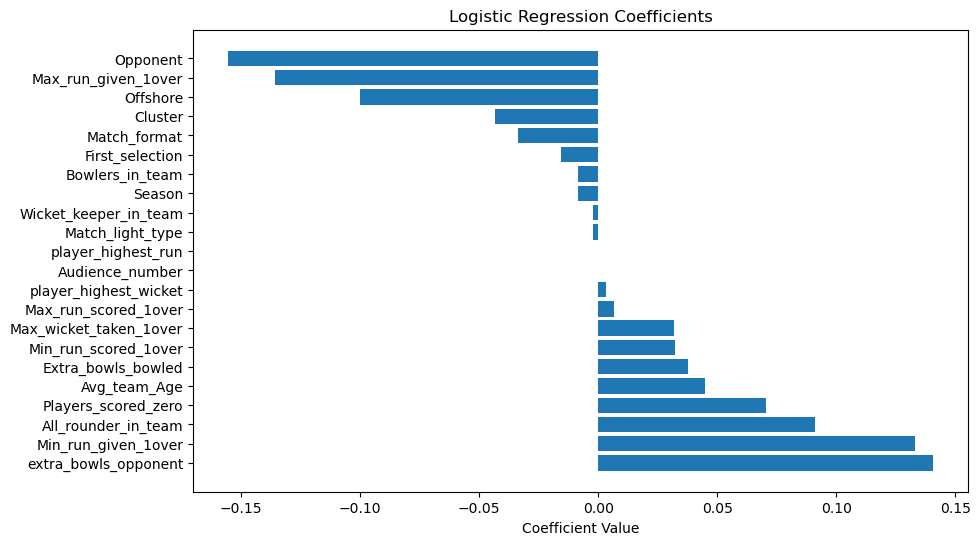

In [124]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

In [125]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [126]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [127]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)


SVC(kernel='linear')

In [128]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500))


In [129]:
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

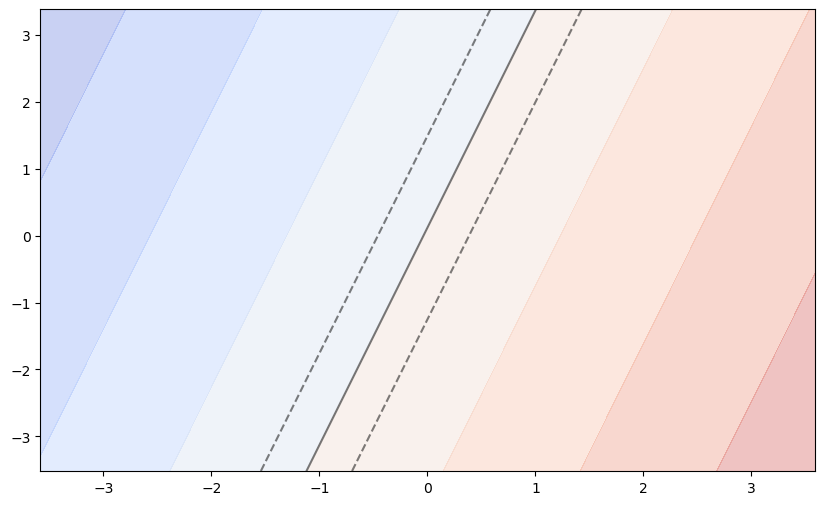

In [130]:
# Plot decision boundary and margins
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

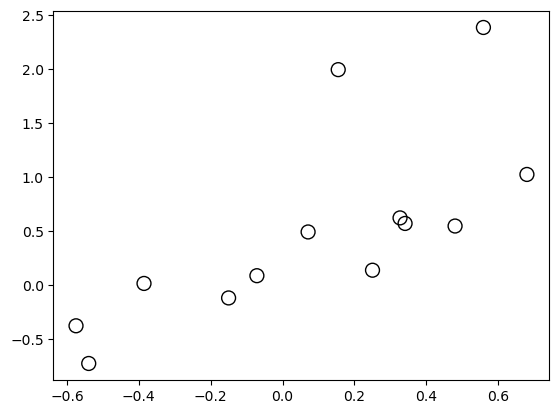

In [131]:
# Plot support vectors

plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            s=100, linewidth=1, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')


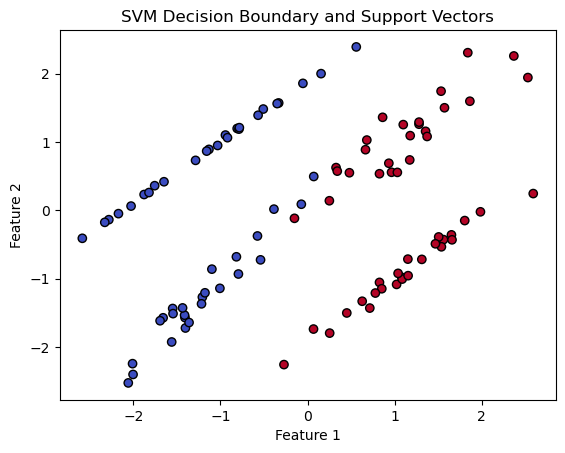

In [132]:
# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [133]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [134]:
importances = xgb_model.feature_importances_


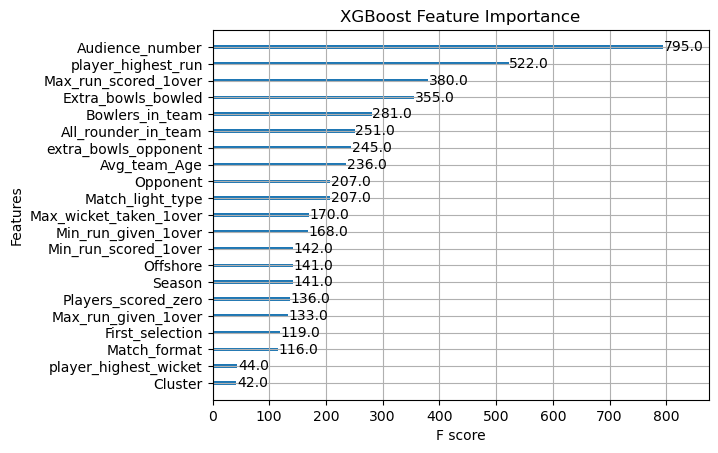

In [135]:
import xgboost as xgb

# Feature importance
xgb.plot_importance(xgb_model, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()

In [136]:
from sklearn.model_selection import GridSearchCV


In [137]:
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [138]:
grid_search_logreg = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')


In [139]:
grid_search_logreg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [140]:
print(f"Best Logistic Regression parameters: {grid_search_logreg.best_params_}")
print(f"Best Logistic Regression score: {grid_search_logreg.best_score_:.2f}")

Best Logistic Regression parameters: {'C': 10, 'penalty': 'l1'}
Best Logistic Regression score: 0.86


In [141]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [142]:
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')


In [143]:
grid_search_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [144]:
print(f"Best Random Forest parameters: {grid_search_rf.best_params_}")
print(f"Best Random Forest score: {grid_search_rf.best_score_:.2f}")

Best Random Forest parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest score: 0.95


In [145]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

In [146]:
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')


In [147]:
grid_search_xgb.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [148]:
print(f"Best XGBoost parameters: {grid_search_xgb.best_params_}")
print(f"Best XGBoost score: {grid_search_xgb.best_score_:.2f}")

Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}
Best XGBoost score: 0.95


In [149]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier


In [150]:
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
svc = SVC(probability=True)

In [151]:
voting_clf = VotingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('lr', grid_search_logreg.best_estimator_),
    ('xgb', grid_search_xgb.best_estimator_),
    ('svc', svc)
], voting='soft')


In [152]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('lr',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='liblinear')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='l...
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [153]:
stacking_clf = StackingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('lr', grid_search_logreg.best_estimator_),
    ('xgb', grid_search_xgb.best_estimator_)
], final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(C=10, penalty='l1',
                                                   solver='liblinear')),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=9,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [154]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    return accuracy, precision, recall, f1, roc_auc


In [155]:
accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting = evaluate_model(voting_clf, X_test, y_test)
accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting 

(0.9044368600682594,
 0.895910780669145,
 1.0,
 0.9450980392156862,
 0.9551947015639961)

In [156]:
accuracy_stacking, precision_stacking, recall_stacking, f1_stacking, roc_auc_stacking = evaluate_model(stacking_clf, X_test, y_test)
accuracy_stacking, precision_stacking, recall_stacking, f1_stacking, roc_auc_stacking

(0.962457337883959,
 0.96,
 0.995850622406639,
 0.9775967413441955,
 0.9592044366421959)

In [157]:
def display_metrics(name, accuracy, precision, recall, f1, roc_auc):
    print(f"\n{name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")

In [158]:
display_metrics("Voting Classifier", accuracy_voting, precision_voting, recall_voting, f1_voting, roc_auc_voting)
display_metrics("Stacking Classifier", accuracy_stacking, precision_stacking, recall_stacking, f1_stacking, roc_auc_stacking)



Voting Classifier Performance Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 1.00
F1 Score: 0.95
ROC AUC Score: 0.96

Stacking Classifier Performance Metrics:
Accuracy: 0.96
Precision: 0.96
Recall: 1.00
F1 Score: 0.98
ROC AUC Score: 0.96


In [159]:
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 6))
    plt.title(f'{model_name} Feature Importances')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.show()

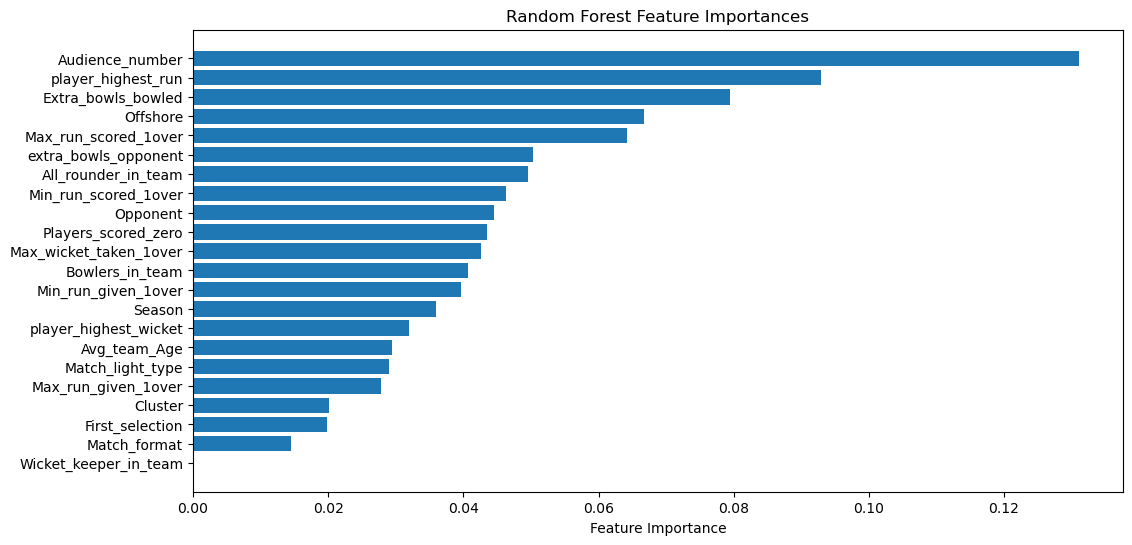

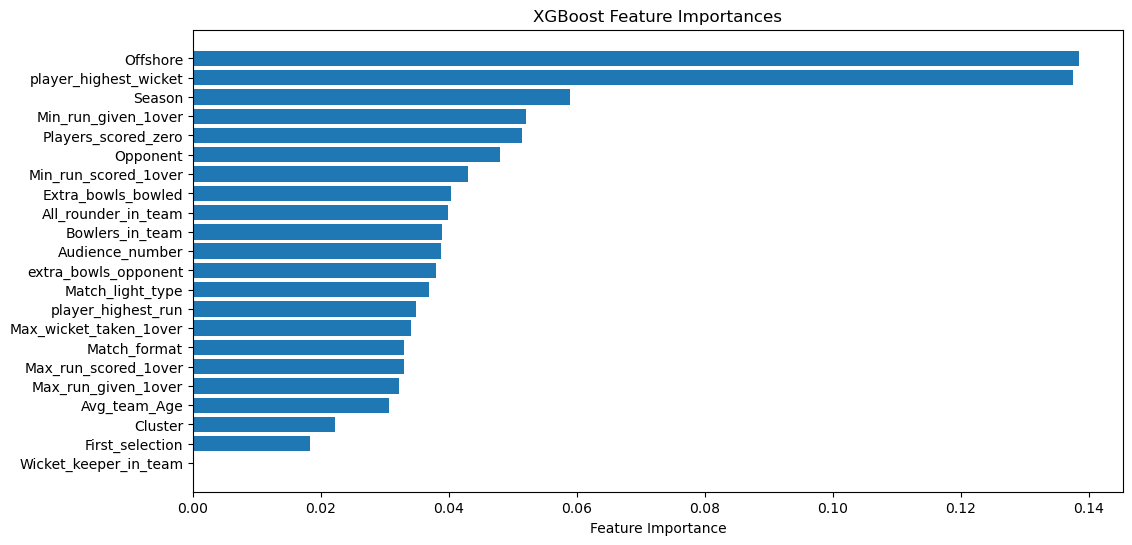

In [160]:
plot_feature_importance(grid_search_rf.best_estimator_, X_train.columns, "Random Forest")
plot_feature_importance(grid_search_xgb.best_estimator_, X_train.columns, "XGBoost")


In [161]:
def interpret_business_implications(model, model_name):
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(10)
    print(f"\n{model_name} Feature Importance Analysis:")
    print(feature_importances)



In [162]:
interpret_business_implications(grid_search_rf.best_estimator_, "Random Forest")
interpret_business_implications(grid_search_xgb.best_estimator_, "XGBoost")


Random Forest Feature Importance Analysis:
Audience_number         0.131040
player_highest_run      0.092899
Extra_bowls_bowled      0.079445
Offshore                0.066681
Max_run_scored_1over    0.064262
extra_bowls_opponent    0.050279
All_rounder_in_team     0.049544
Min_run_scored_1over    0.046312
Opponent                0.044608
Players_scored_zero     0.043460
dtype: float64

XGBoost Feature Importance Analysis:
Offshore                 0.138380
player_highest_wicket    0.137524
Season                   0.058877
Min_run_given_1over      0.051989
Players_scored_zero      0.051435
Opponent                 0.048027
Min_run_scored_1over     0.042965
Extra_bowls_bowled       0.040381
All_rounder_in_team      0.039825
Bowlers_in_team          0.038912
dtype: float32


In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print(f"Best SVM parameters: {grid_search_svm.best_params_}")
print(f"Best SVM score: {grid_search_svm.best_score_:.2f}")